In [1]:
#Import

import numpy as np
import matplotlib.pyplot as plt
from multipole_signal import Derivatives
from getdist import plots
from getdist.gaussian_mixtures import GaussianND
import fishermat as fm
import pickle as pk

#Set current directory
import os
import sys

PACKAGE_PARENT = '..'
SCRIPT_DIR = os.path.dirname(os.path.realpath(os.path.join(os.getcwd())))
sys.path.append(SCRIPT_DIR)
print(SCRIPT_DIR)

#Configuration
large = 22; med = 16; small = 12
params = {'axes.titlesize': large,
          'legend.fontsize': med,
          'axes.labelsize': med,
          'axes.titlesize': med,
          'xtick.labelsize': med,
          'ytick.labelsize': med,
          'figure.titlesize': large,
          'xtick.direction': 'out',  
          'ytick.direction': 'out',  
          'xtick.minor.visible': True,  
          'ytick.minor.visible': True,
          'xtick.major.size': 9,
          'xtick.minor.size': 4.5,
          'ytick.major.size': 9,
          'ytick.minor.size': 4.5,
          'lines.linewidth': 1.75}
plt.rcParams.update(params)

plt.rcParams['text.usetex'] = True
plt.rcParams['font.family'] = 'serif'

%matplotlib inline
%config InlineBackend.figure_format = 'retina'

C:\Users\Daniel SB\OneDrive\Documentos\GitHub


In [2]:
# Redshift bins

z_bins = np.array([ 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55, 1.65, 1.75, 1.85, 1.95 ])

#z_bins = np.array([ 0.15, 0.25, 0.35, 0.45, 0.55, 0.65, 0.75, 0.85, 0.95, 1.05, 1.15, 1.25, 1.35, 1.45, 1.55 ])


# Separations

dist = [
    np.arange(20, 164, 4),
    np.arange(32, 164, 4),
]

params_dict0 = {
    'h' : 0.677,
    'As' : 2.05e-9,
    'ns' : 0.965,
    'Ob' : 0.0490, # This is here the density parameter of Baryons
    'Om' : 0.3111, # This is here the density parameter of Cold Dark Matter
}

steps = [1e-3, 1e-1, 1e-4, 1e-2, 1e-2]

# JOINT ANALYSIS. 

### 50x50 vs 30x70 SPLITTINGS.

We run the analysis combining two different population splittings, combining the information as if they were two independent experiments. We include the cross correlations between the observables but assume the parameters of each population are independent. The signal looks like:

$$ \vec{\xi}(z,d) = (\{\xi_l^{\mathrm{LM}}(z,d)\}_{l=0,1,2,4}, \{\xi_l^{\mathrm{NP}}(z,d)\}_{l=0,1,2,4}) $$



## Derivatives (LOAD FROM FILE)

In [3]:
with open('derivatives.pkl', 'rb') as File:
    derivatives_dict = pk.load(File)
    
derivatives_50x50 = derivatives_dict['split_50x50']
derivatives_30x70 = derivatives_dict['split_30x70']

In [4]:
dsignal_dsbias50 = derivatives_50x50['dsignal_dsbias']

dsignal_dgbias50 = derivatives_50x50['dsignal_dgbias']

dsignal_dcosmic50 = derivatives_50x50['dsignal_dcosmic']

dsignal_dnum50 = derivatives_50x50['dsignal_dnumev']

np.shape(dsignal_dsbias50), np.shape(dsignal_dgbias50), np.shape(dsignal_dcosmic50), np.shape(dsignal_dnum50)

((8, 19, 324), (4, 19, 324), (5, 19, 324), (4, 19, 324))

In [5]:
dsignal_dsbias30 = derivatives_30x70['dsignal_dsbias']

dsignal_dgbias30 = derivatives_30x70['dsignal_dgbias']

dsignal_dcosmic30 = derivatives_30x70['dsignal_dcosmic']

dsignal_dnum30 = derivatives_30x70['dsignal_dnumev']

np.shape(dsignal_dsbias30), np.shape(dsignal_dgbias30), np.shape(dsignal_dcosmic30), np.shape(dsignal_dnum30)

((8, 19, 324), (4, 19, 324), (5, 19, 324), (4, 19, 324))

In [6]:
dsignal_dtheta50 = np.concatenate([dsignal_dsbias50, dsignal_dnum50, dsignal_dgbias50, dsignal_dcosmic50])

np.shape(dsignal_dtheta50)

(21, 19, 324)

In [7]:
dsignal_dtheta30 = np.concatenate([dsignal_dsbias30, dsignal_dnum30, dsignal_dgbias30, dsignal_dcosmic30])

np.shape(dsignal_dtheta30)

(21, 19, 324)

REMOVE HEXADECAPOLE FROM 50x50 split and ODD MULTIPOLES

In [11]:
n_sep = len(dist[0])
n_size = len(dsignal_dtheta50[0,0])
n_signals = int(n_size/n_sep)

ind_to_remove = list(range(n_sep,4*n_sep))+list(range(5*n_sep,8*n_sep))+list(range(8*n_sep,9*n_sep))+list(range(n_sep+n_size,4*n_sep+n_size))+list(range(5*n_sep+n_size,7*n_sep+n_size))+list(range(8*n_sep+n_size,9*n_sep+n_size))

print('Number of separations = ', n_sep)
print('Matrix/Signal size = ', n_size)
print('Number of signals = ', n_signals)
print('Indices to remove = ', ind_to_remove)

Number of separations =  36
Matrix/Signal size =  324
Number of signals =  9
Indices to remove =  [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 

In [9]:
#a = list(range(3*n_sep,4*n_sep))+list(range(7*n_sep,8*n_sep))+list(range(8*n_sep,9*n_sep))+list(range(3*n_sep+n_size,4*n_sep+n_size))+list(range(8*n_sep+n_size,9*n_sep+n_size))

In [12]:
#print(a)

In [13]:
dsignal_dsB50 = np.concatenate([dsignal_dsbias50[:4], np.zeros_like(dsignal_dsbias50[:4])], axis=2)
dsignal_dsB30 = np.concatenate([np.zeros_like(dsignal_dsbias30[:4]), dsignal_dsbias30[:4]], axis=2)

dsignal_dsM = np.concatenate([dsignal_dsbias50[4:], dsignal_dsbias30[4:]], axis=2)
dsignal_dnum = np.concatenate([dsignal_dnum50, dsignal_dnum30], axis=2)
dsignal_dgbias50 = np.concatenate([dsignal_dgbias50, np.zeros_like(dsignal_dgbias50[:4])], axis=2)
dsignal_dgbias30 = np.concatenate([np.zeros_like(dsignal_dgbias30[:4]), dsignal_dgbias30], axis=2)
dsignal_dcosmic = np.concatenate([dsignal_dcosmic50, dsignal_dcosmic30], axis=2)

In [26]:
np.shape(dsignal_dgbias50), np.shape(dsignal_dgbias50[:2])

((4, 19, 648), (2, 19, 648))

In [27]:
dsignal_dtheta_multi_ = np.concatenate([dsignal_dsB50, dsignal_dsB30, dsignal_dsM, dsignal_dnum, dsignal_dgbias50[:2], dsignal_dgbias30[:2], dsignal_dcosmic])

dsignal_dtheta_multi = np.delete(dsignal_dtheta_multi_, ind_to_remove, axis=2)


np.shape(dsignal_dtheta_multi_), np.shape(dsignal_dtheta_multi)

((25, 19, 648), (25, 19, 180))

In [28]:
36*4 + 36

180

## Covariance Matrix

In [29]:
# Create the PRIORS Cov Matrix for sB, sM, num

errB = [5e-1, 5e-1] 
errF = [5e-1, 5e-1]

num_fit = np.array([7.94599872, -12.03752386, 2.29927261, -15.83887364])

sB_4fit50 = np.array([-0.90110745,  1.82300205, -1.01878441, -0.30342325])
sB_4fit30 = np.array([0.32517601, 0.64417733, 0.16141876, 0.13330362])

sM_4fit = np.array([-0.19376092,  1.07473357, -0.07806244, -0.00558004])

dsB_50 = sB_4fit50 * errB[0] 
dsB_30 = sB_4fit30 * errB[0] 

dsM = sM_4fit * errF[0]

dnum = num_fit * errB[1]

Cov_prior_all = np.diag(np.concatenate([dsB_50**2, dsB_30**2, dsM**2, dnum**2]))

Inv_Cov_prior_all_ = np.linalg.inv(Cov_prior_all)

Inv_Cov_prior_all = np.zeros([len(dsignal_dtheta_multi), len(dsignal_dtheta_multi)])
Inv_Cov_prior_all[:len(Inv_Cov_prior_all_), :len(Inv_Cov_prior_all_)] = Inv_Cov_prior_all_

np.shape(Cov_prior_all), np.shape(Inv_Cov_prior_all)

((16, 16), (25, 25))

In [30]:
Cov_Multipoles_Joint50x30_ = fm.cov_matrix_joint(d=dist[0], z_bins=z_bins, small_off_diagonal=True, splits=[50,30], rtol=1e-4, contributions='all')

print('\n ... Remove the HEXADECAPOLE from 50x50 split ... \n')

ind_to_remove_ = list(range(n_sep,4*n_sep))+list(range(5*n_sep,8*n_sep))+list(range(8*n_sep,9*n_sep))+list(range(n_sep+n_size,4*n_sep+n_size))+list(range(5*n_sep+n_size,7*n_sep+n_size))+list(range(8*n_sep+n_size,9*n_sep+n_size))

Cov_Multipoles_Joint50x30 = np.delete(Cov_Multipoles_Joint50x30_, ind_to_remove_, axis=1)
Cov_Multipoles_Joint50x30 = np.delete(Cov_Multipoles_Joint50x30, ind_to_remove_, axis=2)

np.shape(Cov_Multipoles_Joint50x30_), np.shape(Cov_Multipoles_Joint50x30)


 ... Loading Covariance Matrices (Joint-splittings Analysis) [all] [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 


 ... Remove the HEXADECAPOLE from 50x50 split ... 



((19, 648, 648), (19, 180, 180))

In [31]:
# Load the Covariance Matrix of the multipoles

Inv_Cov_Multipoles_Joint50x30_ = np.linalg.pinv(Cov_Multipoles_Joint50x30)

# Symmetrize the matrix

Inv_Cov_Multipoles_Joint50x30 = [0.5 * (Inv_Cov_Multipoles_Joint50x30_[i] + Inv_Cov_Multipoles_Joint50x30_[i].T) for i in range(len(z_bins))]

In [32]:
# Build the Fisher Matrix

Fisher_Matrix_Joint50x30_ = fm.fisher_matrix(d_signal = dsignal_dtheta_multi, inv_cov = Inv_Cov_Multipoles_Joint50x30, z_bins = z_bins)
Fisher_Matrix_Joint50x30 = Fisher_Matrix_Joint50x30_ + Inv_Cov_prior_all

np.shape(Fisher_Matrix_Joint50x30)


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 



(25, 25)

## Constraints

In [34]:
#Absolute Errors

Sigma_Matrix_Joint50x30 = np.linalg.inv(Fisher_Matrix_Joint50x30)

Abs_Errors_all_Joint = np.sqrt(np.diag(Sigma_Matrix_Joint50x30))

# Fiducial values

sB_fit = np.concatenate([sB_4fit50, sB_4fit30]) 
gbias_fit = np.concatenate([np.array([0.554, 0.783]), np.array([0.554, 0.783])])
cosmic_fid = np.fromiter(params_dict0.values(), dtype=float)
cosmic_fid[1] = np.log(10**10 * cosmic_fid[1])

params_fid = np.concatenate([sB_fit, sM_4fit, num_fit, gbias_fit, cosmic_fid])

# Relative errors

Rel_Errors_all_Joint = np.abs(Abs_Errors_all_Joint/params_fid)

par_errors_all_Joint = Rel_Errors_all_Joint * 100

print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB_50 = ', par_errors_all_Joint[0:int(len(sB_fit)/2)])
print()
print('sB_30 = ', par_errors_all_Joint[int(len(sB_fit)/2):len(sB_fit)])
print()
print('s_model = ', par_errors_all_Joint[len(sB_fit):len(sB_fit)+len(sM_4fit)])
print()
print('number = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)):(len(sB_fit)+len(sM_4fit)+len(num_fit))])
print()
print('gbias_50 = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)/2))])
print()
print('gbias_30 = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)+len(num_fit)+int(len(gbias_fit)/2)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)))])
print()
print('cosmic = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit) + len(cosmic_fid))])
print()


------------ Relative errors * 100 ------------

sB_50 =  [50. 50. 50. 50.]

sB_30 =  [50. 50. 50. 50.]

s_model =  [50. 50. 50. 50.]

number =  [50. 50. 50. 50.]

gbias_50 =  [0.56876521 0.40955622]

gbias_30 =  [0.72101264 0.50568757]

cosmic =  [1.2851848  0.81908768 1.11276109 1.26655085 0.5951459 ]



# SINGLE SPLIT 

### $m = 2 \,\rightarrow\,$ $50\%$ Brigth - $50\%$ Faint

In [35]:
len(dsignal_dgbias50[1,1])/2

324.0

In [43]:
dsignal_dtheta_fit_all50 = np.concatenate([dsignal_dsbias50, dsignal_dnum50, dsignal_dgbias50[:2,:,:324], dsignal_dcosmic50])

np.shape(dsignal_dtheta_fit_all50)

(19, 19, 324)

In [44]:
# Remove ODD MULTIPOLES

n_sep = len(dist[0])
n_size = len(dsignal_dtheta50[0,0])
n_signals = int(n_size/n_sep)

ind_to_remove__ = list(range(n_sep,4*n_sep))+list(range(5*n_sep,7*n_sep))+list(range(8*n_sep,9*n_sep))

print('Number of separations = ', n_sep)
print('Matrix/Signal size = ', n_size)
print('Number of signals = ', n_signals)
print('Indices to remove = ', ind_to_remove)

Number of separations =  36
Matrix/Signal size =  324
Number of signals =  9
Indices to remove =  [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 

In [45]:
dsignal_dtheta_fit_all50 = np.delete(dsignal_dtheta_fit_all50, ind_to_remove__, axis=2)

np.shape(dsignal_dtheta_fit_all50)

(19, 19, 108)

In [46]:
36 * 3

108

In [47]:
# Create the Cov Matrix for sB, sF, num

Cov_priors_50 = np.diag(np.concatenate([dsB_50**2, dsM**2, dnum**2]))

Inv_Cov_prior_50_ = np.linalg.inv(Cov_priors_50)

Inv_Cov_prior_50 = np.zeros([len(dsignal_dtheta_fit_all50), len(dsignal_dtheta_fit_all50)])
Inv_Cov_prior_50[:len(Inv_Cov_prior_50_), :len(Inv_Cov_prior_50_)] = Inv_Cov_prior_50_

np.shape(Cov_priors_50)

(12, 12)

In [48]:
# Fisher Matrix + prior

Cov_Multipoles_50x50_ = fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, split=[50, 50], small_off_diagonal = True, rtol=1e-10)

Cov_Multipoles_50x50 = np.delete(Cov_Multipoles_50x50_, ind_to_remove__, axis=1)
Cov_Multipoles_50x50 = np.delete(Cov_Multipoles_50x50, ind_to_remove__, axis=2)

Inv_Cov_Multipoles_50 = np.linalg.inv(Cov_Multipoles_50x50)

Fisher_Matrix_50_ = fm.fisher_matrix(d_signal = dsignal_dtheta_fit_all50, inv_cov = Inv_Cov_Multipoles_50, z_bins = z_bins)

Fisher_Matrix_50 = Fisher_Matrix_50_ + Inv_Cov_prior_50

np.shape(Fisher_Matrix_50)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 50% BRIGHT - 50% FAINT 


 ... Success! ... 


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 



(19, 19)

In [50]:
Sigma_Matrix_50 = np.linalg.inv(Fisher_Matrix_50)

#Absolute Errors

Abs_Errors_all_50 = np.sqrt(np.diag(Sigma_Matrix_50))

# Fiducial values

sbias_fit_50 = np.concatenate([sB_4fit50, sM_4fit])
gbias_fit_50 = np.concatenate([np.array([0.554, 0.783])])
cosmic_fid = np.fromiter(params_dict0.values(), dtype=float)
cosmic_fid[1] = np.log(10**10 * cosmic_fid[1])

params_fid_50 = np.concatenate([sbias_fit_50, num_fit, gbias_fit_50, cosmic_fid])

# Relative errors

Rel_Errors_all_50 = np.abs(Abs_Errors_all_50/params_fid_50)

par_errors_all_50 = Rel_Errors_all_50 * 100

print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB = ', par_errors_all_50[0:int(len(sbias_fit_50)/2)])
print()
print('smodel = ', par_errors_all_50[int(len(sbias_fit_50)/2):len(sbias_fit_50)])
print()
print('number = ', par_errors_all_50[len(sbias_fit_50):(len(sbias_fit_50) + len(num_fit))])
print()
print('gbias = ', par_errors_all_50[(len(sbias_fit_50) + len(num_fit)):(len(sbias_fit_50) + len(num_fit) + len(gbias_fit_50))])
print()
print('cosmic = ', par_errors_all_50[(len(sbias_fit_50) + len(num_fit)+len(gbias_fit_50)):])


------------ Relative errors * 100 ------------

sB =  [50. 50. 50. 50.]

smodel =  [50. 50. 50. 50.]

number =  [50. 50. 50. 50.]

gbias =  [0.75457866 0.46990883]

cosmic =  [1.53213415 0.92640894 1.40165885 1.44857348 0.72905115]


# SINGLE SPLIT 

### $m = 10/3 \,\rightarrow\,$ $30\%$ Brigth - $70\%$ Faint

In [51]:
len(dsignal_dgbias30[1,1])/2

324.0

In [52]:
dsignal_dtheta_fit_all30 = np.concatenate([dsignal_dsbias30, dsignal_dnum30, dsignal_dgbias30[:2,:,324:], dsignal_dcosmic30])

np.shape(dsignal_dtheta_fit_all30)

(19, 19, 324)

In [53]:
# Remove ODD MULTIPOLES

n_sep = len(dist[0])
n_size = len(dsignal_dtheta50[0,0])
n_signals = int(n_size/n_sep)

ind_to_remove__ = list(range(n_sep,4*n_sep))+list(range(5*n_sep,7*n_sep))+list(range(8*n_sep,9*n_sep))

print('Number of separations = ', n_sep)
print('Matrix/Signal size = ', n_size)
print('Number of signals = ', n_signals)
print('Indices to remove = ', ind_to_remove)

Number of separations =  36
Matrix/Signal size =  324
Number of signals =  9
Indices to remove =  [36, 37, 38, 39, 40, 41, 42, 43, 44, 45, 46, 47, 48, 49, 50, 51, 52, 53, 54, 55, 56, 57, 58, 59, 60, 61, 62, 63, 64, 65, 66, 67, 68, 69, 70, 71, 72, 73, 74, 75, 76, 77, 78, 79, 80, 81, 82, 83, 84, 85, 86, 87, 88, 89, 90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100, 101, 102, 103, 104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116, 117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129, 130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142, 143, 180, 181, 182, 183, 184, 185, 186, 187, 188, 189, 190, 191, 192, 193, 194, 195, 196, 197, 198, 199, 200, 201, 202, 203, 204, 205, 206, 207, 208, 209, 210, 211, 212, 213, 214, 215, 216, 217, 218, 219, 220, 221, 222, 223, 224, 225, 226, 227, 228, 229, 230, 231, 232, 233, 234, 235, 236, 237, 238, 239, 240, 241, 242, 243, 244, 245, 246, 247, 248, 249, 250, 251, 252, 253, 254, 255, 256, 257, 258, 259, 260, 261, 262, 263, 264, 

In [54]:
dsignal_dtheta_fit_all30 = np.delete(dsignal_dtheta_fit_all30, ind_to_remove__, axis=2)

np.shape(dsignal_dtheta_fit_all30)

(19, 19, 108)

In [55]:
# Create the Cov Matrix for sB, sF, num

Cov_priors_30 = np.diag(np.concatenate([dsB_30**2, dsM**2, dnum**2]))

Inv_Cov_prior_30_ = np.linalg.inv(Cov_priors_30)

Inv_Cov_prior_30 = np.zeros([len(dsignal_dtheta_fit_all30), len(dsignal_dtheta_fit_all30)])
Inv_Cov_prior_30[:len(Inv_Cov_prior_30_), :len(Inv_Cov_prior_30_)] = Inv_Cov_prior_30_

np.shape(Cov_priors_30)

(12, 12)

In [56]:
# Fisher Matrix + prior

Cov_Multipoles_30x70_ = fm.cov_matrix_survey(d = dist[0], z_bins = z_bins, split=[30, 70], small_off_diagonal = True, rtol=1e-10)

Cov_Multipoles_30x70 = np.delete(Cov_Multipoles_30x70_, ind_to_remove__, axis=1)
Cov_Multipoles_30x70 = np.delete(Cov_Multipoles_30x70, ind_to_remove__, axis=2)

Inv_Cov_Multipoles_30 = np.linalg.inv(Cov_Multipoles_30x70)

Fisher_Matrix_30_ = fm.fisher_matrix(d_signal = dsignal_dtheta_fit_all30, inv_cov = Inv_Cov_Multipoles_30, z_bins = z_bins)

Fisher_Matrix_30 = Fisher_Matrix_30_ + Inv_Cov_prior_30

np.shape(Fisher_Matrix_30)


 ... Loading Covariance Matrices [MONOBB, MONOBF, MONOFF, DIPBF, QUADBB, QUADBF, QUADFF, HEXAT, OCTBF] ... 

Population splitted in 30% BRIGHT - 70% FAINT 


 ... Success! ... 


 ... Computing the Fisher Matrix ... 

Signal & Cov must be given as functions (z,d) and (z,d,d') respectively. 


 ... Success! ... 



(19, 19)

In [57]:
Sigma_Matrix_30 = np.linalg.inv(Fisher_Matrix_30)

#Absolute Errors

Abs_Errors_all_30 = np.sqrt(np.diag(Sigma_Matrix_30))

# Fiducial values

sbias_fit_30 = np.concatenate([sB_4fit30, sM_4fit])
gbias_fit_30 = np.concatenate([np.array([0.554, 0.783])])
cosmic_fid = np.fromiter(params_dict0.values(), dtype=float)
cosmic_fid[1] = np.log(10**10 * cosmic_fid[1])

params_fid_30 = np.concatenate([sbias_fit_30, num_fit, gbias_fit_30, cosmic_fid])

# Relative errors

Rel_Errors_all_30 = np.abs(Abs_Errors_all_30/params_fid_30)

par_errors_all_30 = Rel_Errors_all_30 * 100

print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB = ', par_errors_all_30[0:int(len(sbias_fit_30)/2)])
print()
print('smodel = ', par_errors_all_30[int(len(sbias_fit_30)/2):len(sbias_fit_30)])
print()
print('number = ', par_errors_all_30[len(sbias_fit_30):(len(sbias_fit_30) + len(num_fit))])
print()
print('gbias = ', par_errors_all_30[(len(sbias_fit_30) + len(num_fit)):(len(sbias_fit_30) + len(num_fit) + len(gbias_fit_30))])
print()
print('cosmic = ', par_errors_all_30[(len(sbias_fit_30) + len(num_fit)+len(gbias_fit_30)):])


------------ Relative errors * 100 ------------

sB =  [50. 50. 50. 50.]

smodel =  [50. 50. 50. 50.]

number =  [50. 50. 50. 50.]

gbias =  [1.03347942 0.61371407]

cosmic =  [1.64043436 0.9930627  1.51026813 1.54459823 0.78133793]


Comparison with result of combined analysis

In [58]:
print()
print('------------ Relative errors * 100 ------------' )
print()
print('sB_50 = ', par_errors_all_Joint[0:int(len(sB_fit)/2)])
print()
print('sB_30 = ', par_errors_all_Joint[int(len(sB_fit)/2):len(sB_fit)])
print()
print('s_model = ', par_errors_all_Joint[len(sB_fit):len(sB_fit)+len(sM_4fit)])
print()
print('number = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)):(len(sB_fit)+len(sM_4fit)+len(num_fit))])
print()
print('gbias_50 = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)/2))])
print()
print('gbias_30 = ', par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)+len(num_fit)+int(len(gbias_fit)/2)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)))])
print()
print('cosmic = ', par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit) + len(cosmic_fid))])
print()


------------ Relative errors * 100 ------------

sB_50 =  [50. 50. 50. 50.]

sB_30 =  [50. 50. 50. 50.]

s_model =  [50. 50. 50. 50.]

number =  [50. 50. 50. 50.]

gbias_50 =  [0.56876521 0.40955622]

gbias_30 =  [0.72101264 0.50568757]

cosmic =  [1.2851848  0.81908768 1.11276109 1.26655085 0.5951459 ]



# Numerical comparison

In [59]:
cosmic50x50 = par_errors_all_50[(len(sbias_fit_50) + len(num_fit)+len(gbias_fit_50)):]
cosmic30x70 = par_errors_all_30[(len(sbias_fit_30) + len(num_fit) + len(gbias_fit_30)):]

cosmicjoint = par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+len(gbias_fit) + len(cosmic_fid))]

In [60]:
sm50x50 = par_errors_all_50[int(len(sbias_fit_50)/2):len(sbias_fit_50)]
sm30x70 = par_errors_all_30[int(len(sbias_fit_30)/2):len(sbias_fit_30)]

sB50x50 = par_errors_all_50[0:int(len(sbias_fit_50)/2)]
sB30x70 = par_errors_all_30[0:int(len(sbias_fit_30)/2)]

sB50joint = par_errors_all_Joint[0:int(len(sB_fit)/2)]
sB30joint = par_errors_all_Joint[int(len(sB_fit)/2):len(sB_fit)]

smjoint = par_errors_all_Joint[len(sB_fit):len(sB_fit)+len(sM_4fit)]

In [61]:
np.shape(par_errors_all_Joint)

(25,)

In [62]:
gbias50x50 = par_errors_all_50[(len(sbias_fit_50) + len(num_fit)):(len(sbias_fit_50) + len(num_fit) + len(gbias_fit_50))]
gbias30x70 = par_errors_all_30[(len(sbias_fit_30) + len(num_fit)):(len(sbias_fit_30) + len(num_fit) + len(gbias_fit_30))]

gbias50joint = par_errors_all_Joint[((len(sB_fit)+len(sM_4fit)+len(num_fit))):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)/2))]
gbias30joint = par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)+len(num_fit)+int(len(gbias_fit)/2)):((len(sB_fit)+len(sM_4fit)+len(num_fit))+int(len(gbias_fit)))]

In [63]:
num50x50 = par_errors_all_50[len(sbias_fit_50):(len(sbias_fit_50) + len(num_fit))]
num30x70 = par_errors_all_30[len(sbias_fit_30):(len(sbias_fit_30) + len(num_fit))]

numjoint = par_errors_all_Joint[(len(sB_fit)+len(sM_4fit)):(len(sB_fit)+len(sM_4fit)+len(num_fit))]

In [64]:
print('\n Difference Joint vs 50x50 \n')
print(' DsB = ', (1-sB50joint/sB50x50) * 100, '\n')
print(' Dgbias = ',  (1-gbias50joint/gbias50x50) * 100, '\n')
print(' Dsmodel = ', (1-smjoint/sm50x50) * 100, '\n')
print(' Dnum = ', (1-numjoint/num50x50) * 100, '\n')
print(' Dcosmic = ', (1-cosmicjoint/cosmic50x50) * 100, '\n')

print('\n Difference Joint vs 30x70 \n')
print(' DsB = ', (1-sB30joint/sB30x70) * 100, '\n')
print(' Dgbias = ',  (1-gbias30joint/gbias30x70) * 100, '\n')
print(' Dsmodel = ', (1-smjoint/sm30x70) * 100, '\n')
print(' Dnum = ', (1-numjoint/num30x70) * 100, '\n')
print(' Dcosmic = ', (1-cosmicjoint/cosmic30x70) * 100, '\n')


 Difference Joint vs 50x50 

 DsB =  [0. 0. 0. 0.] 

 Dgbias =  [24.6247947  12.84347066] 

 Dsmodel =  [0. 0. 0. 0.] 

 Dnum =  [0. 0. 0. 0.] 

 Dcosmic =  [16.11799822 11.5846533  20.61113202 12.56564647 18.36705818] 


 Difference Joint vs 30x70 

 DsB =  [0. 0. 0. 0.] 

 Dgbias =  [30.23444627 17.60208999] 

 Dsmodel =  [0. 0. 0. 0.] 

 Dnum =  [0. 0. 0. 0.] 

 Dcosmic =  [21.65582326 17.51903683 26.32029583 18.00127495 23.82989813] 



In [65]:
print('\n Difference 50x50 vs 30x70 \n')
print(' DsB = ', (1-sB50x50/sB30x70) * 100, '\n')
print(' Dgbias = ',  (1-gbias50x50/gbias30x70) * 100, '\n')
print(' Dsmodel = ', (1-sm50x50/sm30x70) * 100, '\n')
print(' Dnum = ', (1-num50x50/num30x70) * 100, '\n')
print(' Dcosmic = ', (1-cosmic50x50/cosmic30x70) * 100, '\n')


 Difference 50x50 vs 30x70 

 DsB =  [0. 0. 0. 0.] 

 Dgbias =  [26.98658119 23.43196153] 

 Dsmodel =  [0. 0. 0. 0.] 

 Dnum =  [0. 0. 0. 0.] 

 Dcosmic =  [6.60192285 6.71193831 7.19139088 6.21681097 6.69195527] 



In [66]:
pars50x50 = np.concatenate([sB50x50,sm50x50,num50x50])
parsJoint50 = np.concatenate([sB50joint,smjoint,numjoint])
delta50 = np.concatenate([(1-sB50joint/sB50x50) * 100, (1-smjoint/sm50x50) * 100, (1-numjoint/num50x50) * 100])

pars30x70 = np.concatenate([sB30x70,sm30x70,num30x70])
parsJoint30 = np.concatenate([sB30joint,smjoint,numjoint])
delta30 = np.concatenate([(1-sB30joint/sB30x70) * 100, (1-smjoint/sm30x70) * 100, (1-numjoint/num30x70) * 100])

In [67]:
import pandas as pd

row_names = {
    0: "sB_0",
    1: "sB_1",
    2: "sB_2",
    3: "sB_3",
    4: "sM_0",
    5: "sM_2",
    6: "sM_3",
    7: "sM_4",
    8: "n_0",
    9: "n_1",
    10: "n_2",
    11: "n_3",
}

constraints_joint_vs_one= {
    "50x50" : pars50x50,
    "Joint_50" : parsJoint50,
    "Delta vs 50" : delta50,
    "30x70" : pars30x70,
    "Joint_30" : parsJoint30,
    "Delta vs 30" : delta30
}

df_constraints_joint_vs_one= pd.DataFrame(constraints_joint_vs_one, index=row_names.values())
df_constraints_joint_vs_one = df_constraints_joint_vs_one.apply(pd.Series.round, args=[2])

In [68]:
df_constraints_joint_vs_one

50x50  Joint_50  Delta vs 50  30x70  Joint_30  Delta vs 30
sB_0   50.0      50.0          0.0   50.0      50.0          0.0
sB_1   50.0      50.0          0.0   50.0      50.0          0.0
sB_2   50.0      50.0          0.0   50.0      50.0          0.0
sB_3   50.0      50.0          0.0   50.0      50.0          0.0
sM_0   50.0      50.0          0.0   50.0      50.0          0.0
sM_2   50.0      50.0          0.0   50.0      50.0          0.0
sM_3   50.0      50.0          0.0   50.0      50.0          0.0
sM_4   50.0      50.0          0.0   50.0      50.0          0.0
n_0    50.0      50.0          0.0   50.0      50.0          0.0
n_1    50.0      50.0          0.0   50.0      50.0          0.0
n_2    50.0      50.0          0.0   50.0      50.0          0.0
n_3    50.0      50.0          0.0   50.0      50.0          0.0

In [69]:
latex_string = df_constraints_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
{} &  50x50 &  Joint\_50 &  Delta vs 50 &  30x70 &  Joint\_30 &  Delta vs 30 \\
\midrule
sB\_0 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sB\_1 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sB\_2 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sB\_3 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sM\_0 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sM\_2 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sM\_3 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sM\_4 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
n\_0  &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
n\_1  &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
n\_2  &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &   

C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_6968\2221980234.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_constraints_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired


In [70]:
row_names = {
    0: "sB_0",
    1: "sB_1",
    2: "sB_2",
    3: "sB_3",
}

constraints_s_joint_vs_one= {
    "50x50" : pars50x50[:4],
    "Joint_50" : parsJoint50[:4],
    "Delta vs 50" : delta50[:4],
    "30x70" : pars30x70[:4],
    "Joint_30" : parsJoint30[:4],
    "Delta vs 30" : delta30[:4]
}

df_constraints_s_joint_vs_one= pd.DataFrame(constraints_s_joint_vs_one, index=row_names.values())
df_constraints_s_joint_vs_one = df_constraints_s_joint_vs_one.apply(pd.Series.round, args=[2])

In [71]:
df_constraints_s_joint_vs_one

50x50  Joint_50  Delta vs 50  30x70  Joint_30  Delta vs 30
sB_0   50.0      50.0          0.0   50.0      50.0          0.0
sB_1   50.0      50.0          0.0   50.0      50.0          0.0
sB_2   50.0      50.0          0.0   50.0      50.0          0.0
sB_3   50.0      50.0          0.0   50.0      50.0          0.0

In [72]:
latex_string = df_constraints_s_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
{} &  50x50 &  Joint\_50 &  Delta vs 50 &  30x70 &  Joint\_30 &  Delta vs 30 \\
\midrule
sB\_0 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sB\_1 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sB\_2 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
sB\_3 &  50.00 &     50.00 &         0.00 &  50.00 &     50.00 &         0.00 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_6968\2991233294.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_constraints_s_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired


In [73]:
import pandas as pd

row_names = {
    0: "sM_0",
    1: "sM_2",
    2: "sM_3",
    3: "sM_4",
    4: "n_0",
    5: "n_1",
    6: "n_2",
    7: "n_3",
}

constraints_fixed_joint_vs_one= {
    "50x50" : pars50x50[4:],
    "30x70" : pars30x70[4:],    
    "Joint" : parsJoint30[4:],
    "Delta vs 50" : delta50[4:],
    "Delta vs 30" : delta30[4:]
}

df_constraints_fixed_joint_vs_one= pd.DataFrame(constraints_fixed_joint_vs_one, index=row_names.values())
df_constraints_fixed_joint_vs_one = df_constraints_fixed_joint_vs_one.apply(pd.Series.round, args=[2])

In [74]:
df_constraints_fixed_joint_vs_one

50x50  30x70  Joint  Delta vs 50  Delta vs 30
sM_0   50.0   50.0   50.0          0.0          0.0
sM_2   50.0   50.0   50.0          0.0          0.0
sM_3   50.0   50.0   50.0          0.0          0.0
sM_4   50.0   50.0   50.0          0.0          0.0
n_0    50.0   50.0   50.0          0.0          0.0
n_1    50.0   50.0   50.0          0.0          0.0
n_2    50.0   50.0   50.0          0.0          0.0
n_3    50.0   50.0   50.0          0.0          0.0

In [75]:
latex_string = df_constraints_fixed_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrr}
\toprule
{} &  50x50 &  30x70 &  Joint &  Delta vs 50 &  Delta vs 30 \\
\midrule
sM\_0 &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
sM\_2 &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
sM\_3 &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
sM\_4 &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
n\_0  &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
n\_1  &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
n\_2  &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
n\_3  &  50.00 &  50.00 &  50.00 &         0.00 &         0.00 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_6968\616036544.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_constraints_fixed_joint_vs_one.to_latex(index=True, float_format='%.2f')  # Remove index if desired


In [76]:
pars50x50_ = np.concatenate([gbias50x50,cosmic50x50])
parsJoint50_ = np.concatenate([gbias50joint,cosmicjoint])
delta50_ = np.concatenate([(1-gbias50joint/gbias50x50) * 100, (1-cosmicjoint/cosmic50x50) * 100])

pars30x70_ = np.concatenate([gbias30x70,cosmic30x70])
parsJoint30_ = np.concatenate([gbias30joint,cosmicjoint])
delta30_ = np.concatenate([(1-gbias30joint/gbias30x70) * 100, (1-cosmicjoint/cosmic30x70) * 100])

In [78]:
row_names = {
    0: "bB_1",
    1: "bB_2",
    4: "h",
    5: "As",
    6: "n_s",
    7: "O_b",
    8: "O_M",
}

constraints_fixed_joint_vs_one_= {
    "50x50" : pars50x50_,
    "Joint50" : parsJoint50_,
    "Delta vs 50" : delta50_,
    "30x70" : pars30x70_,    
    "Joint30" : parsJoint30_,
    "Delta vs 30" : delta30_
}

df_constraints_fixed_joint_vs_one_= pd.DataFrame(constraints_fixed_joint_vs_one_, index=row_names.values())
df_constraints_fixed_joint_vs_one_ = df_constraints_fixed_joint_vs_one_.apply(pd.Series.round, args=[4])

In [79]:
df_constraints_fixed_joint_vs_one_

50x50  Joint50  Delta vs 50   30x70  Joint30  Delta vs 30
bB_1  0.7546   0.5688      24.6248  1.0335   0.7210      30.2344
bB_2  0.4699   0.4096      12.8435  0.6137   0.5057      17.6021
h     1.5321   1.2852      16.1180  1.6404   1.2852      21.6558
As    0.9264   0.8191      11.5847  0.9931   0.8191      17.5190
n_s   1.4017   1.1128      20.6111  1.5103   1.1128      26.3203
O_b   1.4486   1.2666      12.5656  1.5446   1.2666      18.0013
O_M   0.7291   0.5951      18.3671  0.7813   0.5951      23.8299

In [80]:
df_constraints_fixed_joint_vs_one_.iloc[:,2] = df_constraints_fixed_joint_vs_one_.iloc[:,2].round(2)
df_constraints_fixed_joint_vs_one_.iloc[:,5] = df_constraints_fixed_joint_vs_one_.iloc[:,5].round(2)

In [81]:
df_constraints_fixed_joint_vs_one_

50x50  Joint50  Delta vs 50   30x70  Joint30  Delta vs 30
bB_1  0.7546   0.5688        24.62  1.0335   0.7210        30.23
bB_2  0.4699   0.4096        12.84  0.6137   0.5057        17.60
h     1.5321   1.2852        16.12  1.6404   1.2852        21.66
As    0.9264   0.8191        11.58  0.9931   0.8191        17.52
n_s   1.4017   1.1128        20.61  1.5103   1.1128        26.32
O_b   1.4486   1.2666        12.57  1.5446   1.2666        18.00
O_M   0.7291   0.5951        18.37  0.7813   0.5951        23.83

In [82]:
latex_string = df_constraints_fixed_joint_vs_one_.to_latex(index=True)  # Remove index if desired
print(latex_string)

\begin{tabular}{lrrrrrr}
\toprule
{} &   50x50 &  Joint50 &  Delta vs 50 &   30x70 &  Joint30 &  Delta vs 30 \\
\midrule
bB\_1 &  0.7546 &   0.5688 &        24.62 &  1.0335 &   0.7210 &        30.23 \\
bB\_2 &  0.4699 &   0.4096 &        12.84 &  0.6137 &   0.5057 &        17.60 \\
h    &  1.5321 &   1.2852 &        16.12 &  1.6404 &   1.2852 &        21.66 \\
As   &  0.9264 &   0.8191 &        11.58 &  0.9931 &   0.8191 &        17.52 \\
n\_s  &  1.4017 &   1.1128 &        20.61 &  1.5103 &   1.1128 &        26.32 \\
O\_b  &  1.4486 &   1.2666 &        12.57 &  1.5446 &   1.2666 &        18.00 \\
O\_M  &  0.7291 &   0.5951 &        18.37 &  0.7813 &   0.5951 &        23.83 \\
\bottomrule
\end{tabular}



C:\Users\Daniel SB\AppData\Local\Temp\ipykernel_6968\2877438310.py:1: FutureWarning: In future versions `DataFrame.to_latex` is expected to utilise the base implementation of `Styler.to_latex` for formatting and rendering. The arguments signature may therefore change. It is recommended instead to use `DataFrame.style.to_latex` which also contains additional functionality.
  latex_string = df_constraints_fixed_joint_vs_one_.to_latex(index=True)  # Remove index if desired


In [83]:
(1-0.4279/0.7546)*100

43.294460641399425

In [84]:
(1-0.3685/0.4699)

0.21579059374334963

# Triangle Plots

In [51]:
np.shape(params_fid), np.shape(params_fid_50)

((29,), (21,))

In [52]:
# Delete rows and columns alien to the 50x50 split

nind = list(range(4,8))

Sigma_Matrix_Joint50x30_ = Sigma_Matrix_Joint50x30

Sigma_Matrix_Joint50x30_ = np.delete(arr=Sigma_Matrix_Joint50x30_, obj=nind, axis=0)
Sigma_Matrix_Joint50x30_ = np.delete(arr=Sigma_Matrix_Joint50x30_, obj=nind, axis=1)

np.shape(Sigma_Matrix_Joint50x30_)

(25, 25)

In [53]:
# Delete elements of params_fid

params_fid_ = params_fid[:-13]

params_fid_ = np.delete(arr=params_fid_, obj=nind, axis=0)

np.shape(params_fid_)

(12,)

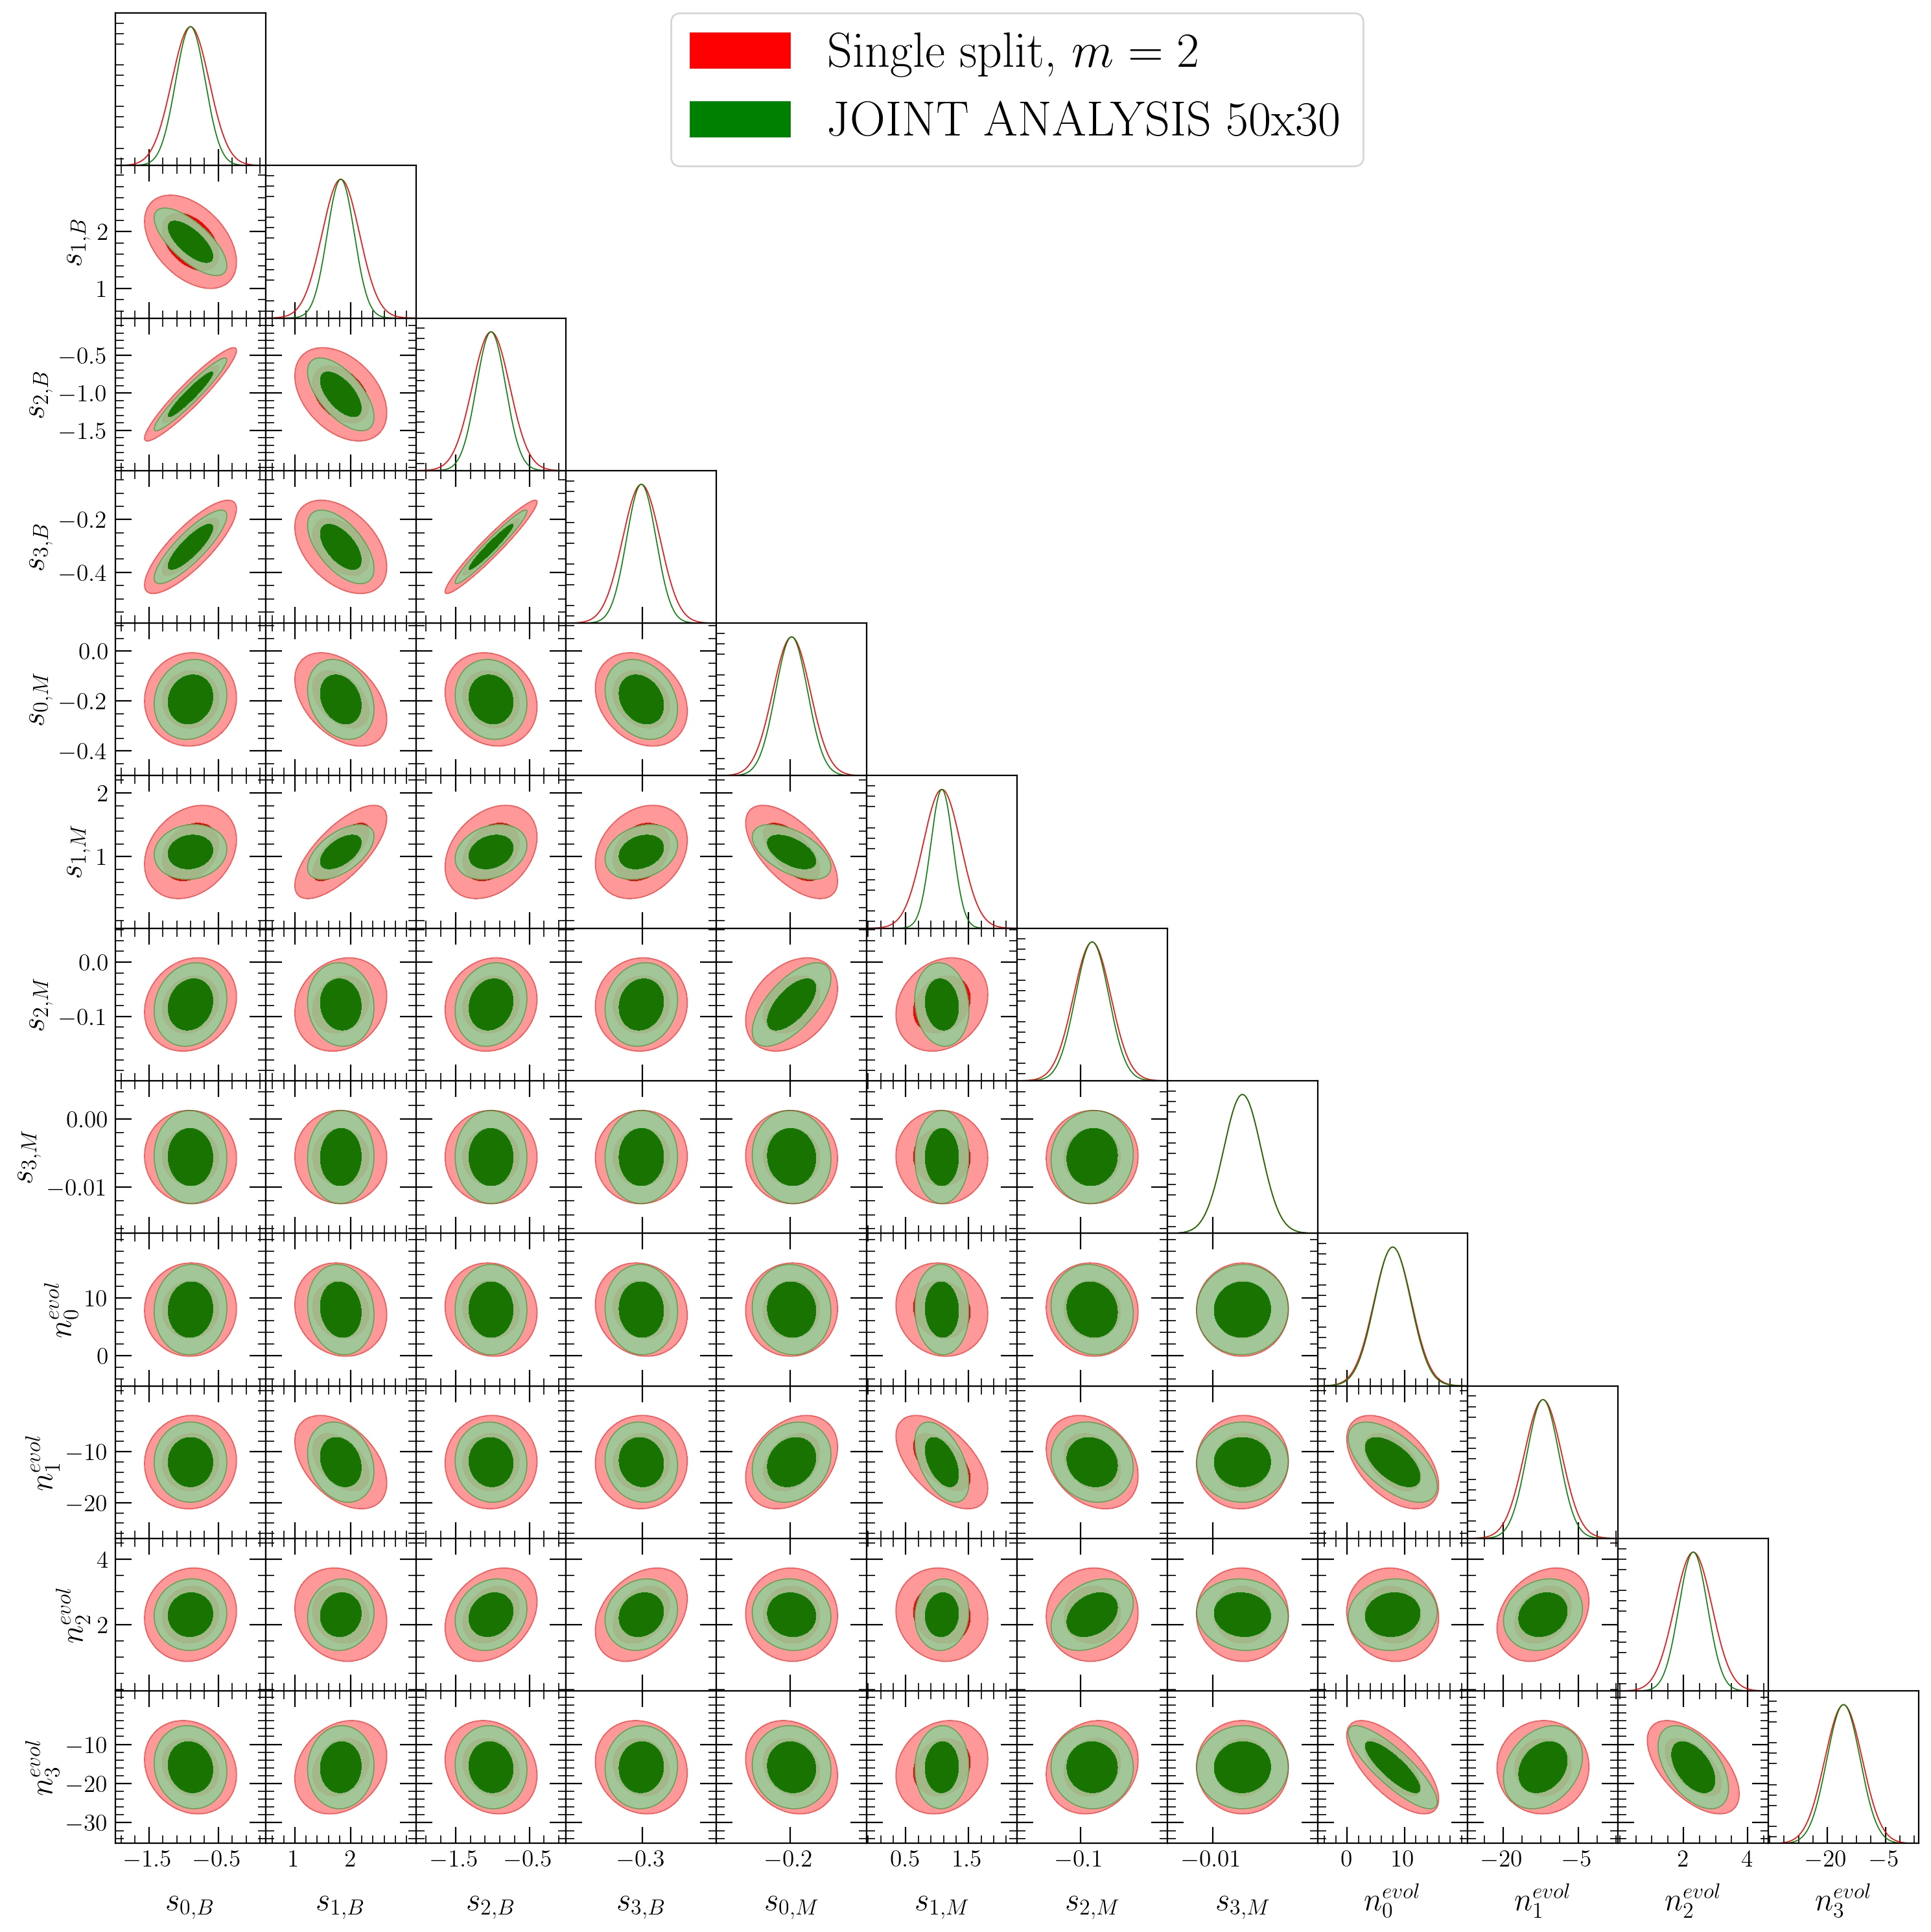

In [54]:
# Triangle plot

mean_joint = params_fid_
mean_50 = params_fid_50[:-9]

sB_names = ['s'+str(int(i))+'B' for i in np.arange(len(sB_4fit50))]
sM_names = ['s'+str(int(i))+'M' for i in np.arange(len(sM_4fit))]

sB_labels=[r's_{'+str(i)+r',B}' for i in np.arange(len(sB_4fit50))]
sM_labels=[r's_{'+str(i)+r',M}' for i in np.arange(len(sM_4fit))]

num_names = ['n'+str(int(i)) for i in np.arange(len(num_fit))]

num_labels=[r'n_{'+str(i)+r'}^{evol}' for i in np.arange(len(num_fit))]

param_names = sB_names + sM_names + num_names 
labels = sB_labels + sM_labels + num_labels 

GaussDist_joint_sbias_nevol_fit_ = GaussianND(mean_joint, Sigma_Matrix_Joint50x30_[:-13,:-13], labels = labels, names = param_names)
GaussDist_50_sbias_nevol_fit = GaussianND(mean_50, Sigma_Matrix_50[:-9,:-9], labels = labels, names = param_names)

g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_50_sbias_nevol_fit, GaussDist_joint_sbias_nevol_fit_], param_names, 
                filled=True, 
                legend_labels=[r'Single split, $m=2$', r'JOINT ANALYSIS 50x30'],
                contour_colors=['red', 'green'])

In [55]:
np.shape(params_fid), np.shape(params_fid_30)

((29,), (21,))

In [56]:
# Delete rows and columns alien to the 30x70 split

nind = list(range(0,4))

Sigma_Matrix_Joint50x30_ = Sigma_Matrix_Joint50x30

Sigma_Matrix_Joint50x30_ = np.delete(arr=Sigma_Matrix_Joint50x30_, obj=nind, axis=0)
Sigma_Matrix_Joint50x30_ = np.delete(arr=Sigma_Matrix_Joint50x30_, obj=nind, axis=1)

np.shape(Sigma_Matrix_Joint50x30_)

(25, 25)

In [57]:
# Delete elements of params_fid

params_fid_ = params_fid[:-13]

params_fid_ = np.delete(arr=params_fid_, obj=nind, axis=0)

np.shape(params_fid_)

(12,)

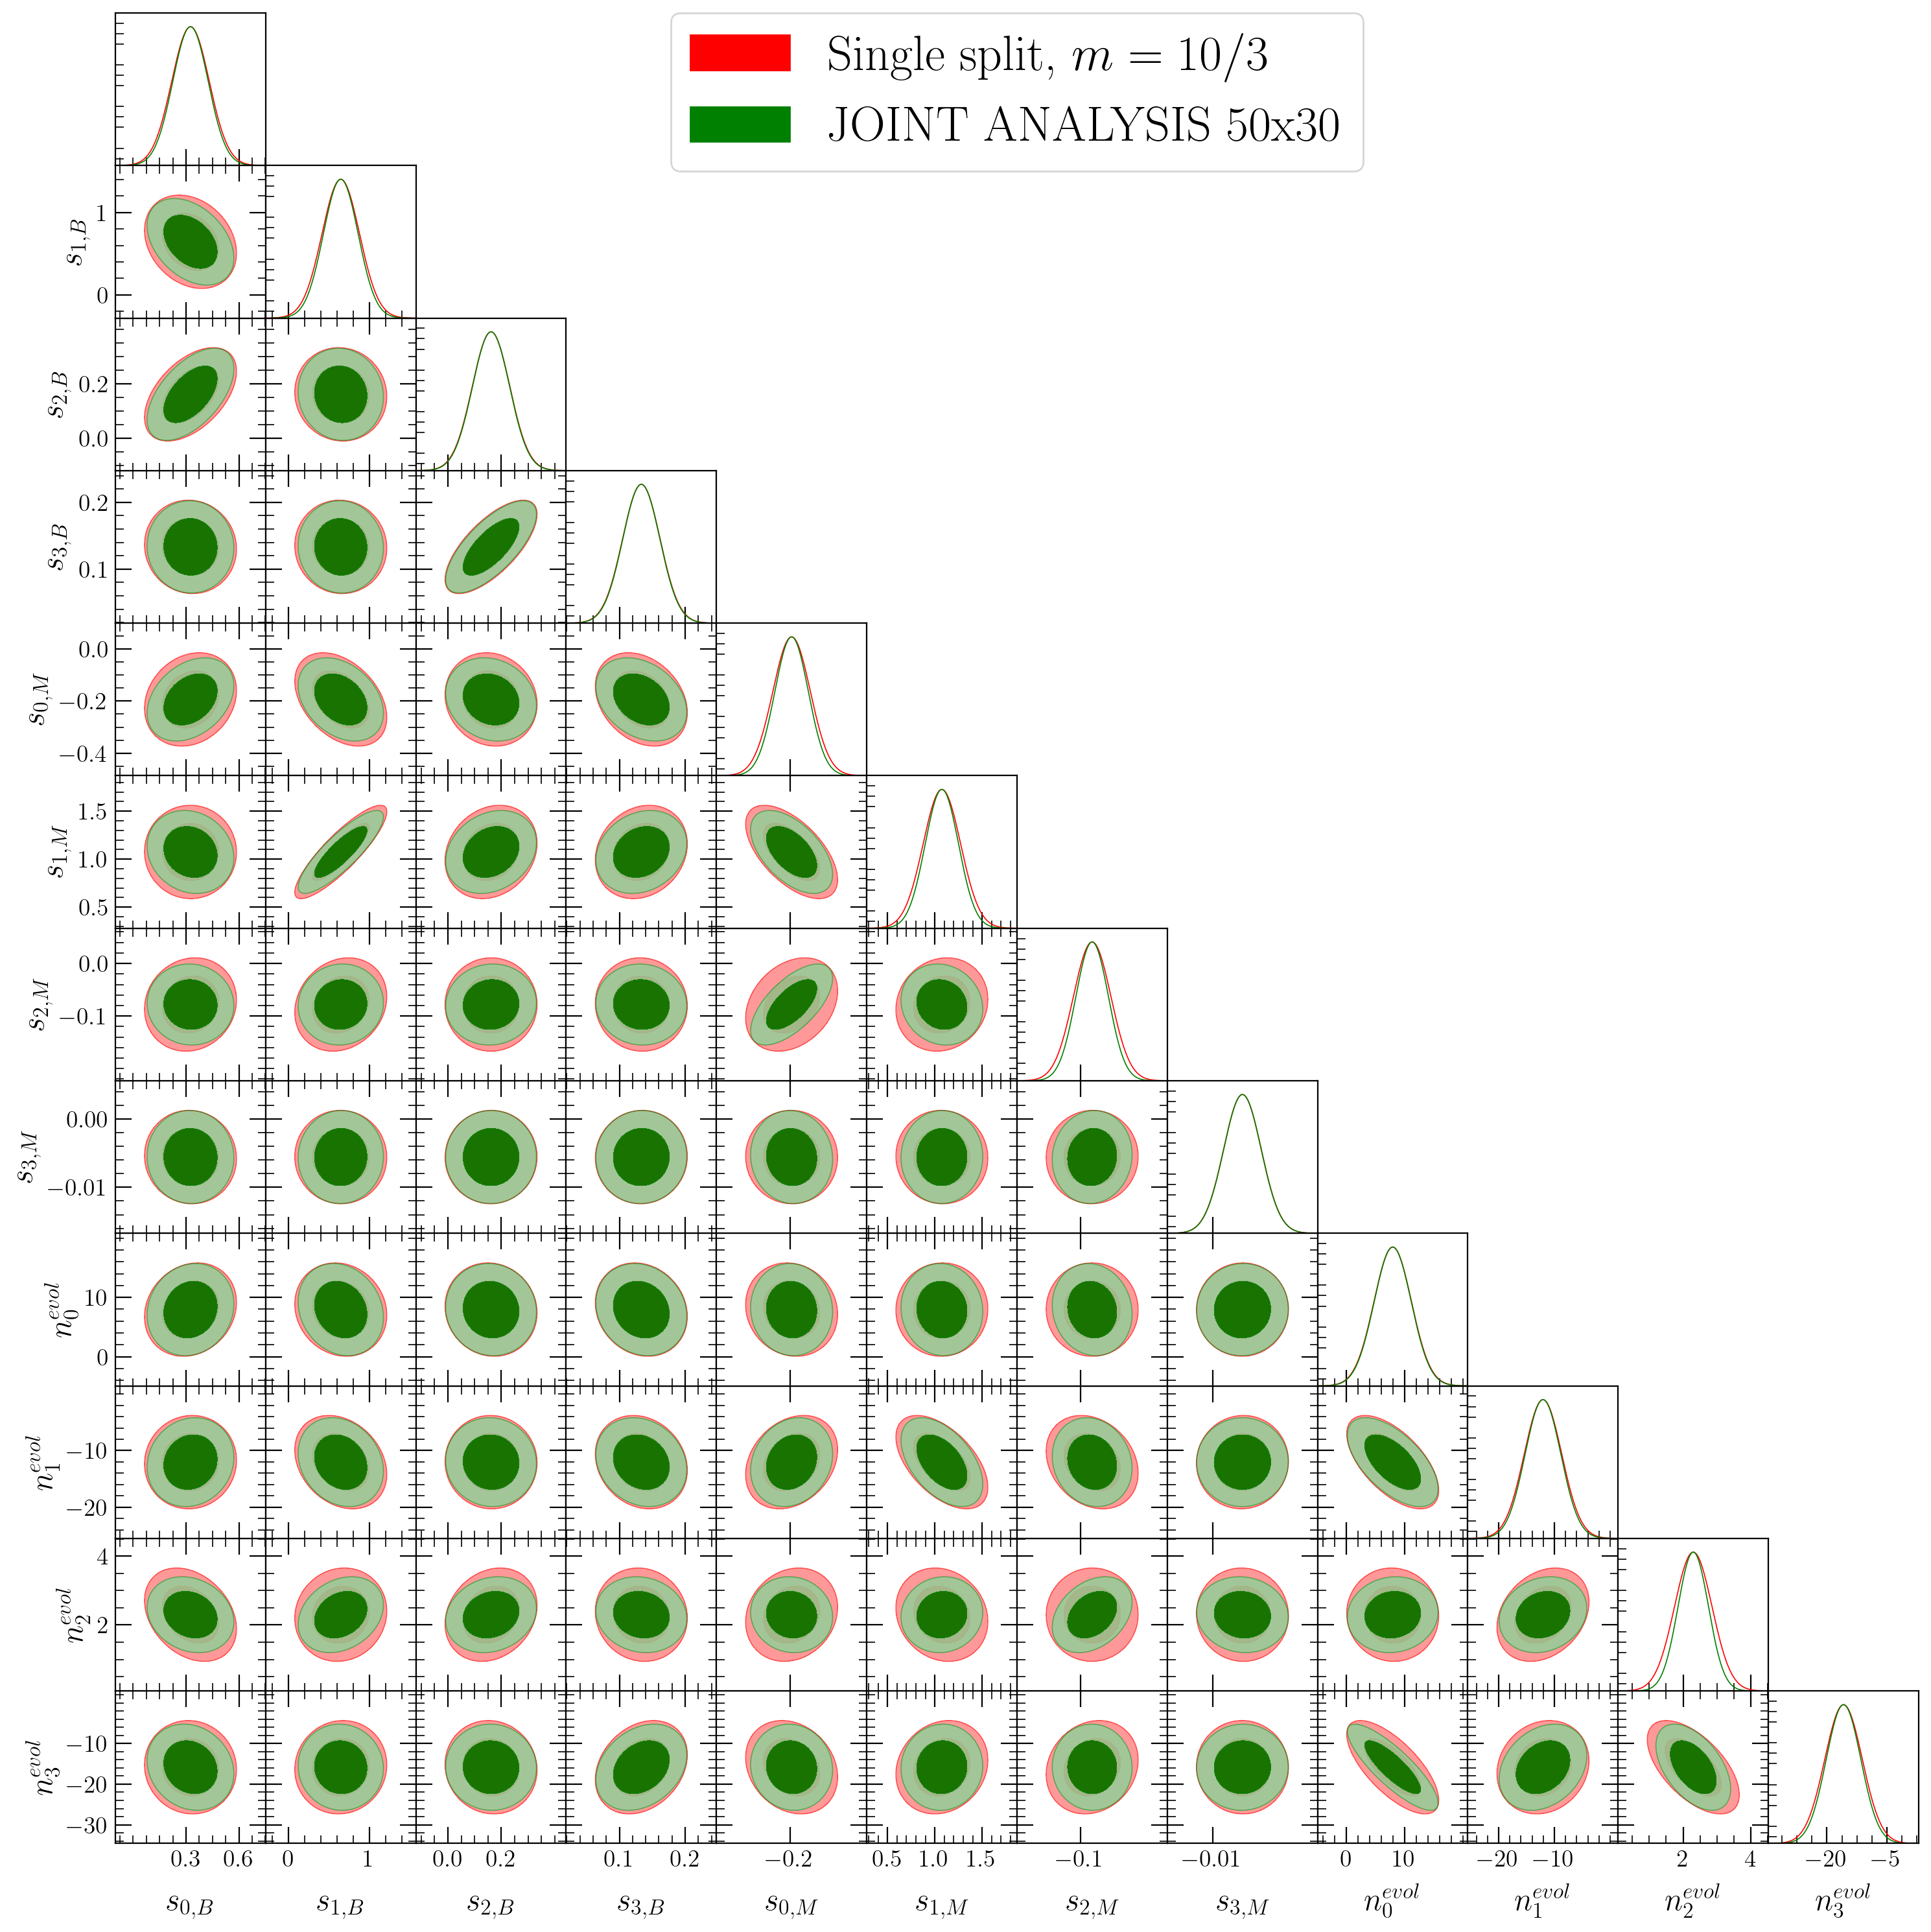

In [58]:
# Triangle plot

mean_joint = params_fid_
mean_30 = params_fid_30[:-9]

sB_names = ['s'+str(int(i))+'B' for i in np.arange(len(sB_4fit50))]
sM_names = ['s'+str(int(i))+'M' for i in np.arange(len(sM_4fit))]

sB_labels=[r's_{'+str(i)+r',B}' for i in np.arange(len(sB_4fit50))]
sM_labels=[r's_{'+str(i)+r',M}' for i in np.arange(len(sM_4fit))]

num_names = ['n'+str(int(i)) for i in np.arange(len(num_fit))]

num_labels=[r'n_{'+str(i)+r'}^{evol}' for i in np.arange(len(num_fit))]

param_names = sB_names + sM_names + num_names 
labels = sB_labels + sM_labels + num_labels 

GaussDist_joint_sbias_nevol_fit_ = GaussianND(mean_joint, Sigma_Matrix_Joint50x30_[:-13,:-13], labels = labels, names = param_names)
GaussDist_30_sbias_nevol_fit = GaussianND(mean_30, Sigma_Matrix_30[:-9,:-9], labels = labels, names = param_names)

g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_30_sbias_nevol_fit, GaussDist_joint_sbias_nevol_fit_], param_names, 
                filled=True, 
                legend_labels=[r'Single split, $m=10/3$', r'JOINT ANALYSIS 50x30'],
                contour_colors=['red', 'green'])

In [59]:
# Delete rows and columns alien to the 50x50 split

nind = list(range(0,16)) + list(range(20,24))

Sigma_Matrix_Joint50x30_ = Sigma_Matrix_Joint50x30

Sigma_Matrix_Joint50x30_ = np.delete(arr=Sigma_Matrix_Joint50x30_, obj=nind, axis=0)
Sigma_Matrix_Joint50x30_ = np.delete(arr=Sigma_Matrix_Joint50x30_, obj=nind, axis=1)

np.shape(Sigma_Matrix_Joint50x30_)

(9, 9)

In [60]:
# Delete elements of params_fid

params_fid_ = params_fid

params_fid_ = np.delete(arr=params_fid_, obj=nind, axis=0)

np.shape(params_fid_)

(9,)

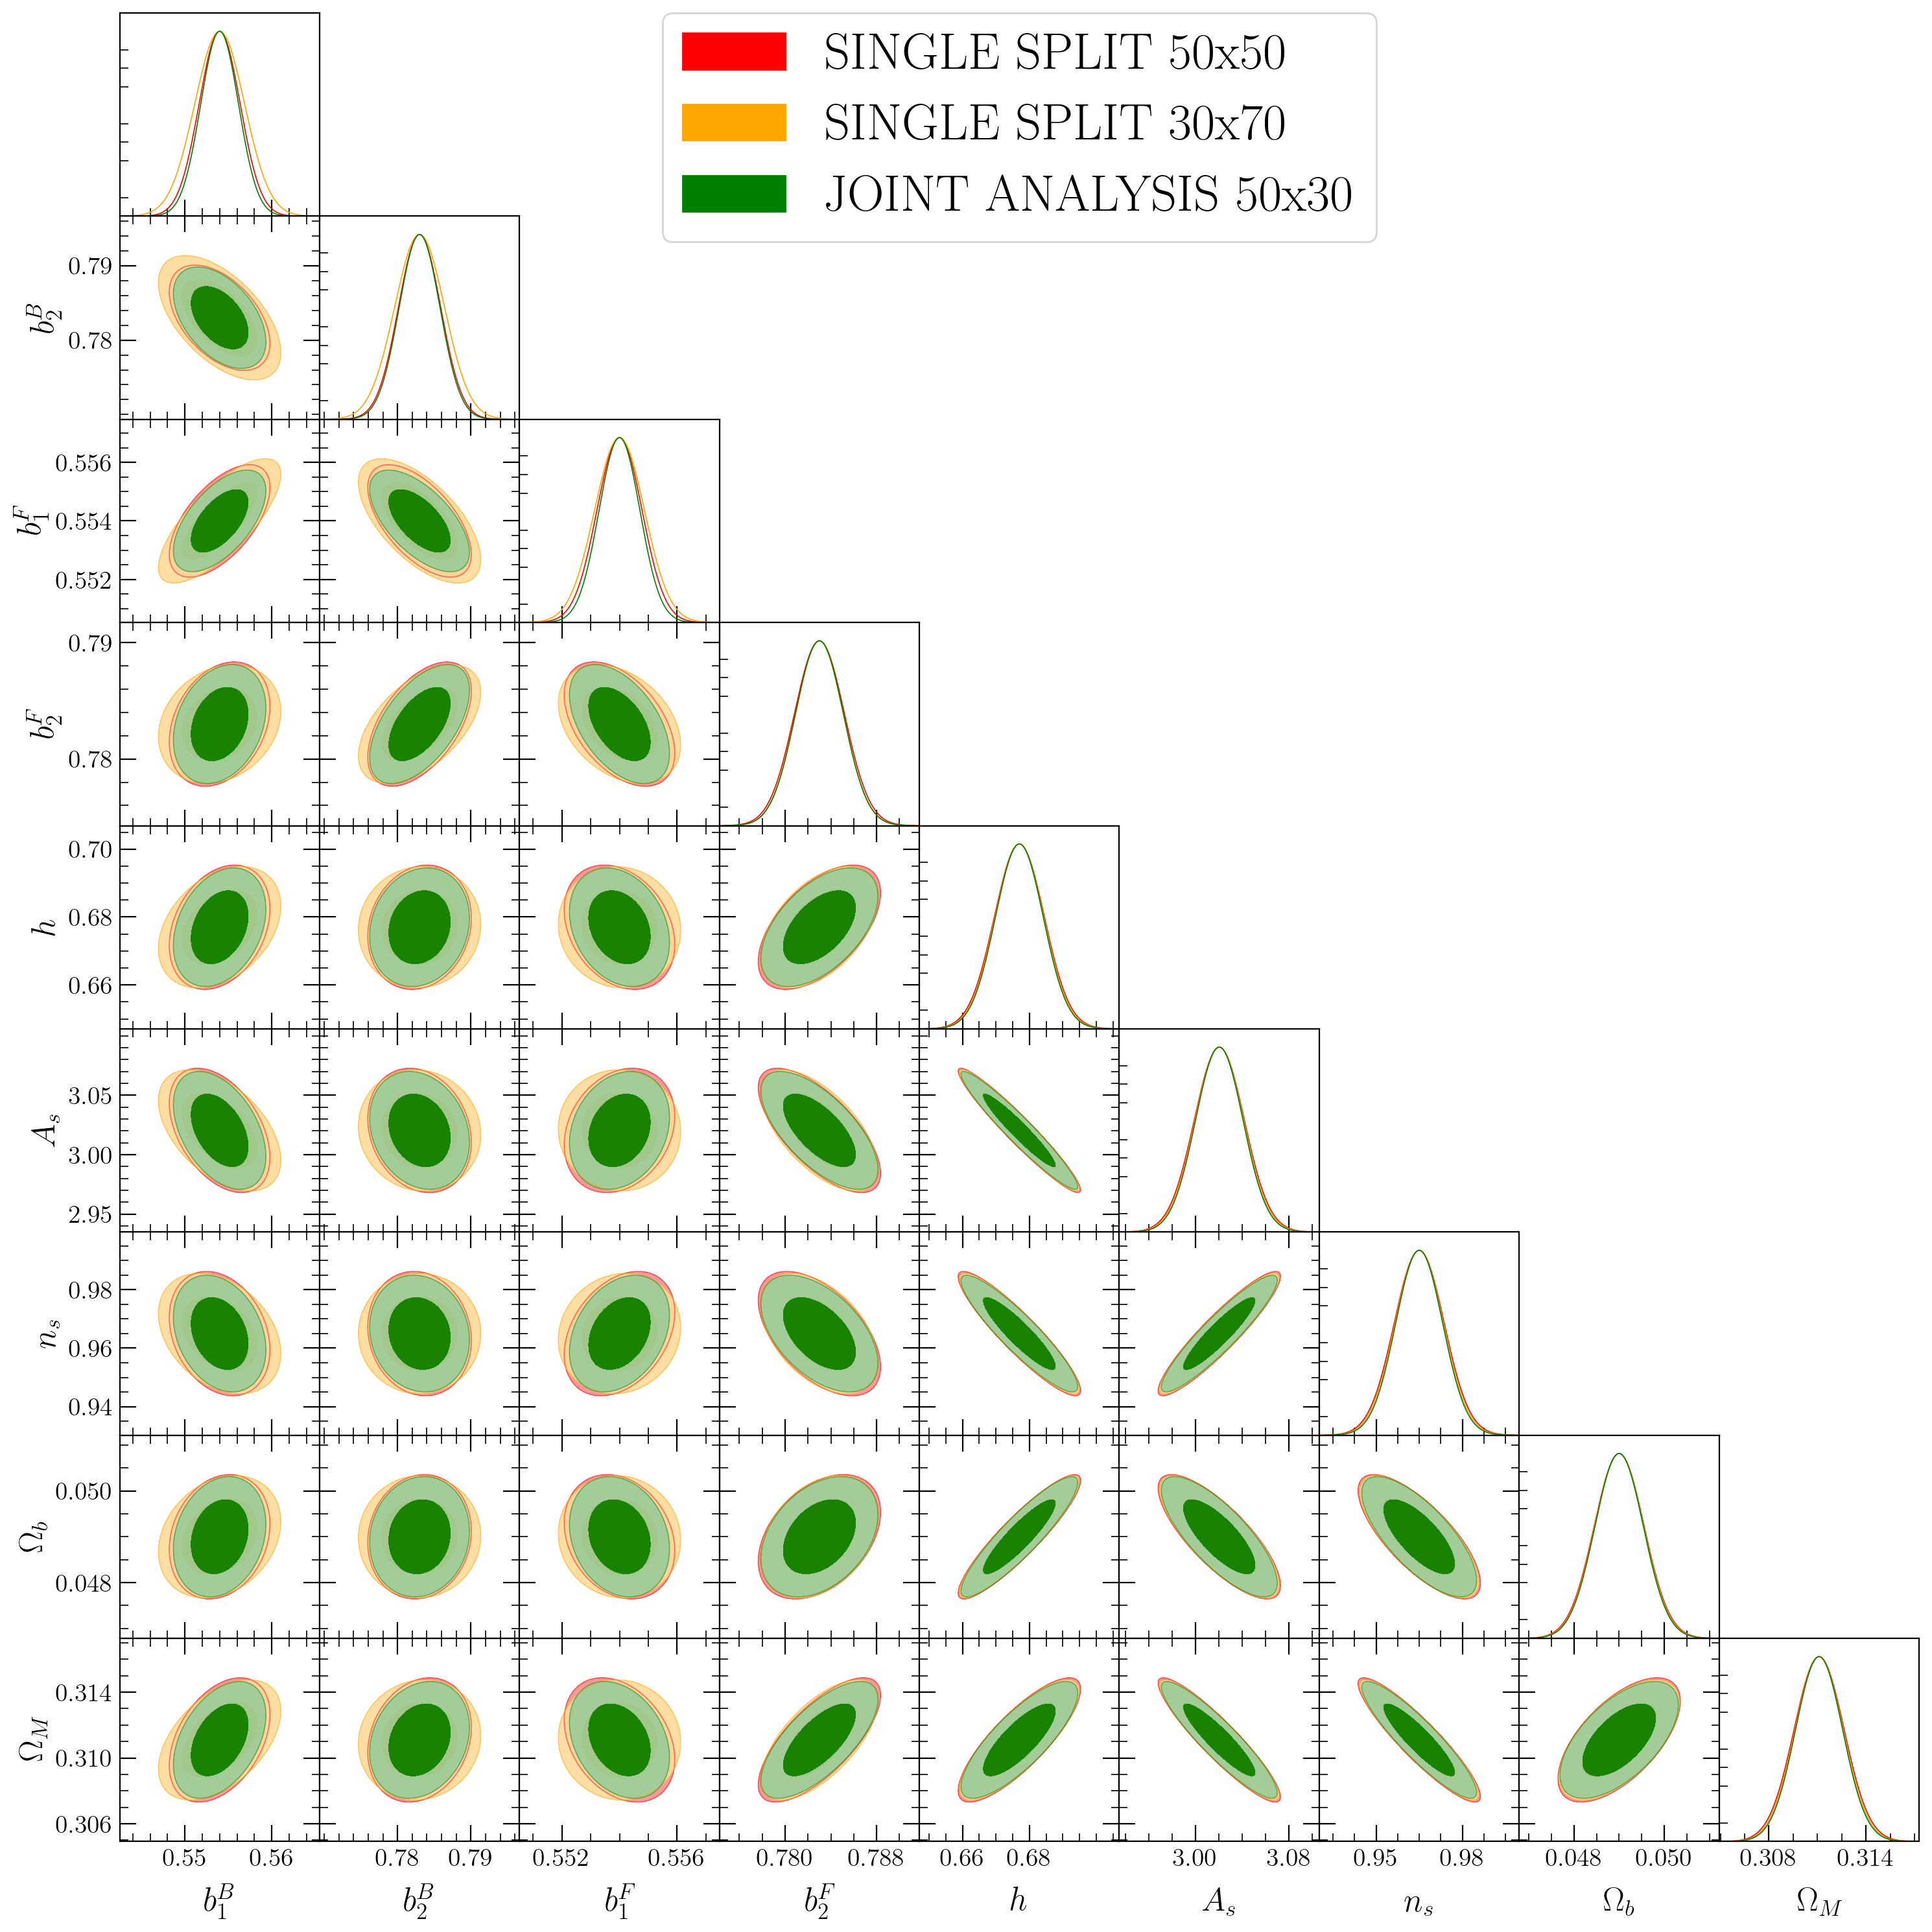

In [61]:
# Triangle plot: GALAXY BIAS AND COSMIC PARAMETERS

mean_50 = params_fid_

gbias_names = ['b1B_m1', 'b2B_m1', 'b1F_m1', 'b2F_m1']
cosmic_names = ['h', 'As', 'ns', 'Ob', 'OM']

gbias_labels = [r'b_1^{B}', r'b_2^{B}', r'b_1^{F}', r'b_2^{F}']
cosmic_labels = [r'h', r'A_s', r'n_s', r'\Omega_b', r'\Omega_M']

param_names = gbias_names + cosmic_names
labels = gbias_labels + cosmic_labels

GaussDist_gbias_cosmic_fit = GaussianND(mean_50, Sigma_Matrix_Joint50x30_, labels = labels, names = param_names)
GaussDist_gbias_cosmic_fit_50 = GaussianND(mean_50, Sigma_Matrix_50[12:, 12:], labels = labels, names = param_names)
GaussDist_gbias_cosmic_fit_30 = GaussianND(mean_50, Sigma_Matrix_30[12:, 12:], labels = labels, names = param_names)


g = plots.get_subplot_plotter(width_inch=15)
g.settings.legend_frame = True
g.settings.alpha_filled_add=0.9
g.settings.legend_fontsize=32
g.settings.axes_fontsize=18
g.settings.axes_labelsize=22
g.settings.axis_tick_max_labels=6

g.triangle_plot([GaussDist_gbias_cosmic_fit_50, GaussDist_gbias_cosmic_fit_30, GaussDist_gbias_cosmic_fit], param_names, 
                filled=True, 
                legend_labels=['SINGLE SPLIT 50x50', 'SINGLE SPLIT 30x70','JOINT ANALYSIS 50x30'],
                contour_colors=['red', 'orange', 'green'])

# Predictions from the JOINT ANALYSIS

## Magnification bias

In [132]:
# Magnification bias fit

def magbias_fit(params, x):
    a, b, c, d = params
    return  a + b * x + c * np.log(x) + d * (np.log(x))**2

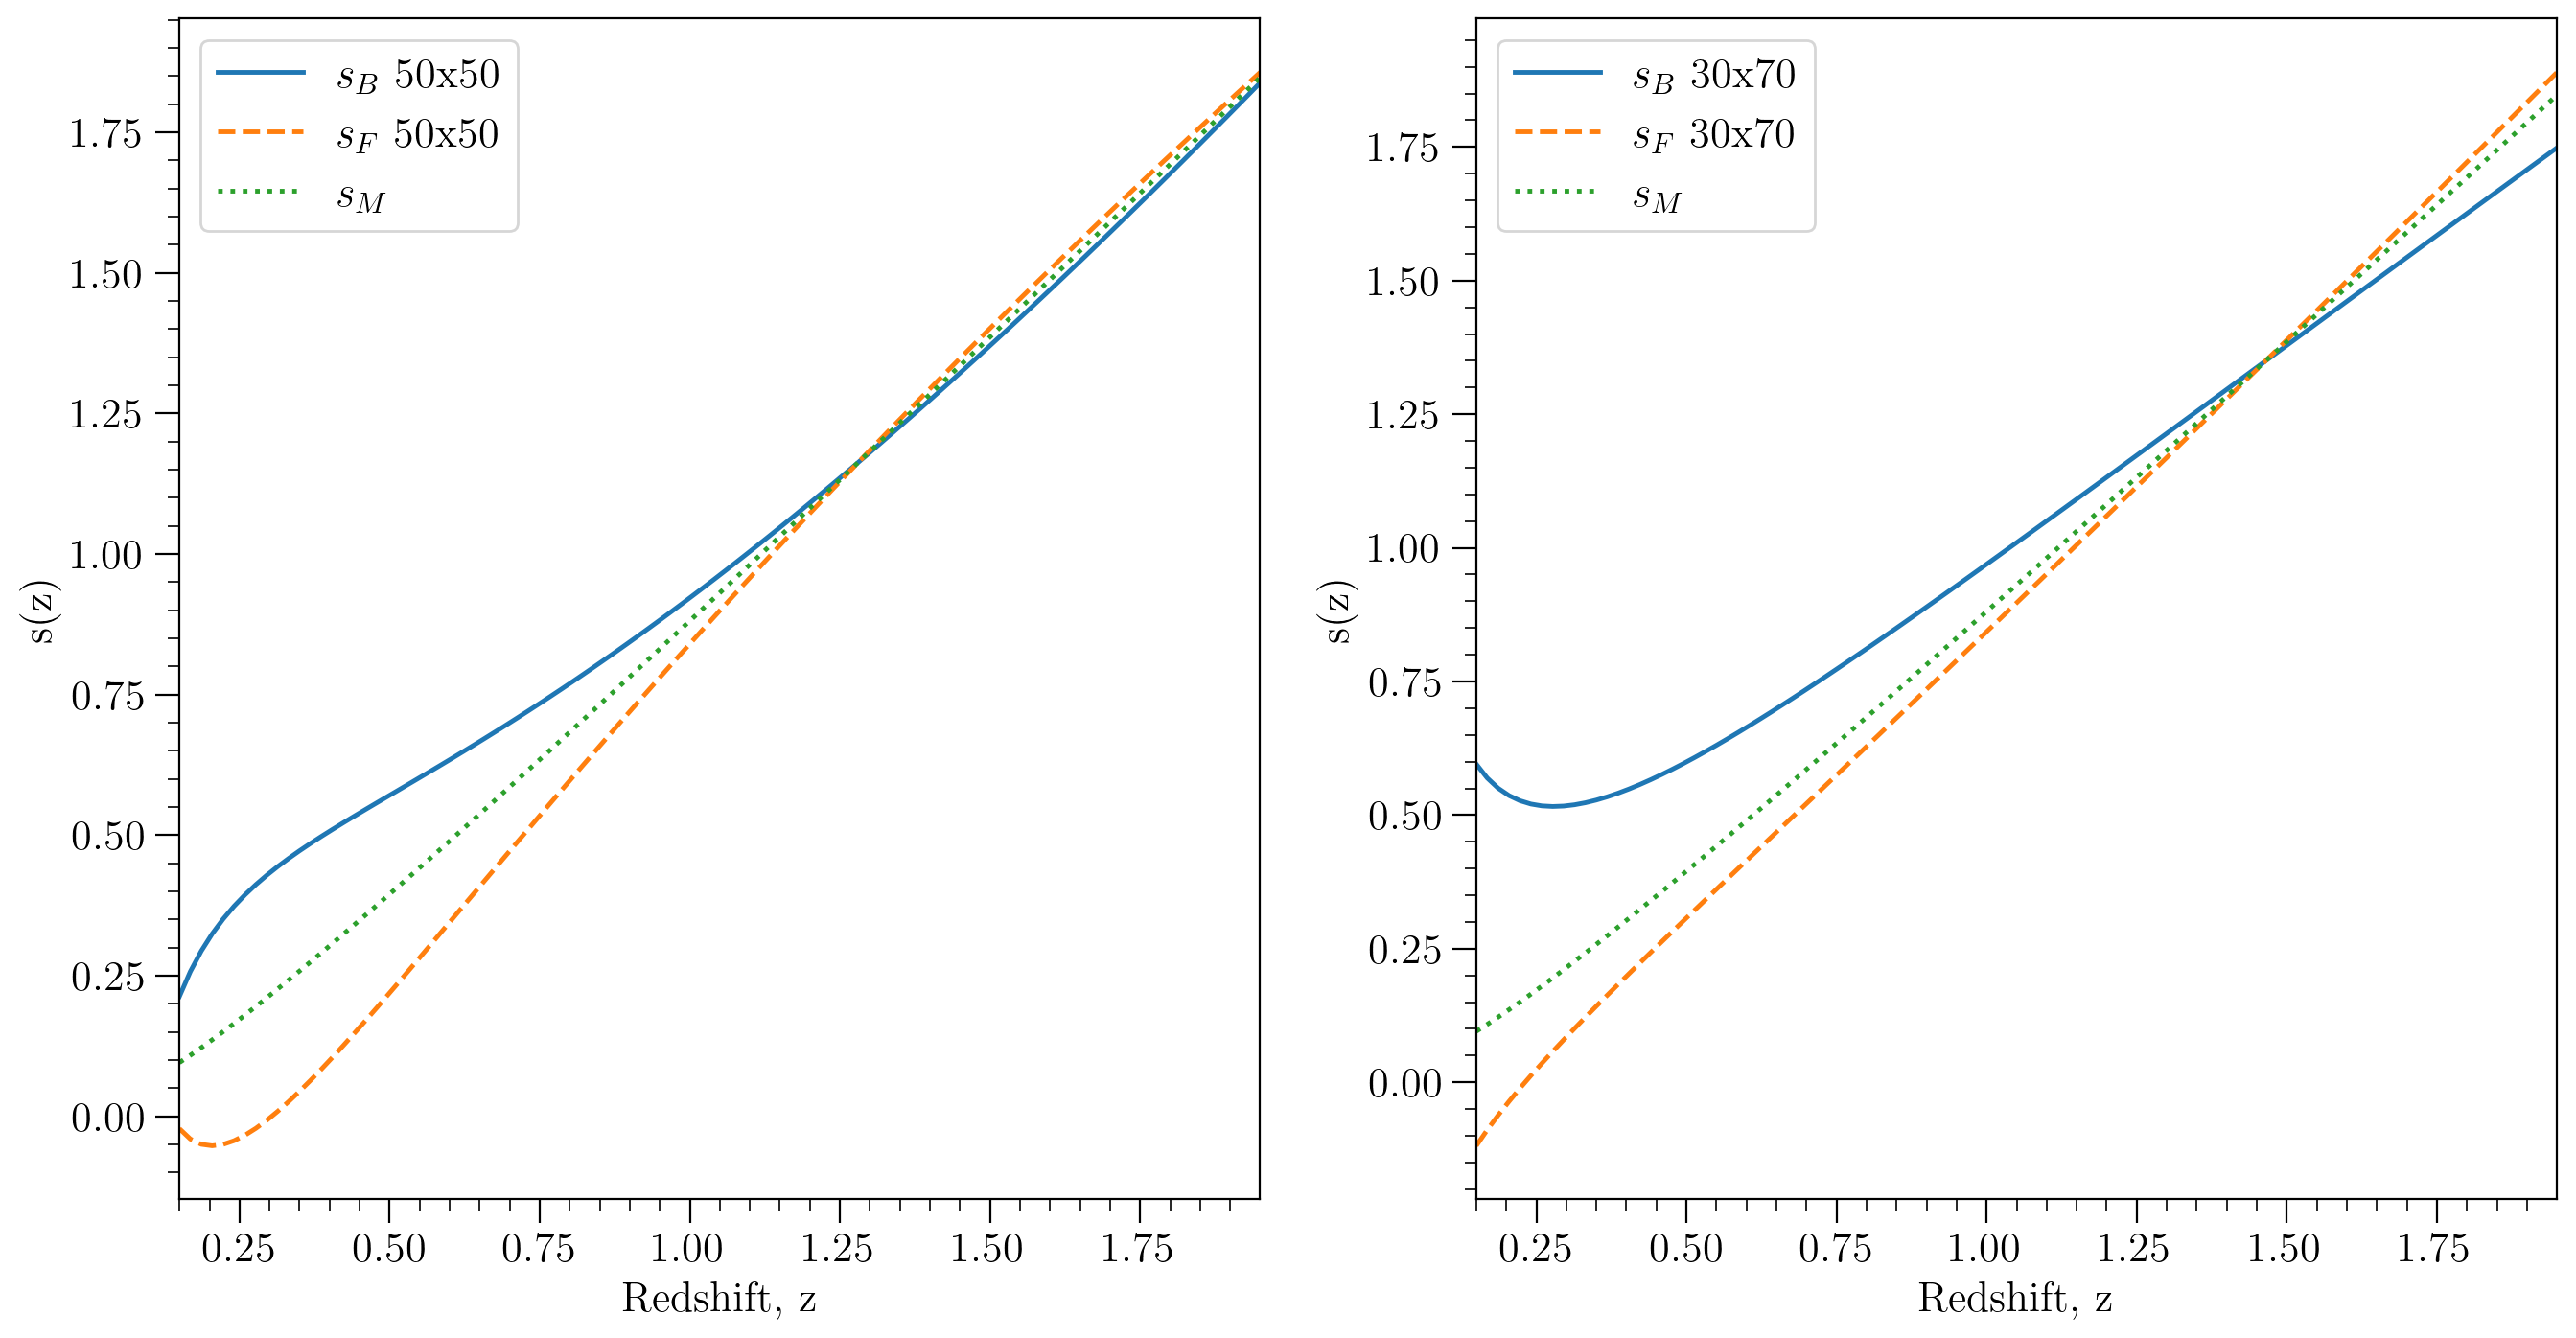

In [133]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

m_50 = 2.
m_30 = 10/3.

sB_fid_50 = magbias_fit(sB_fit[:4], z_lin)
sB_fid_30 = magbias_fit(sB_fit[4:], z_lin)
sM_fid = magbias_fit(sM_4fit, z_lin)
sF_fid_50 = sM_fid * (m_50/(m_50-1)) - sB_fid_50/(m_50-1)
sF_fid_30 = sM_fid * (m_30/(m_30-1)) - sB_fid_30/(m_30-1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, sB_fid_50, '-', label=r'$s_B$ 50x50')
ax[0].plot(z_lin, sF_fid_50, '--', label=r'$s_F$ 50x50')
ax[0].plot(z_lin, sM_fid, ':', label=r'$s_M$')

ax[1].plot(z_lin, sB_fid_30, '-', label=r'$s_B$ 30x70')
ax[1].plot(z_lin, sF_fid_30, '--', label=r'$s_F$ 30x70')
ax[1].plot(z_lin, sM_fid, ':', label=r'$s_M$')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r's(z)')
    axi.legend();


### Observables: $s_B(z)$ and $s_M(z)$

In [134]:
# Compute priors 

# Select the marginalized covariance matrix for the magnification biases priors

cov_sB_50_priors = Cov_prior_all[:4, :4]
cov_sB_30_priors = Cov_prior_all[4:8, 4:8]
cov_sM_priors = Cov_prior_all[8:12, 8:12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sB_50_pars_samples_priors = np.random.multivariate_normal(sB_4fit50, cov_sB_50_priors, num_samples)
sB_30_pars_samples_priors = np.random.multivariate_normal(sB_4fit30, cov_sB_30_priors, num_samples)
sM_pars_samples_priors = np.random.multivariate_normal(sM_4fit, cov_sM_priors, num_samples)

# Evaluate fitting function for each parameter sample

sB_50_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples_priors])
sB_30_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_30_pars_samples_priors])

sM_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sM_pars_samples_priors])

# Calculate the 68% confidence interval

sB_50_lower_bound_priors = np.percentile(sB_50_samples_priors, 16, axis=0)
sB_50_upper_bound_priors = np.percentile(sB_50_samples_priors, 84, axis=0)

sB_30_lower_bound_priors = np.percentile(sB_30_samples_priors, 16, axis=0)
sB_30_upper_bound_priors = np.percentile(sB_30_samples_priors, 84, axis=0)

sM_lower_bound_priors = np.percentile(sM_samples_priors, 16, axis=0)
sM_upper_bound_priors = np.percentile(sM_samples_priors, 84, axis=0)


###### Compare the two observables

In [135]:
Sigma_Matrix_Joint50x30[:4, :4]

array([[ 0.04570435, -0.03685026,  0.04035766,  0.0102929 ],
       [-0.03685026,  0.0592362 , -0.03014407, -0.00811258],
       [ 0.04035766, -0.03014407,  0.039586  ,  0.01091063],
       [ 0.0102929 , -0.00811258,  0.01091063,  0.00323799]])

In [136]:
# Select the marginalized covariance matrix for the magnification biases

cov_sB_Joint_50 = Sigma_Matrix_Joint50x30[:4, :4]
cov_sB_Joint_30 = Sigma_Matrix_Joint50x30[4:8, 4:8]
cov_sM_Joint = Sigma_Matrix_Joint50x30[8:12, 8:12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sB_Joint_50_pars_samples = np.random.multivariate_normal(sB_4fit50, cov_sB_Joint_50, num_samples)
sB_Joint_30_pars_samples = np.random.multivariate_normal(sB_4fit30, cov_sB_Joint_30, num_samples)
sM_Joint_pars_samples = np.random.multivariate_normal(sM_4fit, cov_sM_Joint, num_samples)

# Evaluate fitting function for each parameter sample
sB_Joint_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_Joint_50_pars_samples])
sB_Joint_30_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_Joint_30_pars_samples])
sM_Joint_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_Joint_pars_samples])

# Calculate the 68% confidence interval
sB_Joint_50_lower_bound = np.percentile(sB_Joint_50_samples, 16, axis=0)
sB_Joint_50_upper_bound = np.percentile(sB_Joint_50_samples, 84, axis=0)

sB_Joint_30_lower_bound = np.percentile(sB_Joint_30_samples, 16, axis=0)
sB_Joint_30_upper_bound = np.percentile(sB_Joint_30_samples, 84, axis=0)

sM_Joint_lower_bound = np.percentile(sM_Joint_samples, 16, axis=0)
sM_Joint_upper_bound = np.percentile(sM_Joint_samples, 84, axis=0)

Predictions for $s_B(z)$ vs Priors

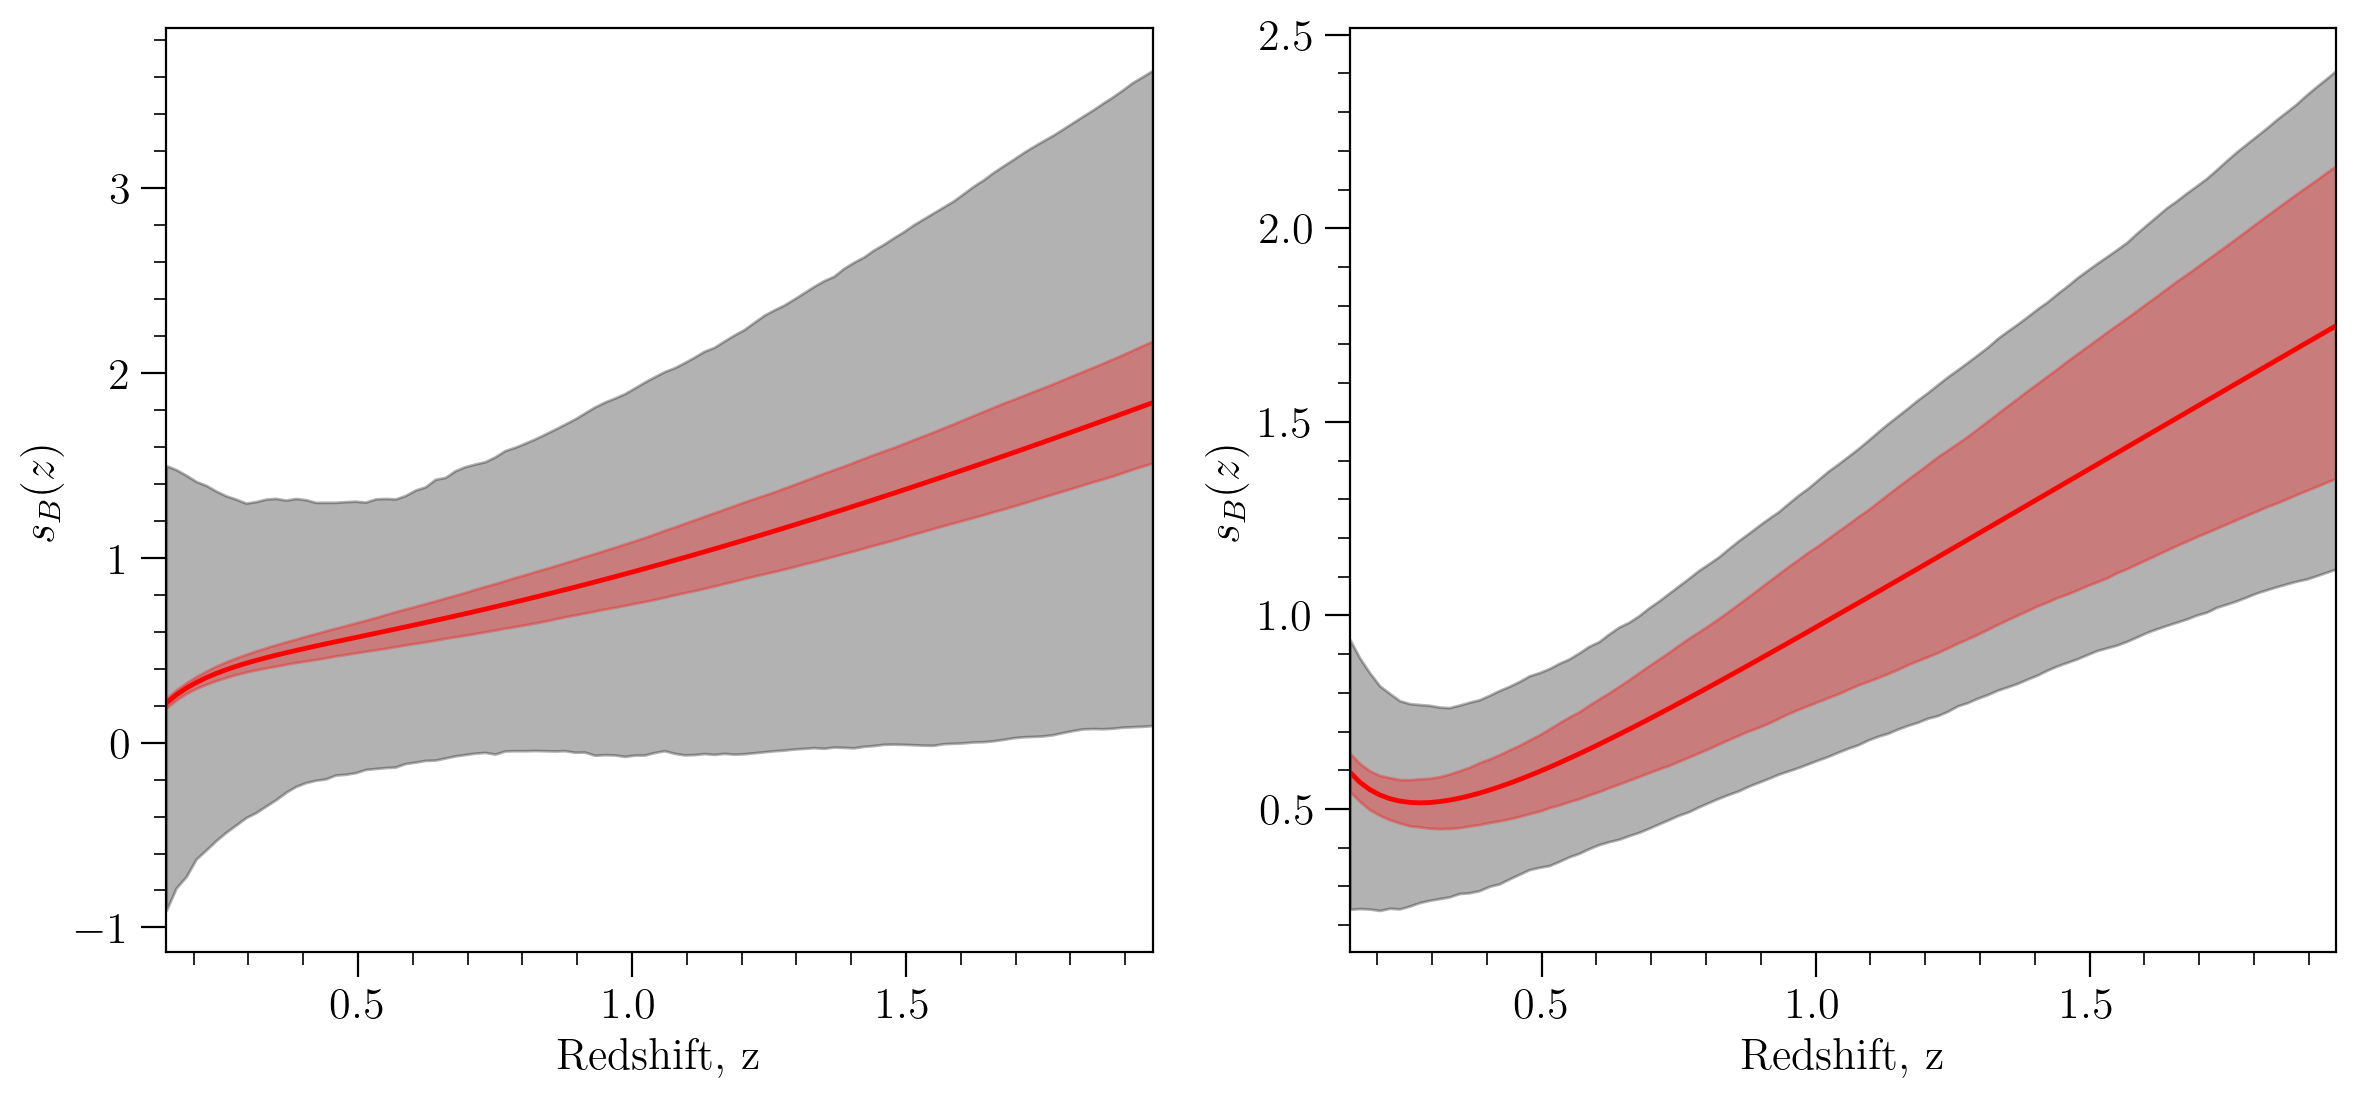

In [137]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sB_fid_50, 'r-')
ax[0].fill_between(z_lin, sB_50_lower_bound_priors, sB_50_upper_bound_priors, color='black', alpha=0.3)
ax[0].fill_between(z_lin, sB_Joint_50_lower_bound, sB_Joint_50_upper_bound, color='red', alpha=0.3)

ax[1].plot(z_lin, sB_fid_30, 'r-')
ax[1].fill_between(z_lin, sB_30_lower_bound_priors, sB_30_upper_bound_priors, color='black', alpha=0.3)
ax[1].fill_between(z_lin, sB_Joint_30_lower_bound, sB_Joint_30_upper_bound, color='red', alpha=0.3)

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r'$s_B(z)$')

Predictions for $s_M(z)$ vs Priors

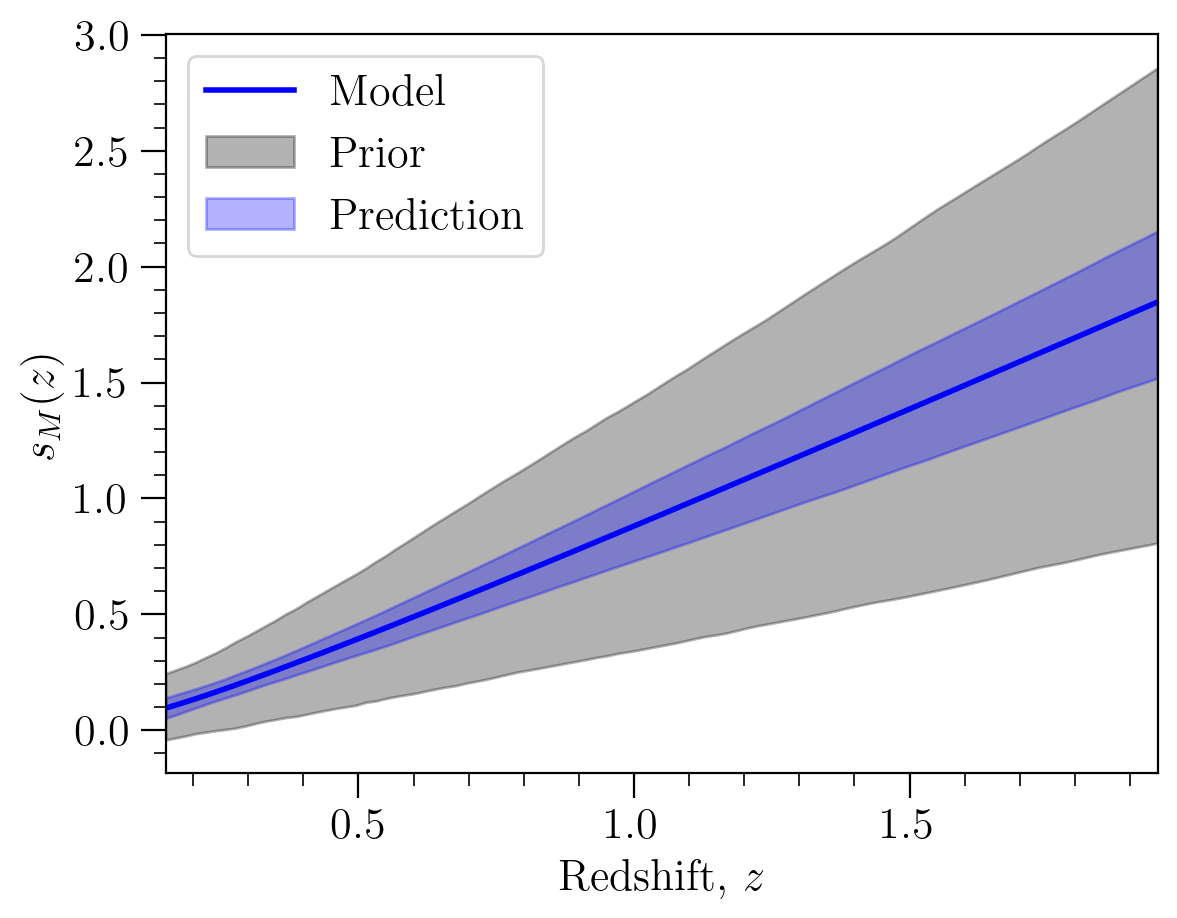

In [138]:
plt.plot(z_lin, sM_fid, '-', lw = 2.0, color='blue', label = 'Model')

# Shade the 68% confidence interval

plt.fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
plt.fill_between(z_lin, sM_Joint_lower_bound, sM_Joint_upper_bound, color='blue', alpha=0.3, label = r'Prediction')

plt.xlim(z_bins[0],z_bins[-1])

plt.xlabel(r'Redshift, $z$');
plt.ylabel(r'$s_M(z)$');
plt.legend(loc='upper left');

### Magnification bias of the Faint, $s_F(z)$

The magnification bias of the faint population is obtained by:

$$ s_F(z) = s_{model}(z)\frac{\bar{N}(z)}{\bar{N}_F(z)} - s_B(z)\frac{\bar{N}_B(z)}{\bar{N}_F(z)} = s_F(z) = s_{model}(z)\frac{m}{m-1} - s_B(z)\frac{1}{m-1} $$ 

We need to sample together the $s_B$ and $s_m$ parameters.

In [139]:
sbias_fid = np.concatenate([sB_4fit50, sB_4fit30, sM_4fit])

np.shape(sbias_fid)

(12,)

In [140]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias = Sigma_Matrix_Joint50x30[:12, :12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sbias_Joint_pars_samples = np.random.multivariate_normal(sbias_fid, cov_sbias, num_samples)

# Evaluate fitting function for each parameter sample
sB_Joint_50_samples_ = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_Joint_pars_samples])
sB_Joint_30_samples_ = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_Joint_pars_samples])
sM_Joint_samples_ = np.array([magbias_fit(pars[8:12], z_lin) for pars in sbias_Joint_pars_samples])

# Compute the sF for each sample
sF_50_samples_ = sM_Joint_samples_*m_50/(m_50-1) - sB_Joint_50_samples_/(m_50-1)
sF_30_samples_ = sM_Joint_samples_*m_30/(m_30-1) - sB_Joint_30_samples_/(m_30-1)


# Calculate the 68% confidence interval
sF_50_Joint_lower_bound_ = np.percentile(sF_50_samples_, 16, axis=0)
sF_50_Joint_upper_bound_ = np.percentile(sF_50_samples_, 84, axis=0)

sF_30_Joint_lower_bound_ = np.percentile(sF_30_samples_, 16, axis=0)
sF_30_Joint_upper_bound_ = np.percentile(sF_30_samples_, 84, axis=0)

Compare with priors

In [141]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias_priors_ = Cov_prior_all[:12, :12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sbias_pars_samples_priors_ = np.random.multivariate_normal(sbias_fid, cov_sbias_priors_, num_samples)

# Evaluate fitting function for each parameter sample
sB_50_samples_priors_ = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_pars_samples_priors_])
sB_30_samples_priors_ = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_pars_samples_priors_])
sM_samples_priors_ = np.array([magbias_fit(pars[8:12], z_lin) for pars in sbias_pars_samples_priors_])

# Compute the sF for each sample
sF_50_samples_priors_ = sM_samples_priors_*m_50/(m_50-1) - sB_50_samples_priors_/(m_50-1)
sF_30_samples_priors_ = sM_samples_priors_*m_30/(m_30-1) - sB_30_samples_priors_/(m_30-1)

# Calculate the 68% confidence interval
sF_50_lower_bound_priors_ = np.percentile(sF_50_samples_priors_, 16, axis=0)
sF_50_upper_bound_priors_ = np.percentile(sF_50_samples_priors_, 84, axis=0)

sF_30_lower_bound_priors_ = np.percentile(sF_30_samples_priors_, 16, axis=0)
sF_30_upper_bound_priors_ = np.percentile(sF_30_samples_priors_, 84, axis=0)

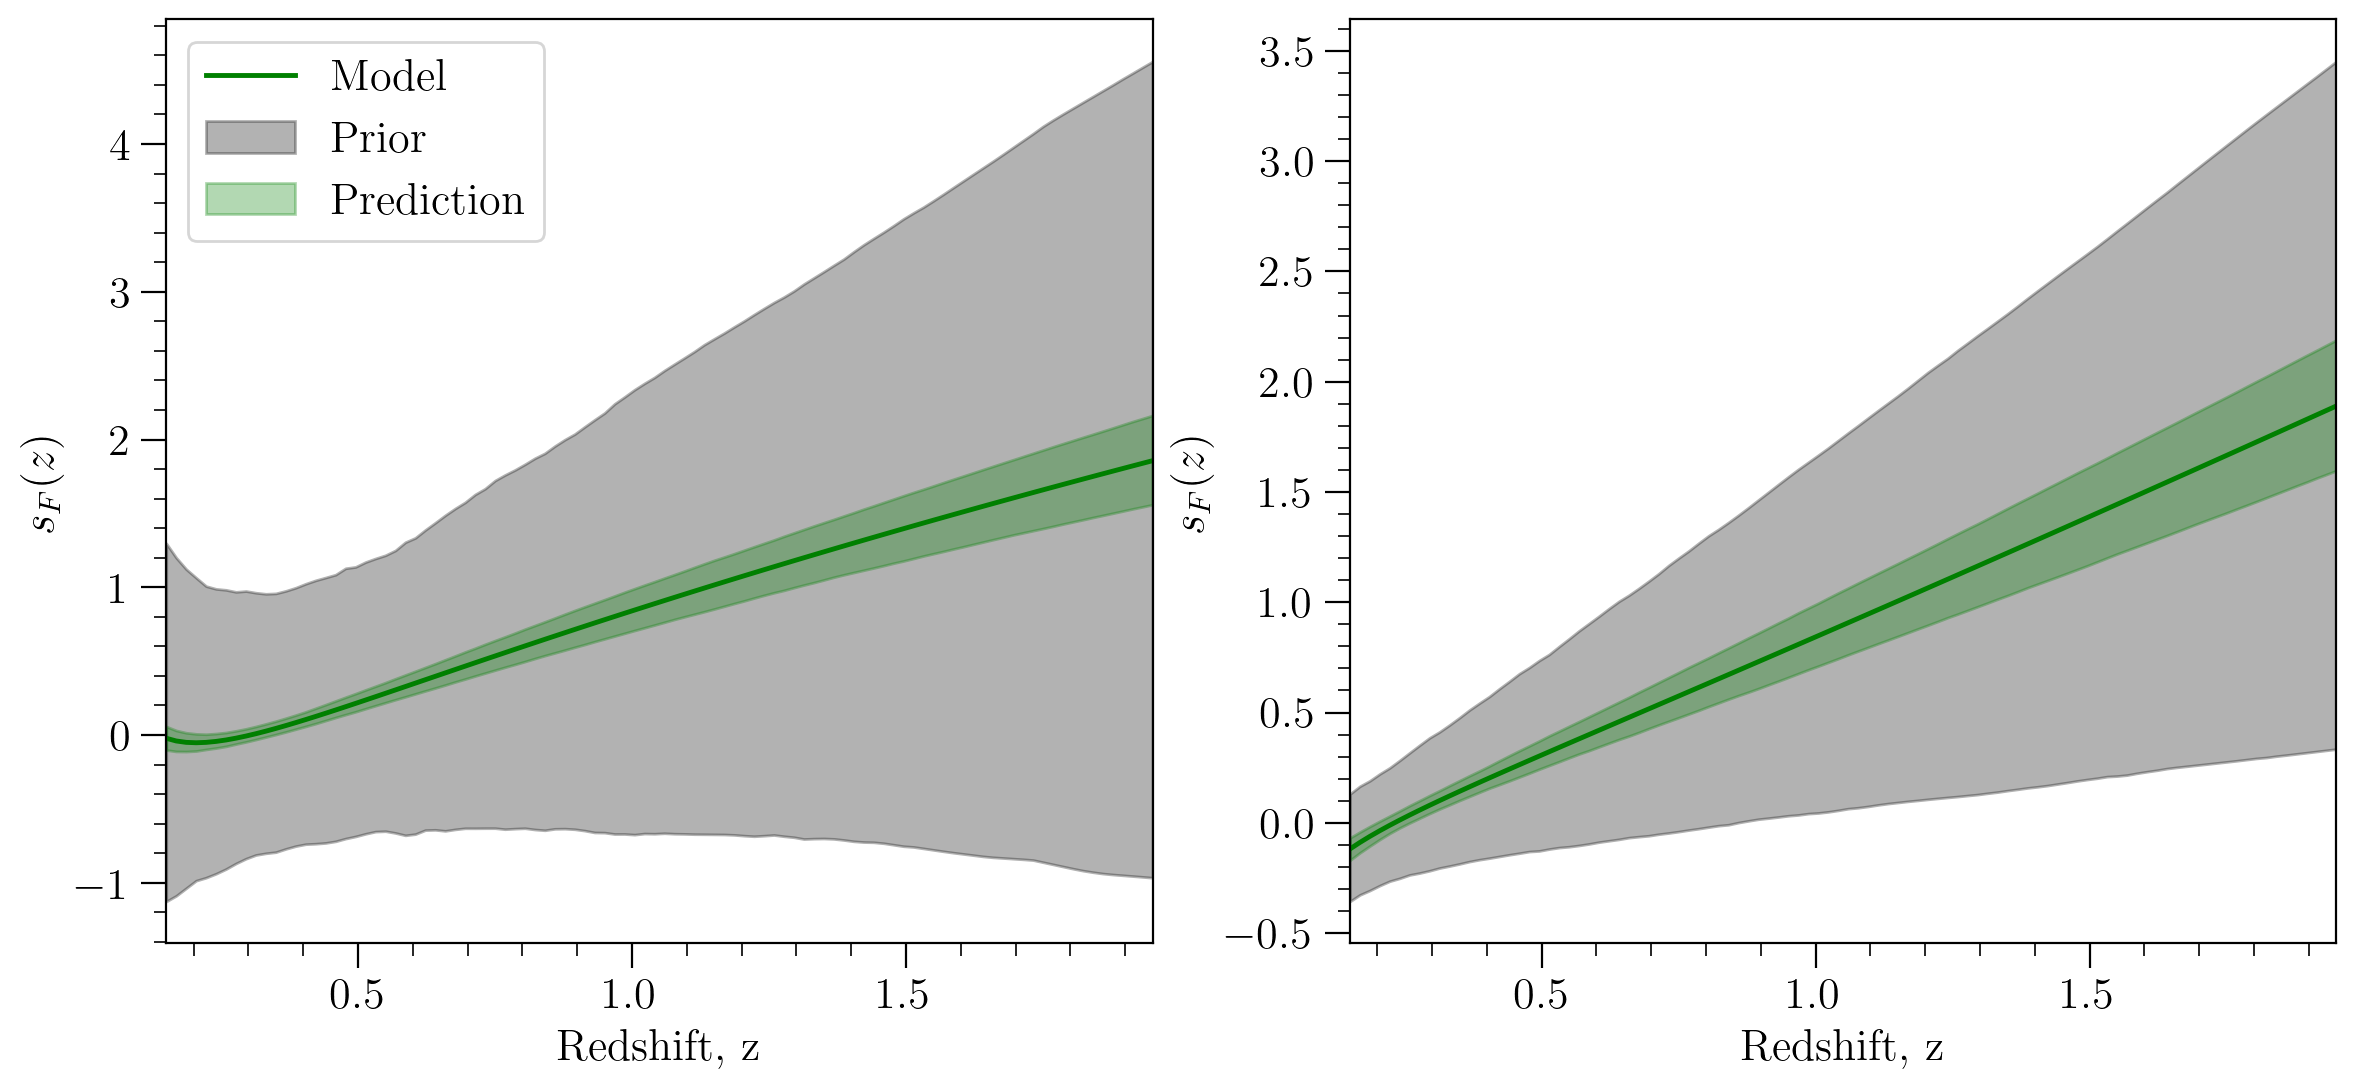

In [142]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sF_fid_50, '-', color = 'green', label = 'Model')
ax[0].fill_between(z_lin, sF_50_lower_bound_priors_, sF_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sF_50_Joint_lower_bound_, sF_50_Joint_upper_bound_, color='green', alpha=0.3, label = 'Prediction')

ax[1].plot(z_lin, sF_fid_30, '-', color = 'green')
ax[1].fill_between(z_lin, sF_30_lower_bound_priors_, sF_30_upper_bound_priors_, color='black', alpha=0.3)
ax[1].fill_between(z_lin, sF_30_Joint_lower_bound_, sF_30_Joint_upper_bound_, color='green', alpha=0.3)

ax[0].legend(loc='upper left')

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r'$s_F(z)$')

## Number evolution

In [205]:
def nevol_fit(params, x):
    a, b, c, d = params
    return a + b * x + c * (1/x) + d * np.exp(-x)

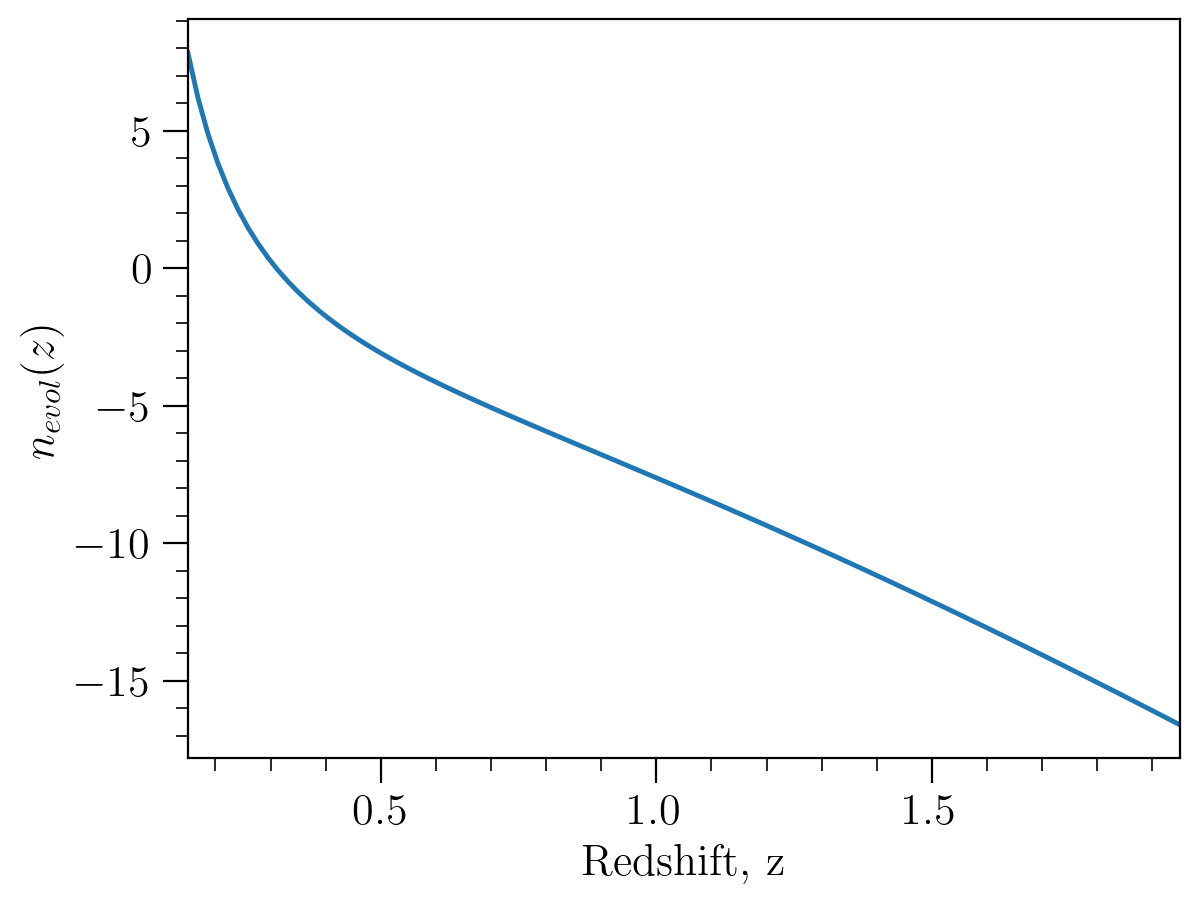

In [206]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)
m_split = 2.

num_evol_fid = nevol_fit(num_fit, z_lin)

plt.plot(z_lin, num_evol_fid, '-')

plt.xlim(z_bins[0],z_bins[-1])

plt.xlabel(r'Redshift, z');
plt.ylabel(r'$n_{evol}(z)$');
#plt.title('Fitting model for the number desnsitiy evolution');

In [207]:
# Select the marginalized covariance matrix for the number evolution
cov_Joint_numevol = Sigma_Matrix_Joint50x30[12:16, 12:16]
cov_numevol_priors = Cov_prior_all[12:16, 12:16]


# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
nevol_Joint_pars_samples = np.random.multivariate_normal(num_fit, cov_Joint_numevol, num_samples)
nevol_samples_priors = np.random.multivariate_normal(num_fit, cov_numevol_priors, num_samples)


# Evaluate fitting function for each parameter sample
nevol_Joint_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_Joint_pars_samples])
nevol_samples_priors = np.array([nevol_fit(pars, z_lin) for pars in nevol_samples_priors])

# Calculate the 68% confidence interval
nevol_Joint_lower_bound = np.percentile(nevol_Joint_samples, 16, axis=0)
nevol_Joint_upper_bound = np.percentile(nevol_Joint_samples, 84, axis=0)
nevol_lower_bound_priors = np.percentile(nevol_samples_priors, 16, axis=0)
nevol_upper_bound_priors = np.percentile(nevol_samples_priors, 84, axis=0)

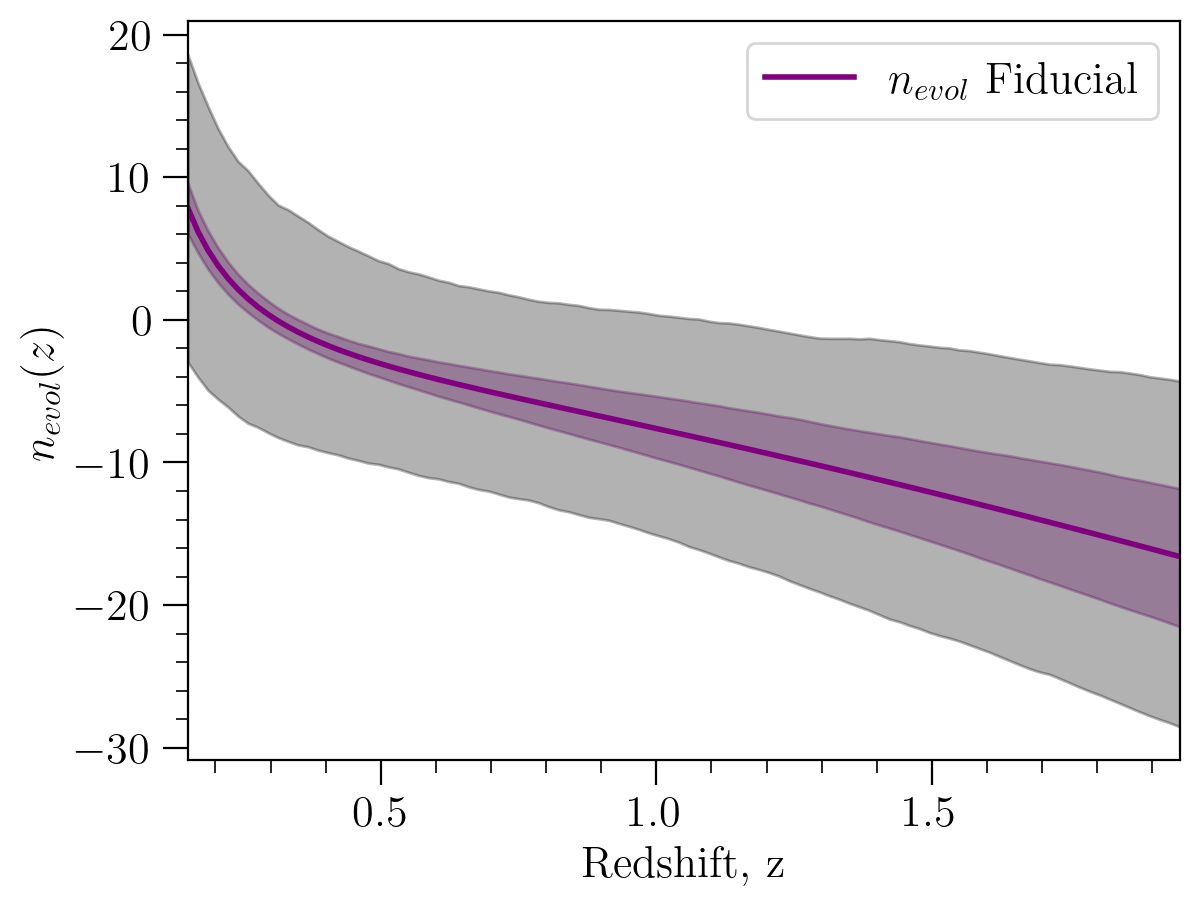

In [208]:
plt.plot(z_lin, num_evol_fid, '-', color='purple', label=r'$n_{evol}$'+' Fiducial', lw = 2.0)

# Shade the 68% confidence interval

plt.fill_between(z_lin, nevol_Joint_lower_bound, nevol_Joint_upper_bound, color='purple', alpha=0.3)
plt.fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3)


plt.xlim(0.15,1.95)

plt.xlabel(r'Redshift, z')
plt.ylabel(r'$n_{evol}(z)$')
plt.legend();

## Evolution bias

The evolution bias is computed from the magnification biases and the evolution of the number densities.

$$ f^{evol}_{B}(z) = -\frac{d\log{N_B(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_B(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) - \frac{5}{2}s_B(z)\,\frac{d\log{F_c}}{d\log{(1+z)}} $$

$$ f^{evol}_{F}(z) = -\frac{d\log{N_F(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_F(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) 
    - \frac{5}{2}\left[\frac{\bar{N}}{\bar{N}_F}\,s_{model}(z)\frac{d\log{F_*}}{d\log{(1+z)}}-\frac{\bar{N}_B}{\bar{N}_F}\,s_B(z)\frac{d\log{F_c}}{d\log{(1+z)}}\right] $$

We have all the ingredients defined as methods in the EvolutionBias class. We need to extract the relevant terms and then sample togeter the $n_{evol}$ and magnification bias parameters to construct the predictions for each evolution bias. 

In [147]:
from biasmodels import EvolutionBias

In [148]:
myEvolBias_50 = EvolutionBias(n_split=m_50)
myEvolBias_30 = EvolutionBias(n_split=m_30)


dlogH = myEvolBias_50.dlogH
rHterm = myEvolBias_50.rHterm
dFstar = myEvolBias_50.dLogFstar
dFcut = myEvolBias_50.dLogFcut

In [149]:
def fevol_bright(pars_s, pars_n, z):
    pars_sB = pars_s[:4] 
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*magbias_fit(params=pars_sB, x=z))*rHterm(z) - 5*magbias_fit(params=pars_sB, x=z) - 5/2*magbias_fit(params=pars_sB, x=z)*dFcut(z)
    
def fevol_faint(pars_s, pars_n, z):
    
    pars_sB = pars_s[:4]
    pars_sM = pars_s[4:]
    s_B = magbias_fit(params=pars_sB, x=z)
    s_M = magbias_fit(params=pars_sM, x=z)
    s_faint = s_M*m_split/(m_split-1) - s_B/(m_split-1)
    
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*s_faint)*rHterm(z) - 5*s_faint + 5/2*((1/(m_split-1)) * s_B *dFcut(z) - (m_split/(m_split-1)) * s_M *dFstar(z))

In [150]:
sbias_fid_50 = np.concatenate([sB_4fit50, sM_4fit])
sbias_fid_30 = np.concatenate([sB_4fit30, sM_4fit])

np.shape(sbias_fid_50), np.shape(sbias_fid_30)

((8,), (8,))

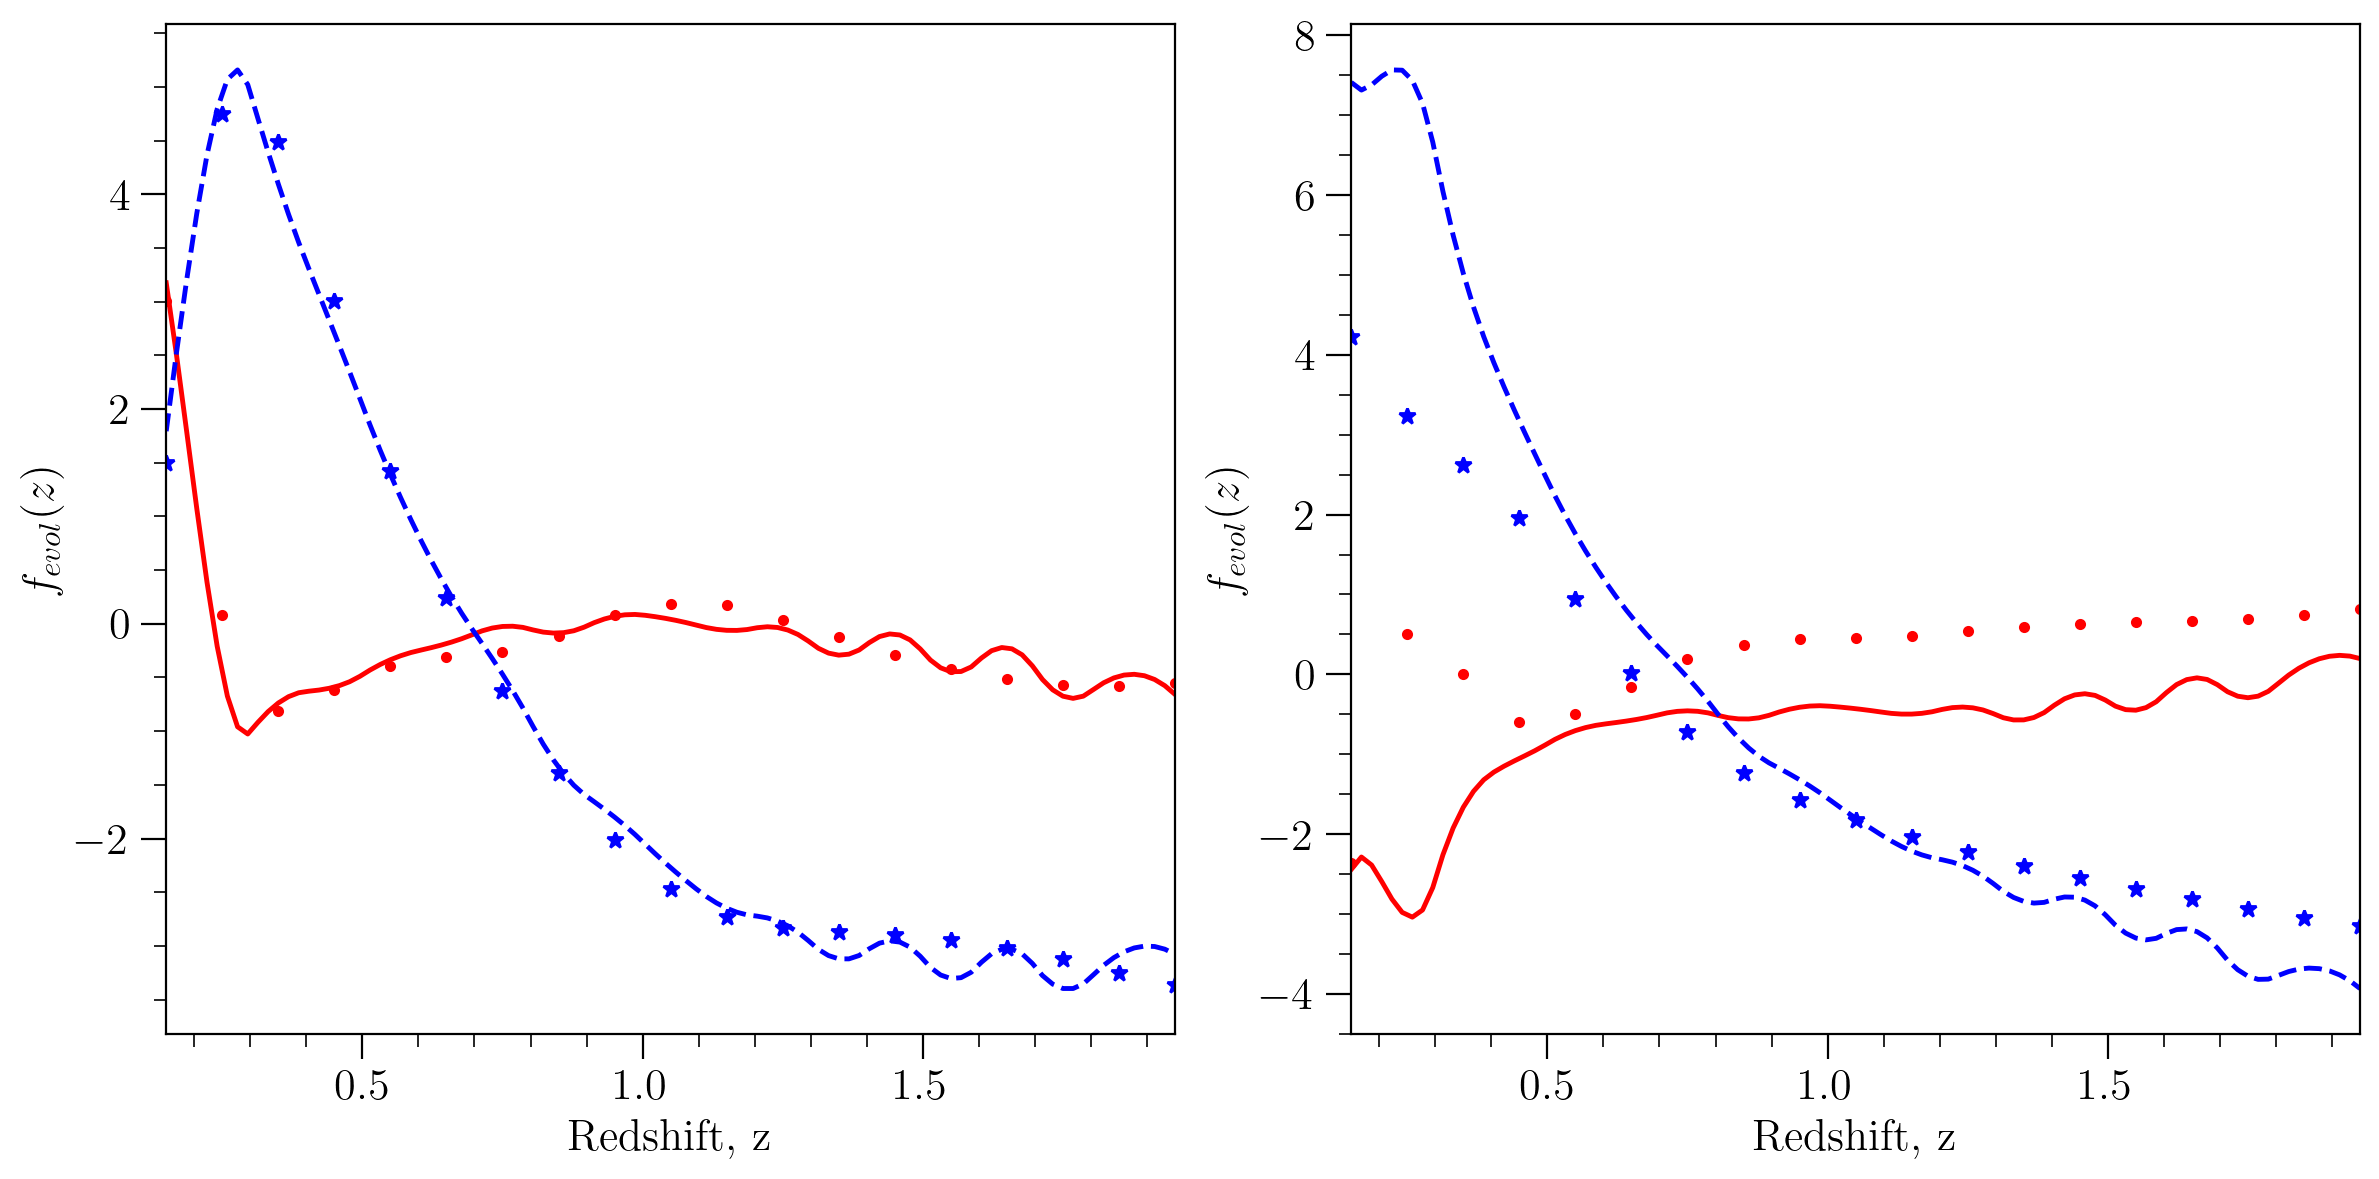

In [151]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

fevol_50_B_fid = fevol_bright(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)
fevol_50_F_fid = fevol_faint(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)

fevol_30_B_fid = fevol_bright(pars_s = sbias_fid_30, pars_n = num_fit, z = z_lin)
fevol_30_F_fid = fevol_faint(pars_s = sbias_fid_30, pars_n = num_fit, z = z_lin)

feB_50 = myEvolBias_50.fevol_bright(z_bins)
feF_50 = myEvolBias_50.fevol_faint(z_bins)

feB_30 = myEvolBias_30.fevol_bright(z_bins)
feF_30 = myEvolBias_30.fevol_faint(z_bins)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, 'r-')
ax[0].plot(z_lin, fevol_50_F_fid, 'b--')
ax[0].plot(z_bins, feB_50, 'r.', label='Bright')
ax[0].plot(z_bins, feF_50, 'b*', label='Faint')

ax[1].plot(z_lin, fevol_30_B_fid, 'r-')
ax[1].plot(z_lin, fevol_30_F_fid, 'b--')
ax[1].plot(z_bins, feB_30, 'r.', label='Bright')
ax[1].plot(z_bins, feF_30, 'b*', label='Faint')

for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlabel(r'Redshift, z');
    axi.set_ylabel(r'$f_{evol}(z)$');

In [152]:
list(range(4,8))

[4, 5, 6, 7]

In [153]:
# Select the marginalized covariance matrix for the parameters

cov_Joint_all = Sigma_Matrix_Joint50x30[:16, :16]
cov_all_priors = Cov_prior_all[:16, :16]

all_fid = np.concatenate([sbias_fid, num_fit])

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
all_Joint_pars_samples = np.random.multivariate_normal(all_fid, cov_Joint_all, num_samples)
all_pars_samples_priors = np.random.multivariate_normal(all_fid, cov_all_priors, num_samples)

nind_50 = list(range(4,8))

all_Joint_50_pars_samples = all_Joint_pars_samples
all_Joint_50_pars_samples = np.delete(all_Joint_50_pars_samples, nind_50, axis=1)
all_50_pars_samples_priors = all_pars_samples_priors
all_50_pars_samples_priors = np.delete(all_50_pars_samples_priors, nind_50, axis=1)

nind_30 = list(range(0,4))

all_Joint_30_pars_samples = all_Joint_pars_samples
all_Joint_30_pars_samples = np.delete(all_Joint_30_pars_samples, nind_30, axis=1)
all_30_pars_samples_priors = all_pars_samples_priors
all_30_pars_samples_priors = np.delete(all_30_pars_samples_priors, nind_30, axis=1)

In [154]:
# Evaluate fitting function for each parameter sample

fevol_Joint_50_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])
fevol_Joint_50_B_samples_priors = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors])
fevol_Joint_50_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_50_pars_samples])
fevol_Joint_50_F_samples_priors = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors])

fevol_Joint_30_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_30_pars_samples])
fevol_Joint_30_B_samples_priors = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_30_pars_samples_priors])
fevol_Joint_30_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_Joint_30_pars_samples])
fevol_Joint_30_F_samples_priors = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_30_pars_samples_priors])

# Calculate the 68% confidence intervals

fevol_B_50_lower_bound = np.percentile(fevol_Joint_50_B_samples, 16, axis=0)
fevol_B_50_upper_bound = np.percentile(fevol_Joint_50_B_samples, 84, axis=0)
fevol_B_50_lower_bound_priors = np.percentile(fevol_Joint_50_B_samples_priors, 16, axis=0)
fevol_B_50_upper_bound_priors = np.percentile(fevol_Joint_50_B_samples_priors, 84, axis=0)

fevol_F_50_lower_bound = np.percentile(fevol_Joint_50_F_samples, 16, axis=0)
fevol_F_50_upper_bound = np.percentile(fevol_Joint_50_F_samples, 84, axis=0)
fevol_F_50_lower_bound_priors = np.percentile(fevol_Joint_50_F_samples_priors, 16, axis=0)
fevol_F_50_upper_bound_priors = np.percentile(fevol_Joint_50_F_samples_priors, 84, axis=0)

fevol_B_30_lower_bound = np.percentile(fevol_Joint_30_B_samples, 16, axis=0)
fevol_B_30_upper_bound = np.percentile(fevol_Joint_30_B_samples, 84, axis=0)
fevol_B_30_lower_bound_priors = np.percentile(fevol_Joint_30_B_samples_priors, 16, axis=0)
fevol_B_30_upper_bound_priors = np.percentile(fevol_Joint_30_B_samples_priors, 84, axis=0)

fevol_F_30_lower_bound = np.percentile(fevol_Joint_30_F_samples, 16, axis=0)
fevol_F_30_upper_bound = np.percentile(fevol_Joint_30_F_samples, 84, axis=0)
fevol_F_30_lower_bound_priors = np.percentile(fevol_Joint_30_F_samples_priors, 16, axis=0)
fevol_F_30_upper_bound_priors = np.percentile(fevol_Joint_30_F_samples_priors, 84, axis=0)

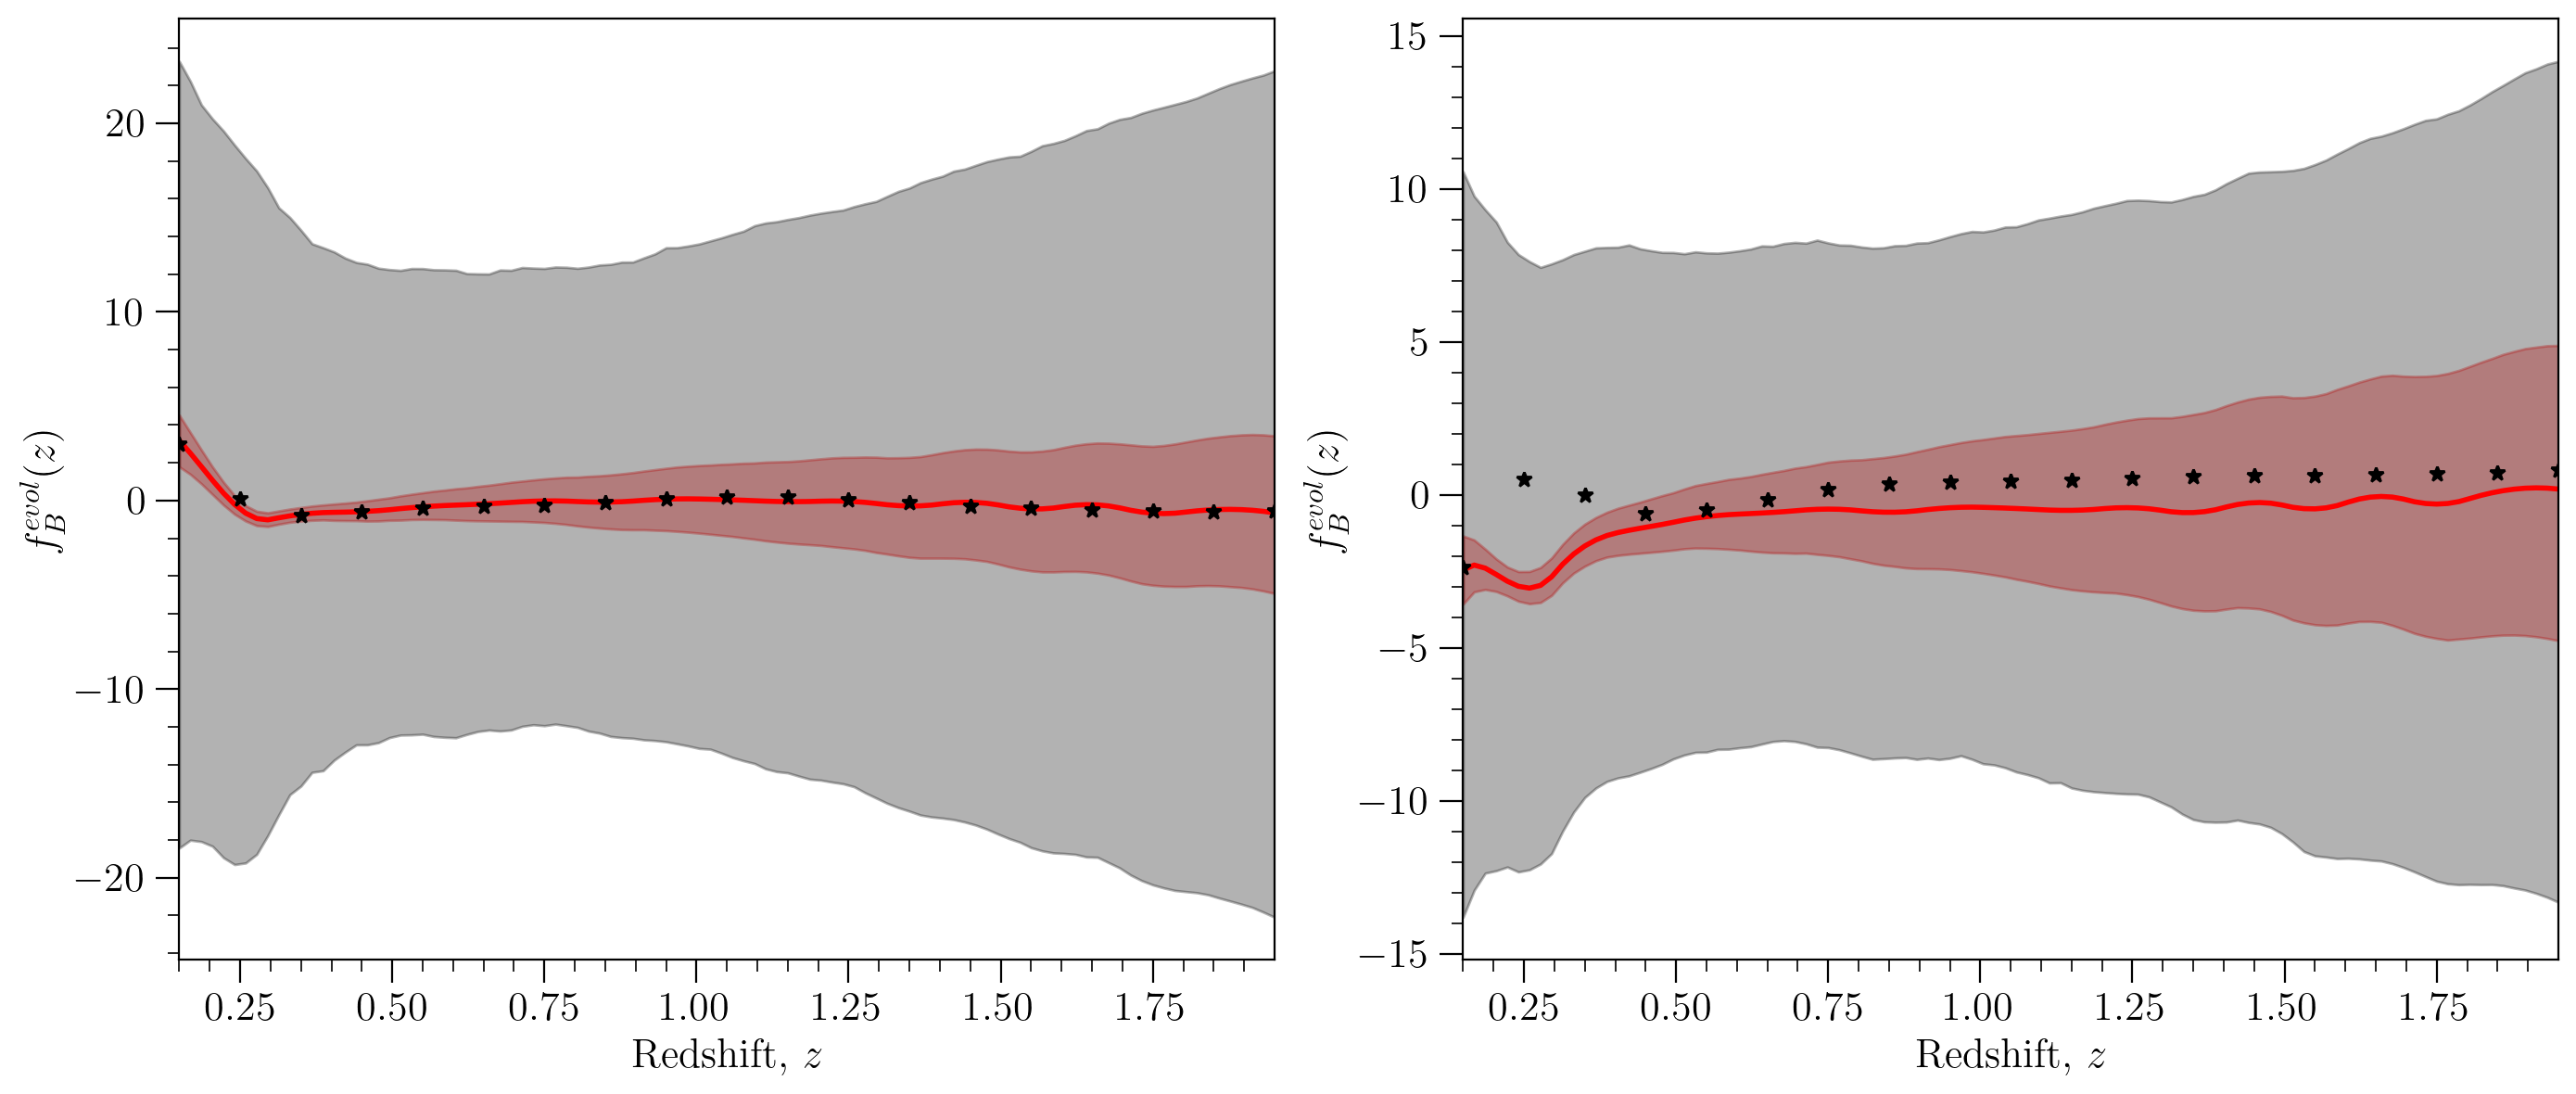

In [155]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, '-', color='red', lw = 2.0)
ax[0].plot(z_bins, feB_50, '*', color='black')
ax[1].plot(z_lin, fevol_30_B_fid, '-', color='red', lw = 2.0)
ax[1].plot(z_bins, feB_30, '*', color='black')

# Shade the 68% confidence interval

ax[0].fill_between(z_lin, fevol_B_50_lower_bound, fevol_B_50_upper_bound, color='red', alpha=0.3)
ax[0].fill_between(z_lin, fevol_B_50_lower_bound_priors, fevol_B_50_upper_bound_priors, color='black', alpha=0.3)

ax[1].fill_between(z_lin, fevol_B_30_lower_bound, fevol_B_30_upper_bound, color='red', alpha=0.3)
ax[1].fill_between(z_lin, fevol_B_30_lower_bound_priors, fevol_B_30_upper_bound_priors, color='black', alpha=0.3)

for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_B(z)$')

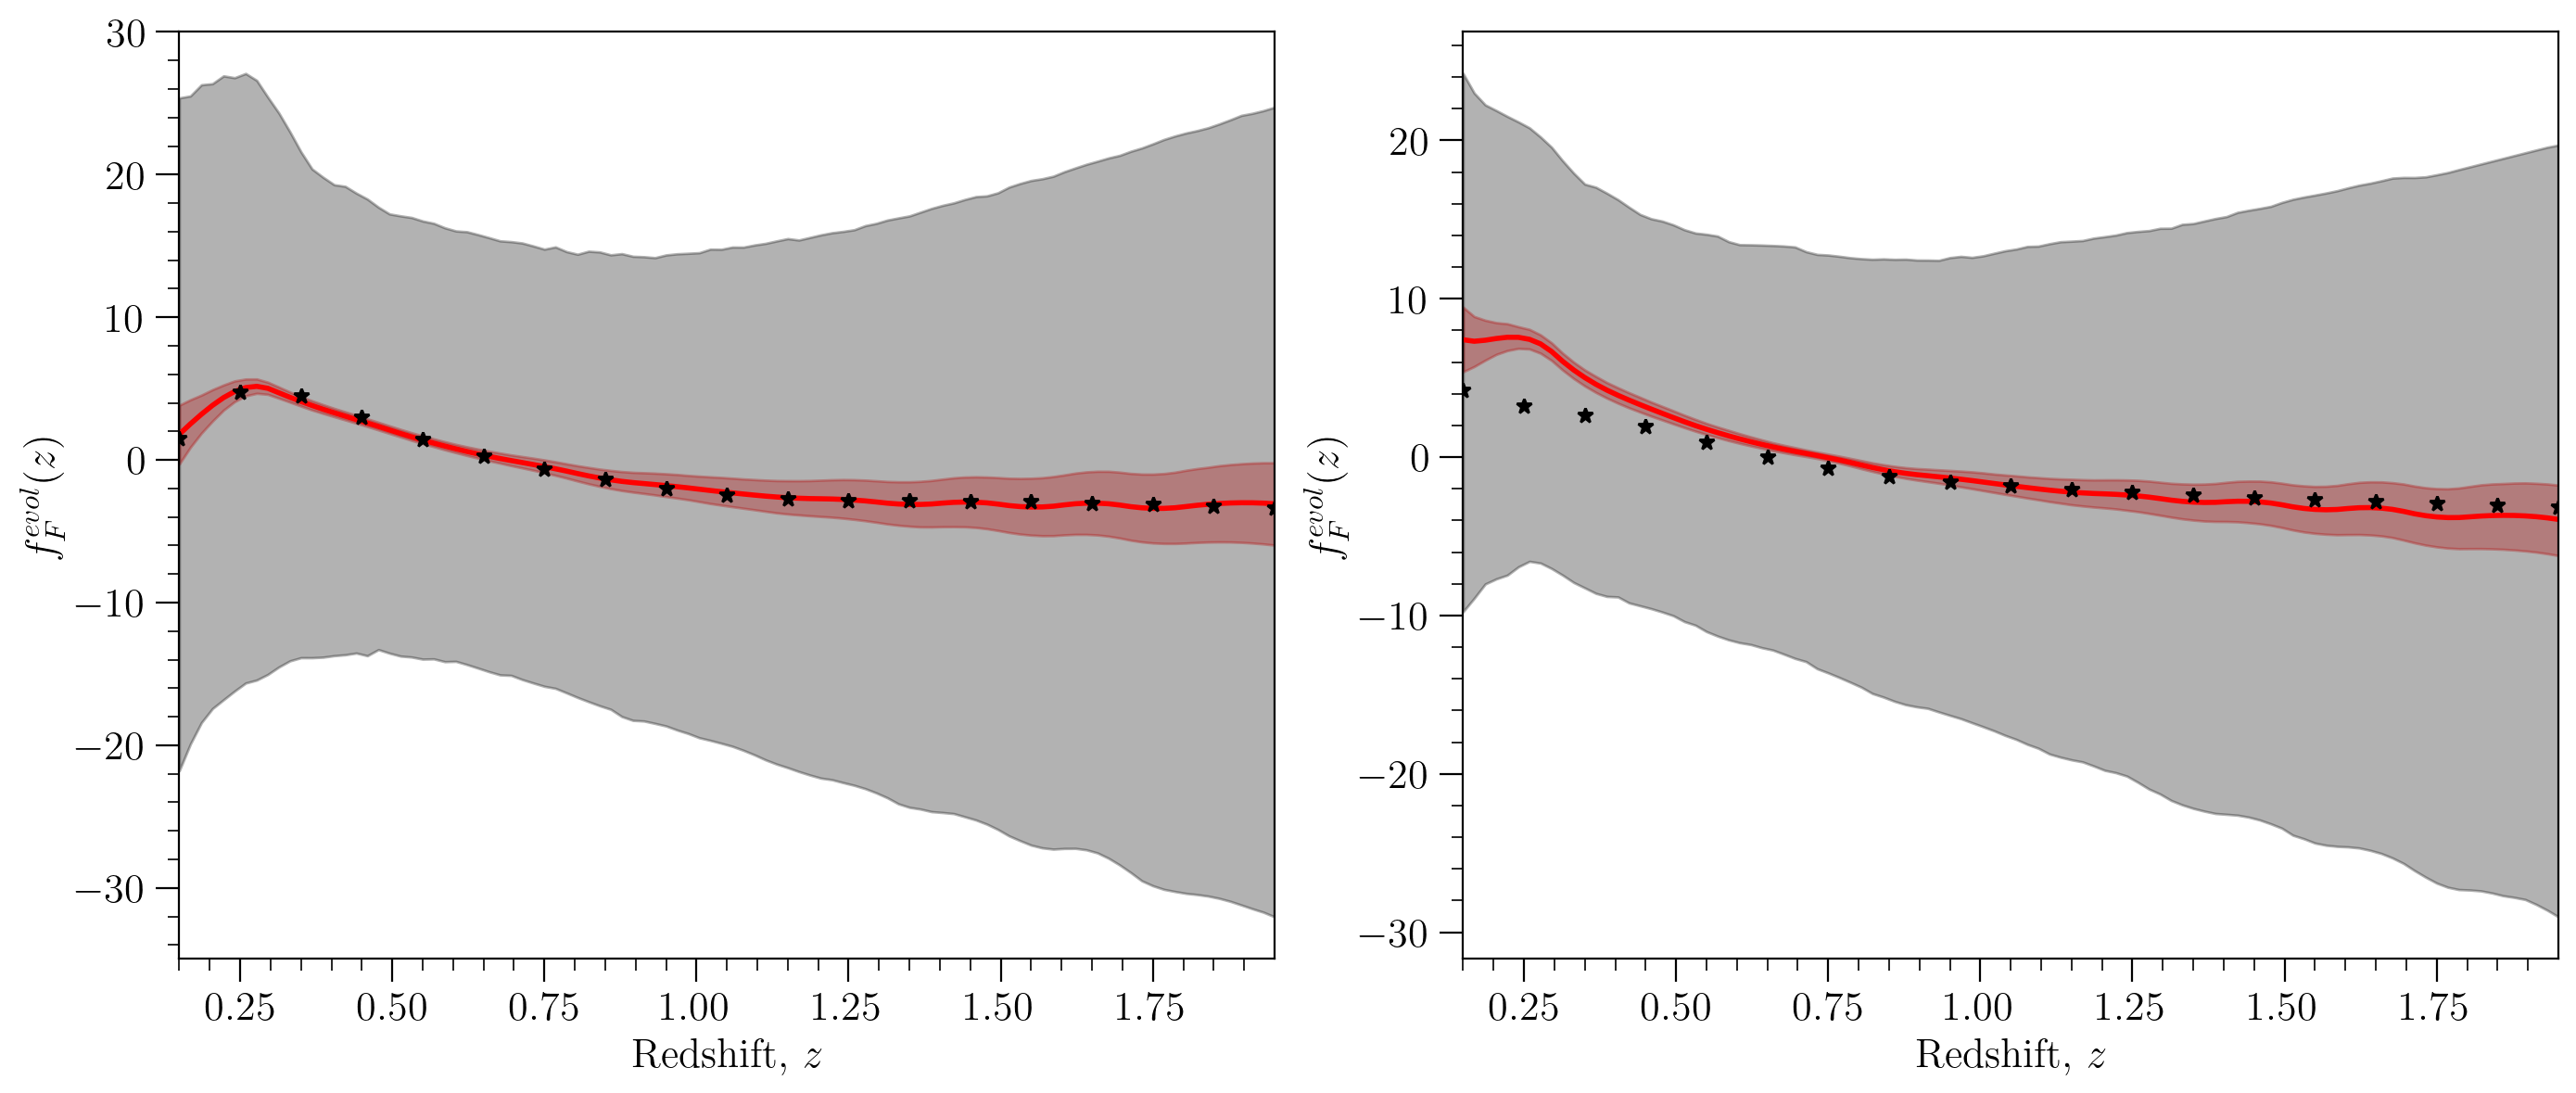

In [156]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_F_fid, '-', color='red', lw = 2.0)
ax[0].plot(z_bins, feF_50, '*', color='black')
ax[1].plot(z_lin, fevol_30_F_fid, '-', color='red', lw = 2.0)
ax[1].plot(z_bins, feF_30, '*', color='black')

# Shade the 68% confidence interval

ax[0].fill_between(z_lin, fevol_F_50_lower_bound, fevol_F_50_upper_bound, color='red', alpha=0.3)
ax[0].fill_between(z_lin, fevol_F_50_lower_bound_priors, fevol_F_50_upper_bound_priors, color='black', alpha=0.3)

ax[1].fill_between(z_lin, fevol_F_30_lower_bound, fevol_F_30_upper_bound, color='red', alpha=0.3)
ax[1].fill_between(z_lin, fevol_F_30_lower_bound_priors, fevol_F_30_upper_bound_priors, color='black', alpha=0.3)

for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_F(z)$')

# Comparison with Individual Splits

## Magnification bias

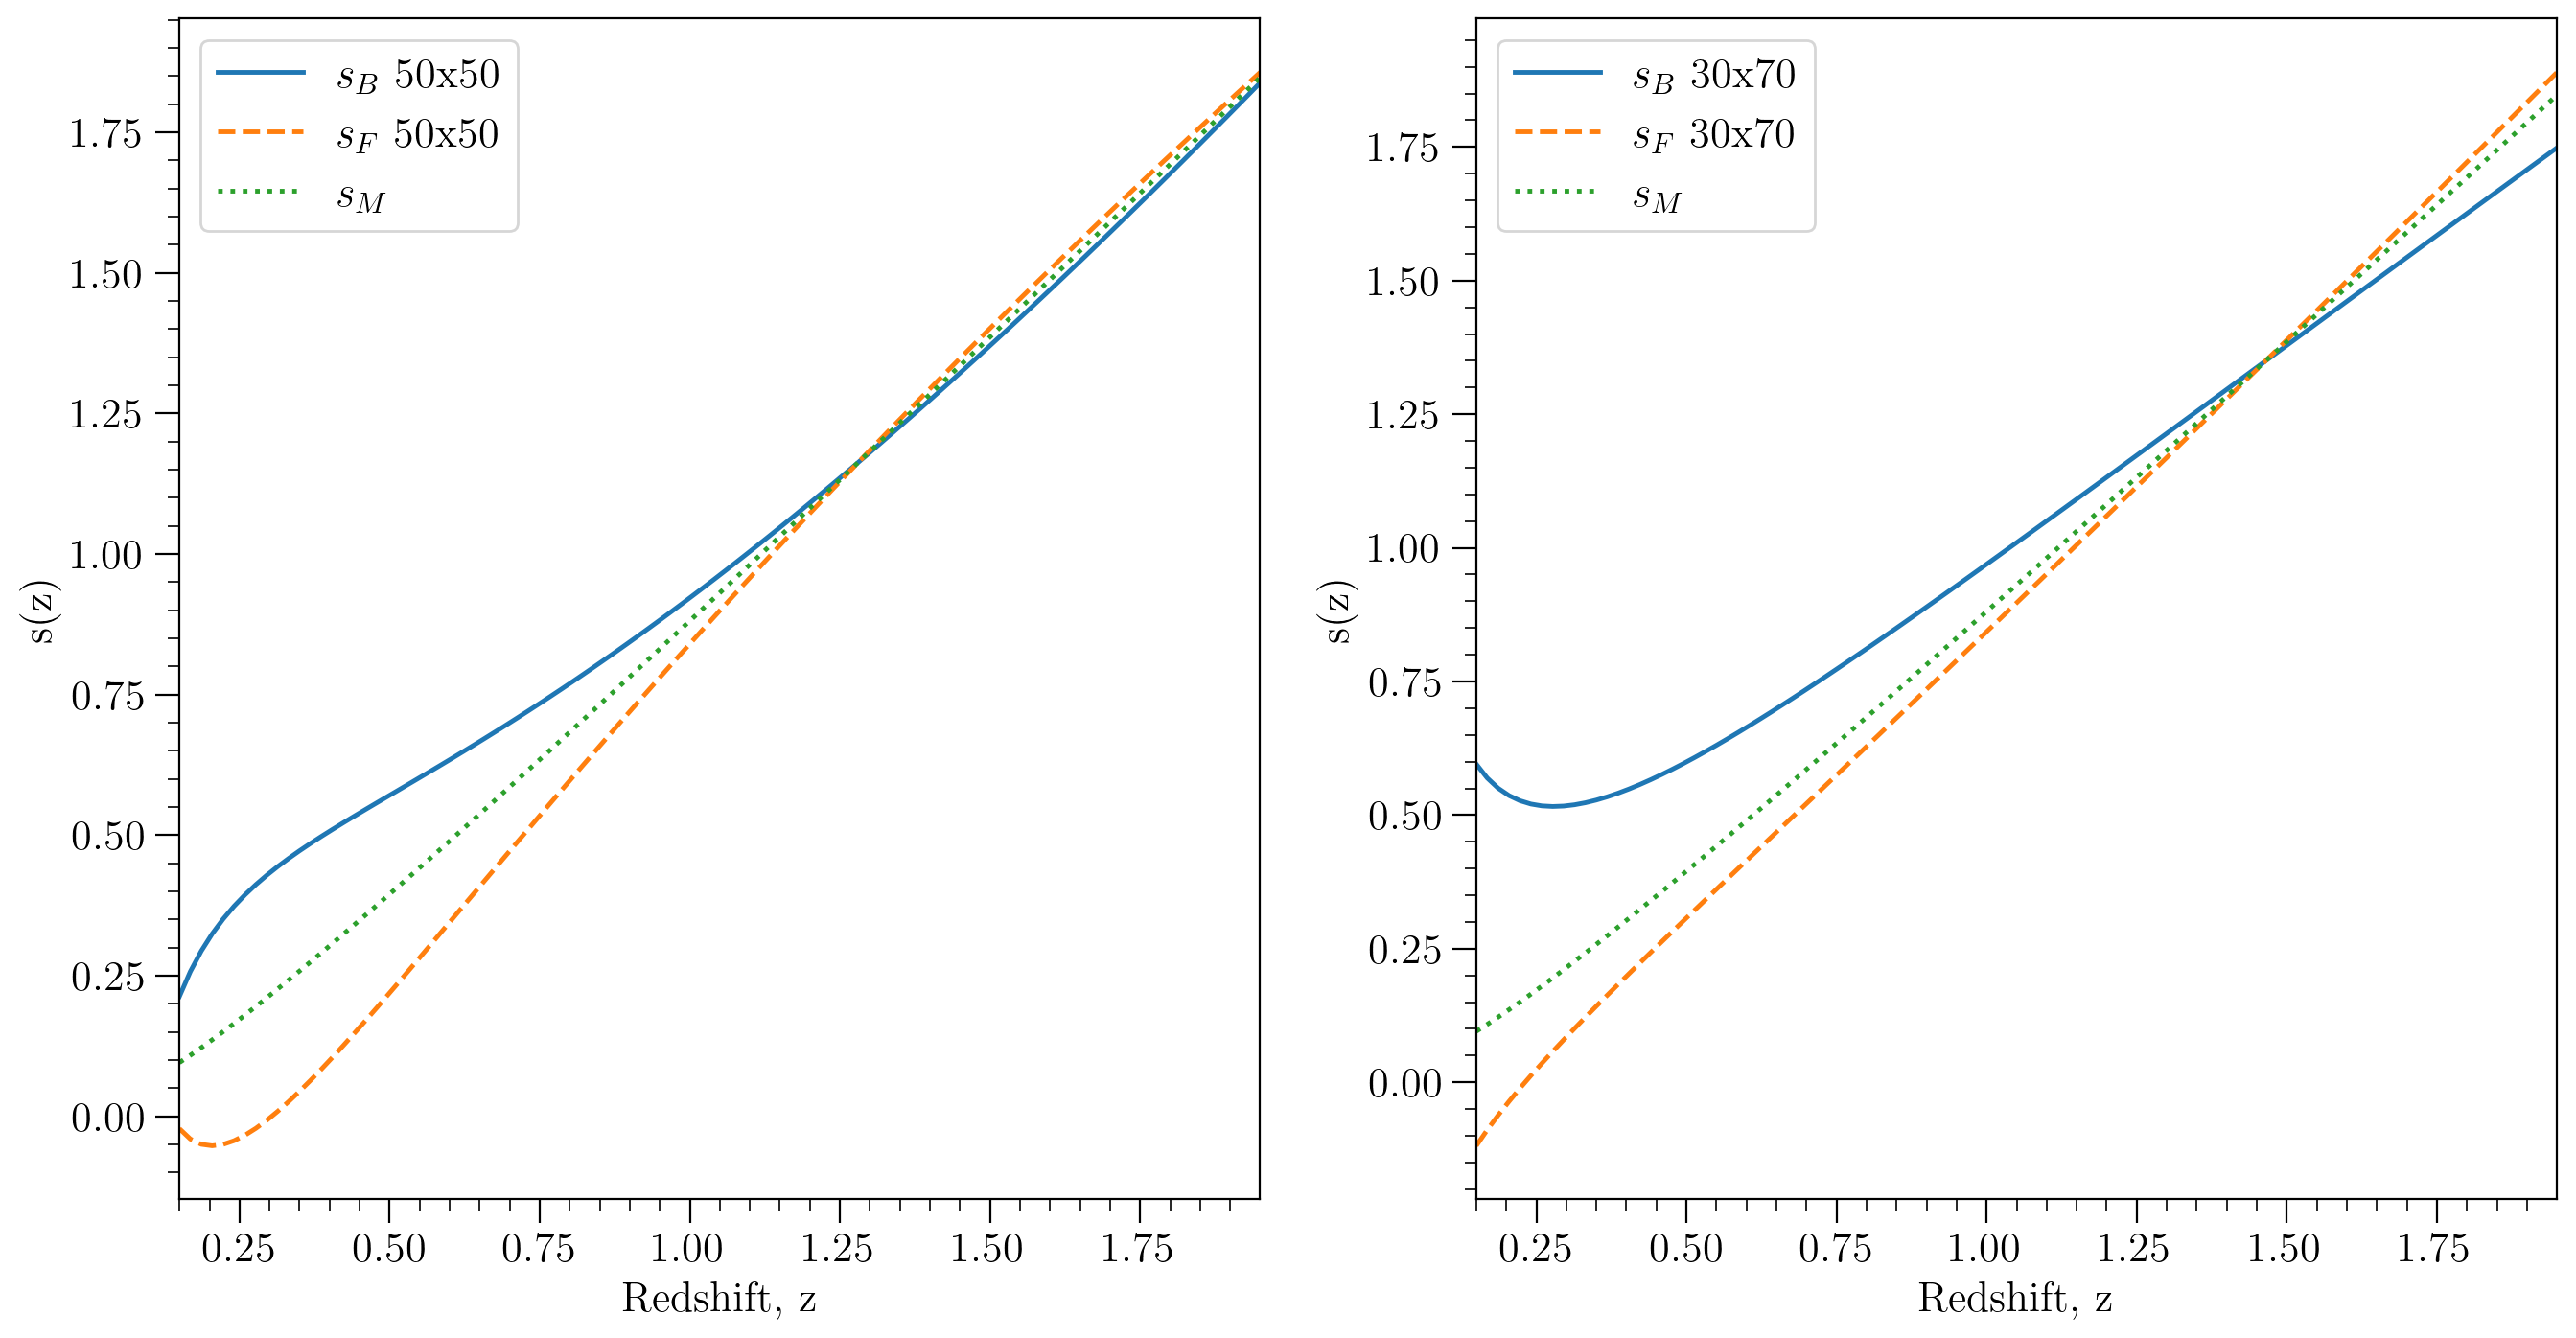

In [157]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

m_50 = 2.
m_30 = 10/3.

sB_fid_50 = magbias_fit(sB_fit[:4], z_lin)
sB_fid_30 = magbias_fit(sB_fit[4:], z_lin)
sM_fid = magbias_fit(sM_4fit, z_lin)
sF_fid_50 = sM_fid * (m_50/(m_50-1)) - sB_fid_50/(m_50-1)
sF_fid_30 = sM_fid * (m_30/(m_30-1)) - sB_fid_30/(m_30-1)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, sB_fid_50, '-', label=r'$s_B$ 50x50')
ax[0].plot(z_lin, sF_fid_50, '--', label=r'$s_F$ 50x50')
ax[0].plot(z_lin, sM_fid, ':', label=r'$s_M$')

ax[1].plot(z_lin, sB_fid_30, '-', label=r'$s_B$ 30x70')
ax[1].plot(z_lin, sF_fid_30, '--', label=r'$s_F$ 30x70')
ax[1].plot(z_lin, sM_fid, ':', label=r'$s_M$')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, z')
    axi.set_ylabel(r's(z)')
    axi.legend();


### Observables: $s_B(z)$ and $s_M(z)$

In [158]:
# Compute priors 

# Select the marginalized covariance matrix for the magnification biases priors

cov_sB_50_priors = Cov_prior_all[:4, :4]
cov_sB_30_priors = Cov_prior_all[4:8, 4:8]
cov_sM_priors = Cov_prior_all[8:12, 8:12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sB_50_pars_samples_priors = np.random.multivariate_normal(sB_4fit50, cov_sB_50_priors, num_samples)
sB_30_pars_samples_priors = np.random.multivariate_normal(sB_4fit30, cov_sB_30_priors, num_samples)
sM_pars_samples_priors = np.random.multivariate_normal(sM_4fit, cov_sM_priors, num_samples)

# Evaluate fitting function for each parameter sample

sB_50_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples_priors])
sB_30_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sB_30_pars_samples_priors])

sM_samples_priors = np.array([magbias_fit(pars, z_lin) for pars in sM_pars_samples_priors])

# Calculate the 68% confidence interval

sB_50_lower_bound_priors = np.percentile(sB_50_samples_priors, 16, axis=0)
sB_50_upper_bound_priors = np.percentile(sB_50_samples_priors, 84, axis=0)

sB_30_lower_bound_priors = np.percentile(sB_30_samples_priors, 16, axis=0)
sB_30_upper_bound_priors = np.percentile(sB_30_samples_priors, 84, axis=0)

sM_lower_bound_priors = np.percentile(sM_samples_priors, 16, axis=0)
sM_upper_bound_priors = np.percentile(sM_samples_priors, 84, axis=0)


In [159]:
np.shape(Sigma_Matrix_30)

(21, 21)

In [160]:
# Select the marginalized covariance matrix for the magnification biases

cov_sB_50 = Sigma_Matrix_50[:4, :4]
cov_sB_30 = Sigma_Matrix_30[:4, :4]
cov_sM_50 = Sigma_Matrix_50[4:8, 4:8]
cov_sM_30 = Sigma_Matrix_30[4:8, 4:8]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sB_50_pars_samples = np.random.multivariate_normal(sB_4fit50, cov_sB_50, num_samples)
sB_30_pars_samples = np.random.multivariate_normal(sB_4fit30, cov_sB_30, num_samples)
sM_50_pars_samples = np.random.multivariate_normal(sM_4fit, cov_sM_50, num_samples)
sM_30_pars_samples = np.random.multivariate_normal(sM_4fit, cov_sM_30, num_samples)

# Evaluate fitting function for each parameter sample
sB_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_50_pars_samples])
sB_30_samples = np.array([magbias_fit(pars, z_lin) for pars in sB_30_pars_samples])
sM_50_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_50_pars_samples])
sM_30_samples = np.array([magbias_fit(pars, z_lin) for pars in sM_30_pars_samples])

# Calculate the 68% confidence interval
sB_50_lower_bound = np.percentile(sB_50_samples, 16, axis=0)
sB_50_upper_bound = np.percentile(sB_50_samples, 84, axis=0)

sB_30_lower_bound = np.percentile(sB_30_samples, 16, axis=0)
sB_30_upper_bound = np.percentile(sB_30_samples, 84, axis=0)

sM_50_lower_bound = np.percentile(sM_50_samples, 16, axis=0)
sM_50_upper_bound = np.percentile(sM_50_samples, 84, axis=0)
sM_30_lower_bound = np.percentile(sM_30_samples, 16, axis=0)
sM_30_upper_bound = np.percentile(sM_30_samples, 84, axis=0)

Predictions for $s_B(z)$ vs Priors

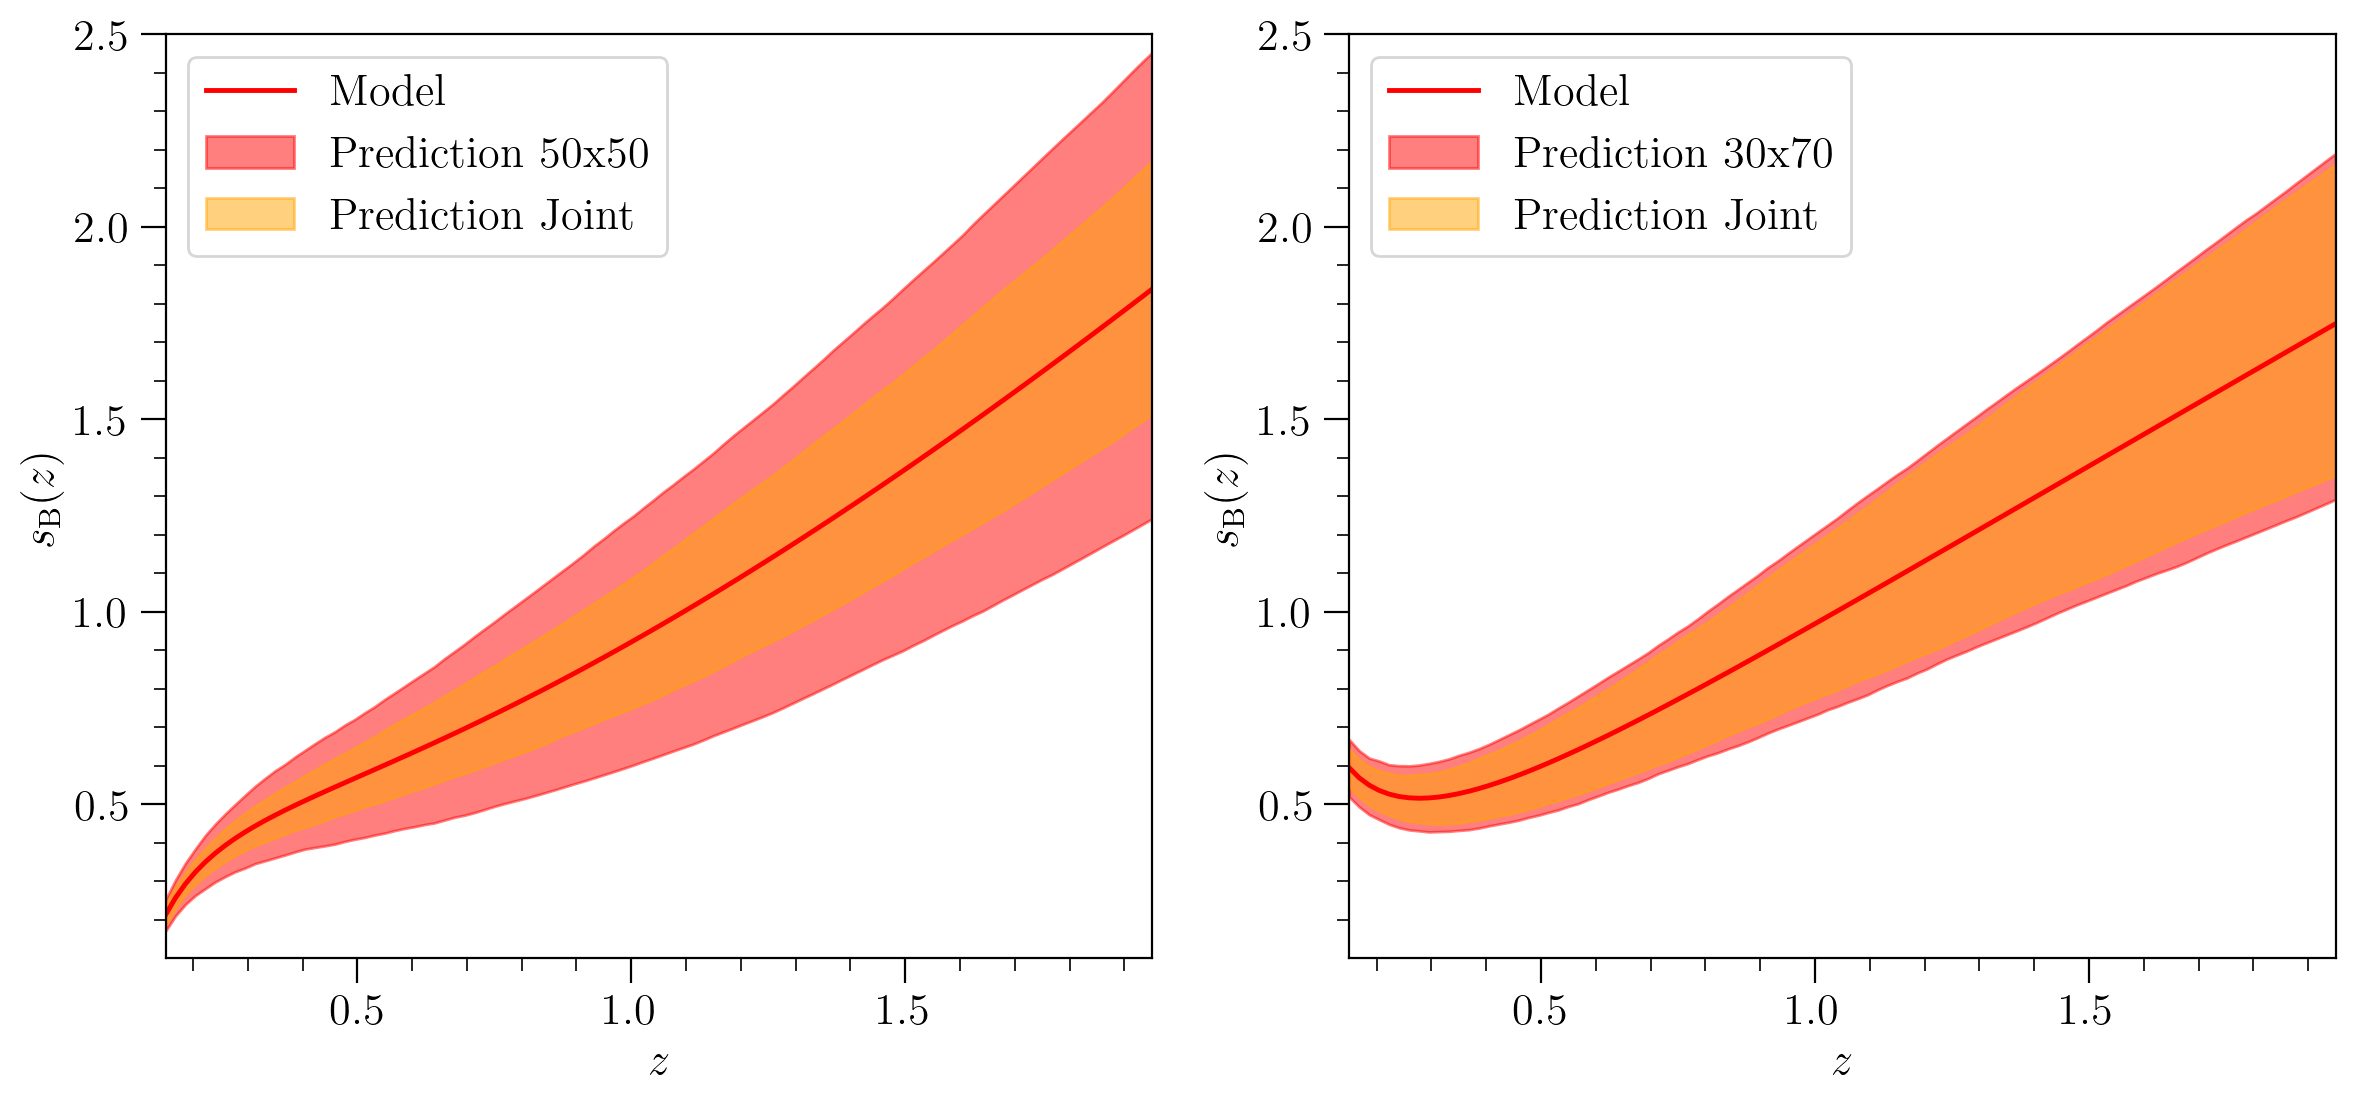

In [161]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sB_fid_50, 'r-', label = r'Model')
#ax[0].fill_between(z_lin, sB_50_lower_bound_priors, sB_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sB_50_lower_bound, sB_50_upper_bound, color='red', alpha=0.5, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, sB_Joint_50_lower_bound, sB_Joint_50_upper_bound, color='orange', alpha=0.5, label = 'Prediction Joint')
ax[0].legend(loc='upper left')

ax[1].plot(z_lin, sB_fid_30, 'r-', label = r'Model')
#ax[1].fill_between(z_lin, sB_30_lower_bound_priors, sB_30_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, sB_30_lower_bound, sB_30_upper_bound, color='red', alpha=0.5, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, sB_Joint_30_lower_bound, sB_Joint_30_upper_bound, color='orange', alpha=0.5, label = 'Prediction Joint')
ax[1].legend(loc='upper left')

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(0.1, 2.5)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$s_\mathrm{B}(z)$')
    
plt.savefig("plots/sB_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

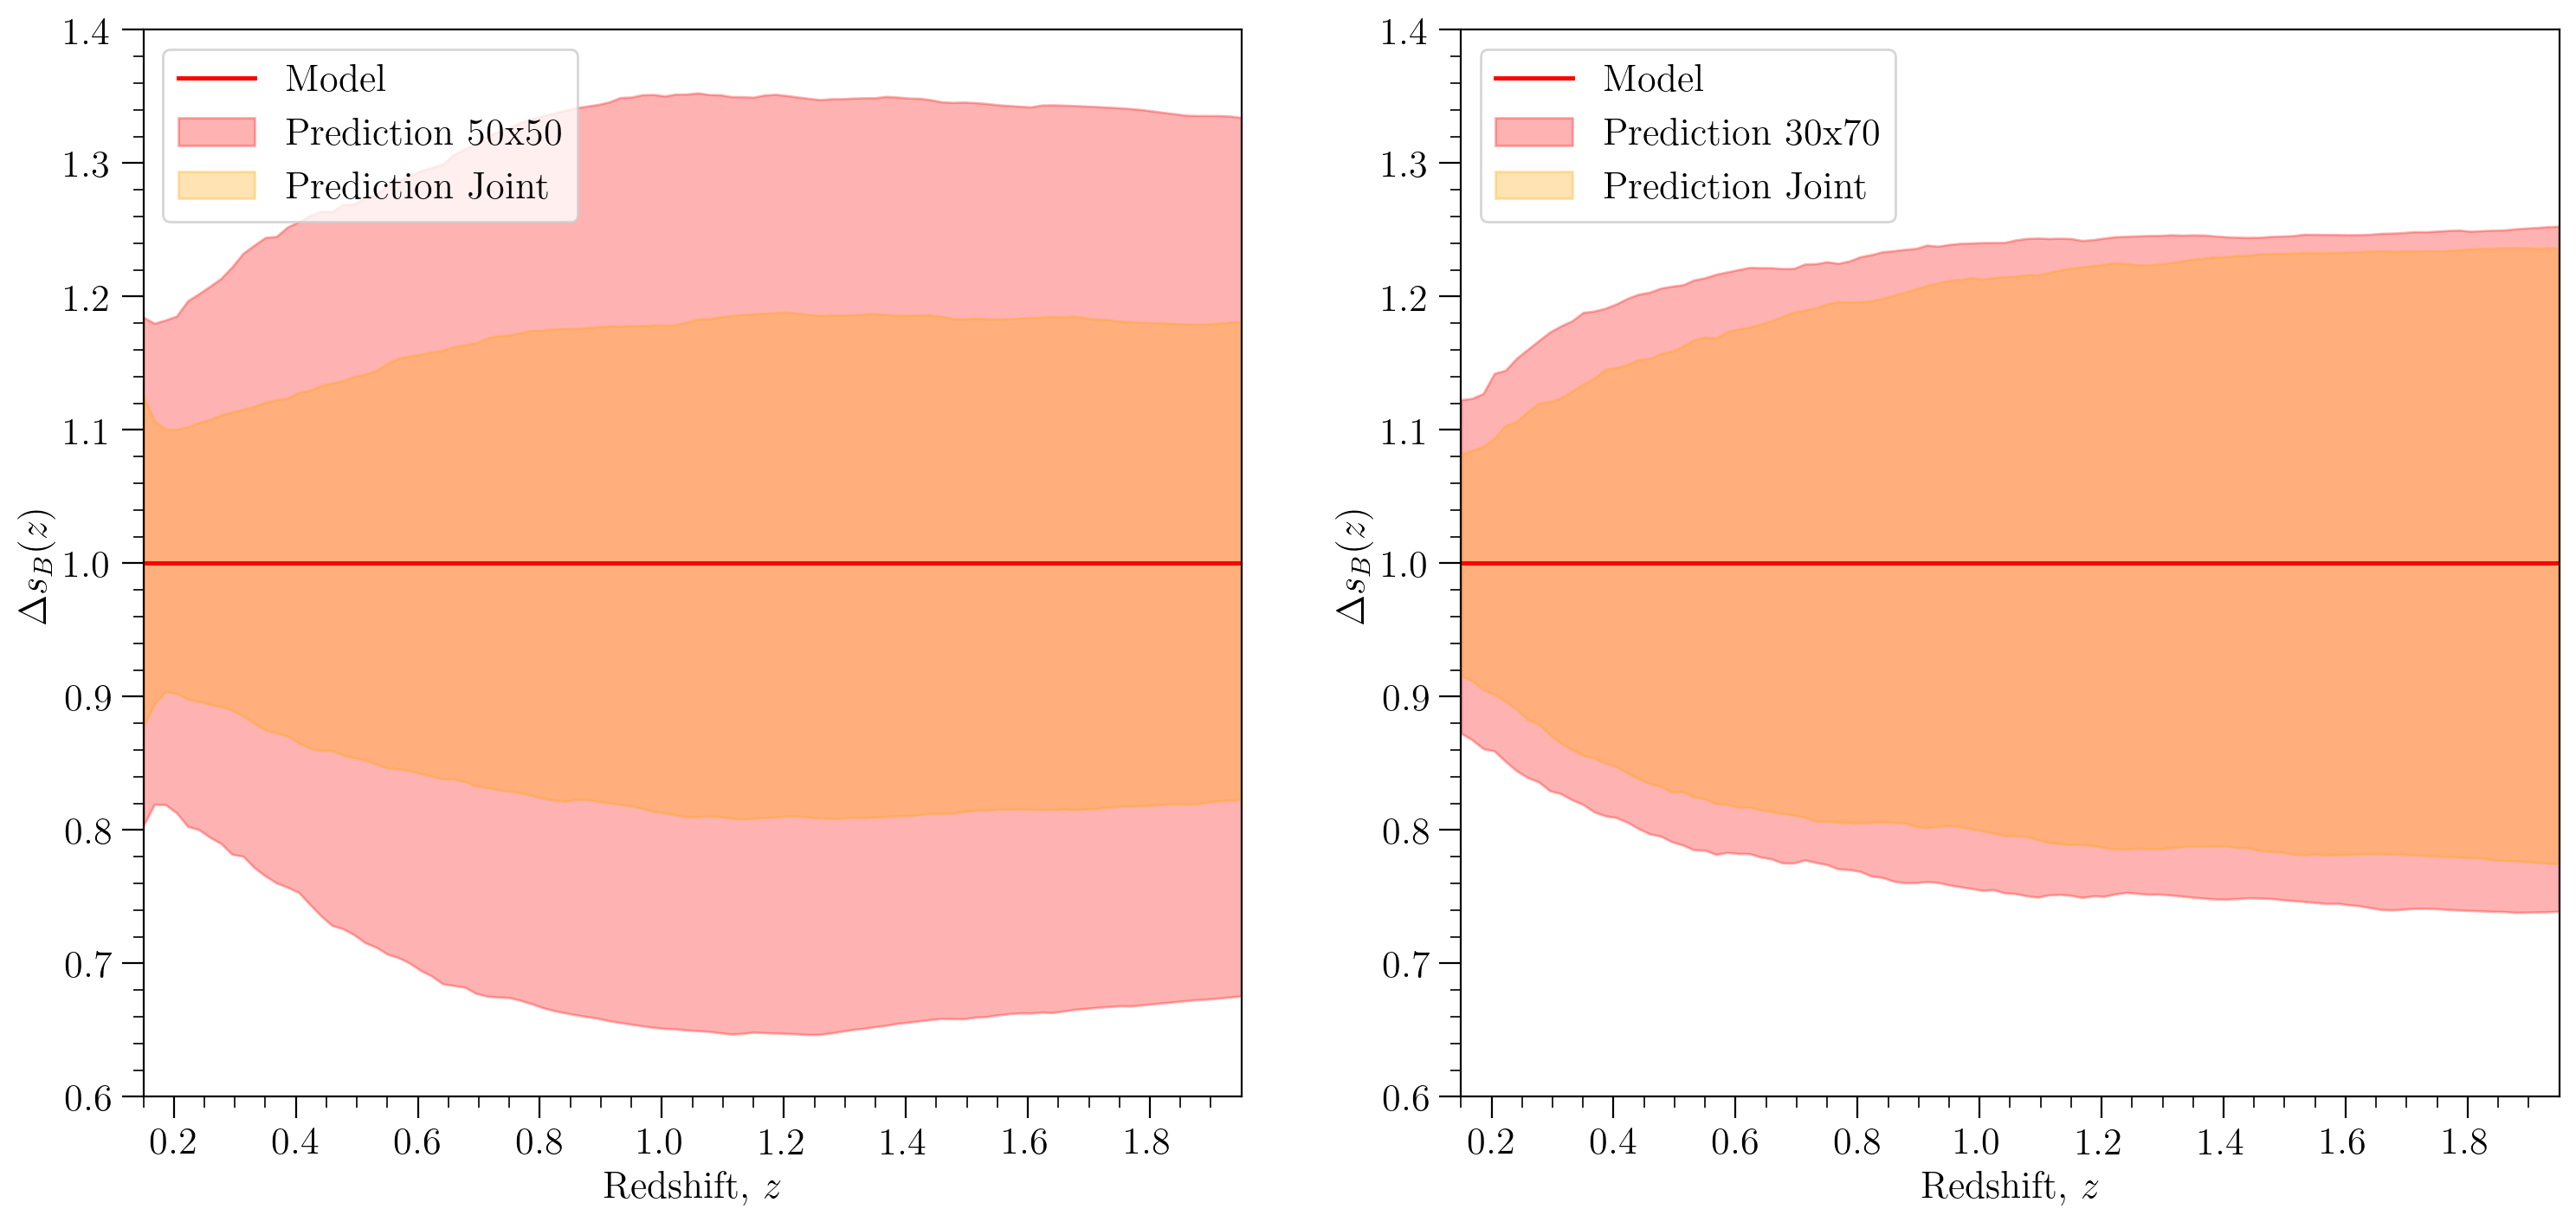

In [162]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (18,8))

ax[0].plot(z_lin, sB_fid_50/sB_fid_50, 'r-', label = r'Model')
#ax[0].fill_between(z_lin, sB_50_lower_bound_priors/sB_fid_50, sB_50_upper_bound_priors/sB_fid_50, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sB_50_lower_bound/sB_fid_50, sB_50_upper_bound/sB_fid_50, color='red', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, sB_Joint_50_lower_bound/sB_fid_50, sB_Joint_50_upper_bound/sB_fid_50, color='orange', alpha=0.3, label = 'Prediction Joint')
ax[0].legend(loc='upper left')

ax[1].plot(z_lin, sB_fid_30/sB_fid_30, 'r-', label = r'Model')
#ax[1].fill_between(z_lin, sB_30_lower_bound_priors/sB_fid_30, sB_30_upper_bound_priors/sB_fid_30, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, sB_30_lower_bound/sB_fid_30, sB_30_upper_bound/sB_fid_30, color='red', alpha=0.3, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, sB_Joint_30_lower_bound/sB_fid_30, sB_Joint_30_upper_bound/sB_fid_30, color='orange', alpha=0.3, label = 'Prediction Joint')
ax[1].legend(loc='upper left')

for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(0.6, 1.4)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$\Delta s_B(z)$')

Predictions for $s_M(z)$ vs Priors

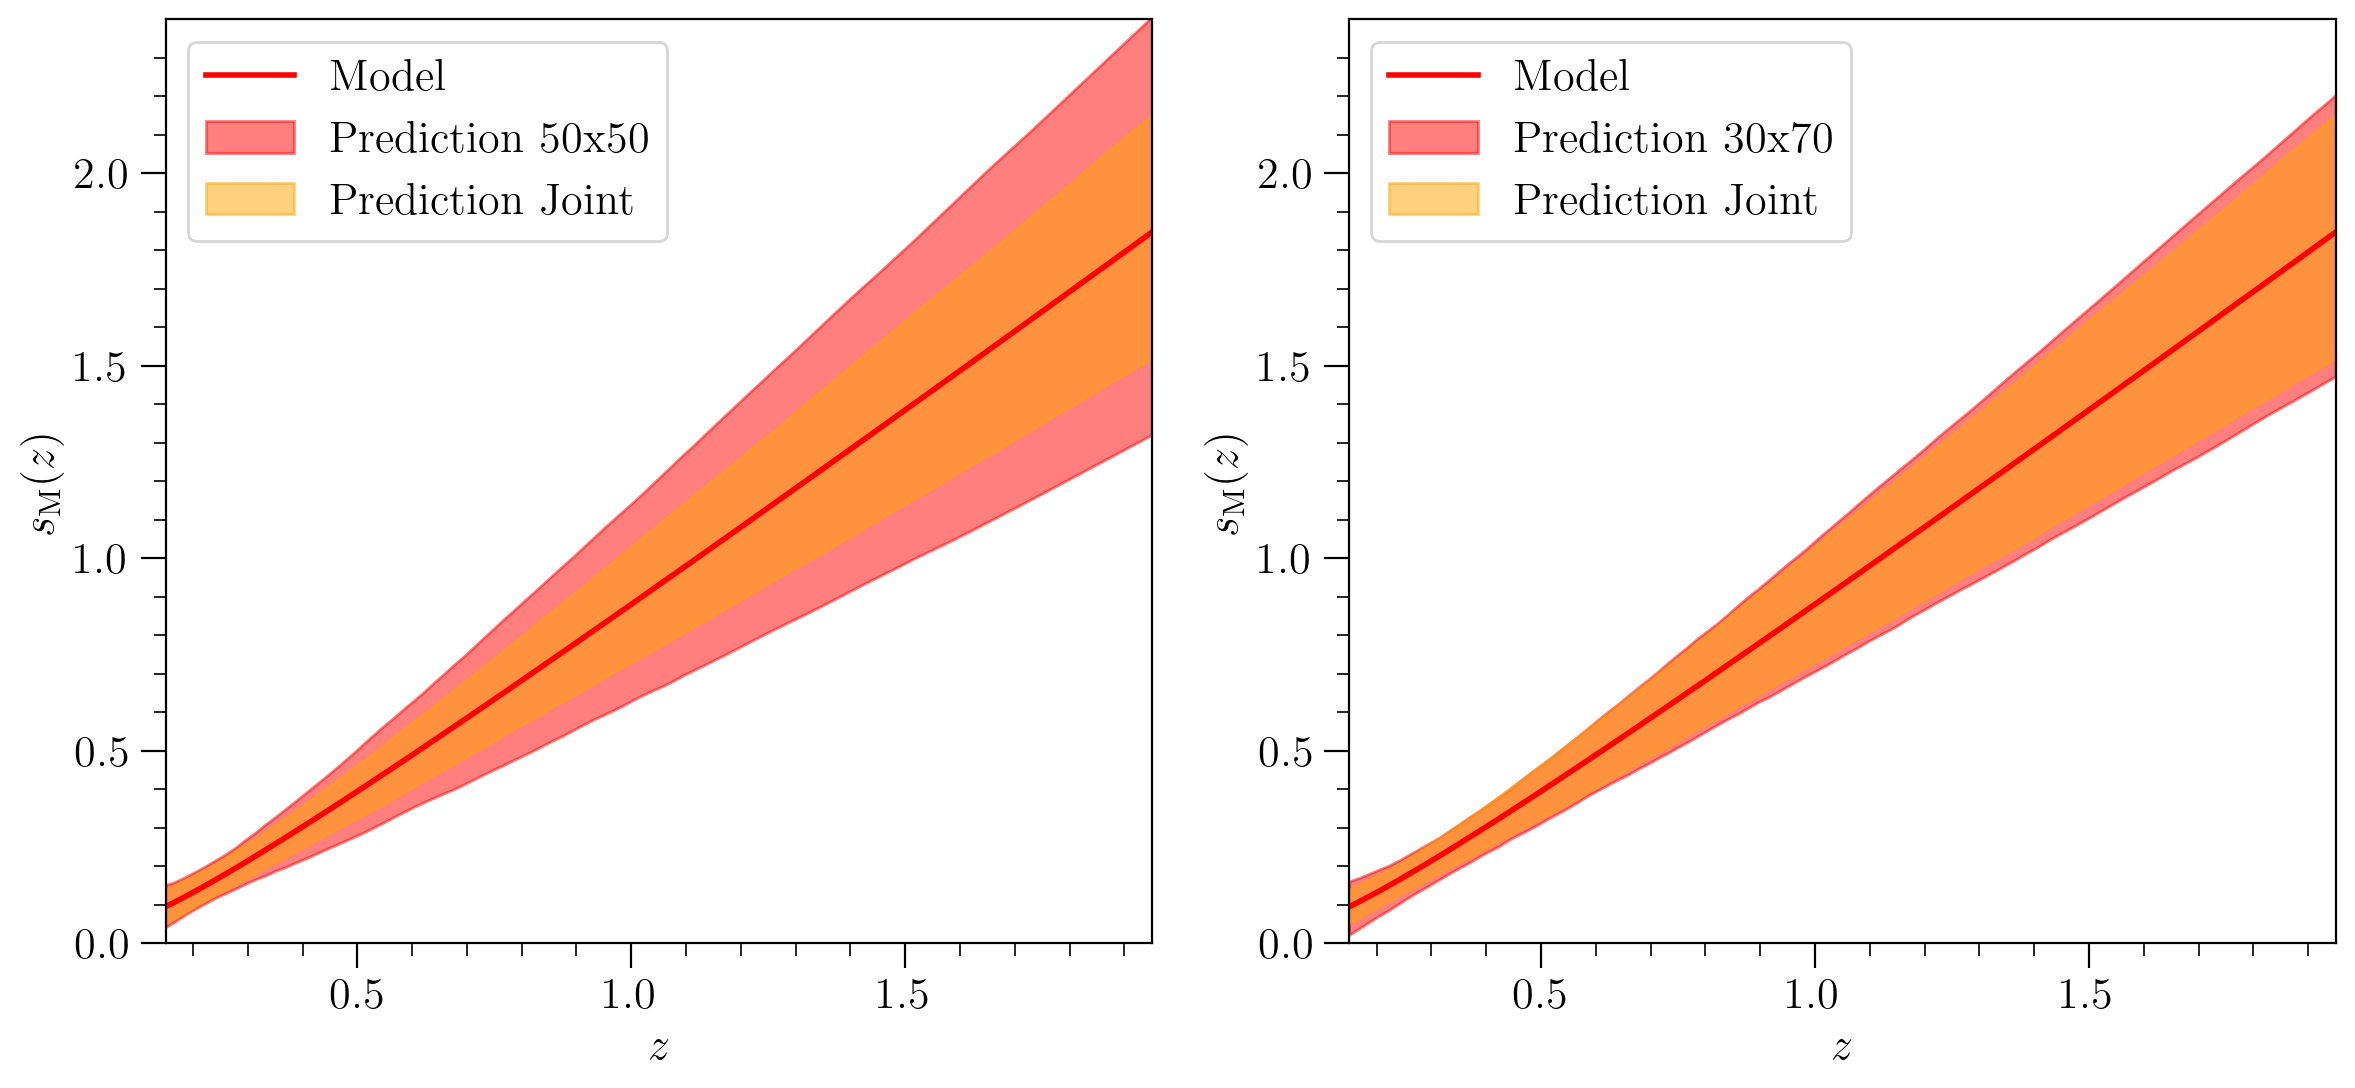

In [163]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

for axi in ax:
    axi.plot(z_lin, sM_fid, '-', lw = 2.0, color='red', label = 'Model')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
ax[0].fill_between(z_lin, sM_50_lower_bound, sM_50_upper_bound, color='red', alpha=0.5, label = r'Prediction 50x50')
ax[0].fill_between(z_lin, sM_Joint_lower_bound, sM_Joint_upper_bound, color='orange', alpha=0.5, label = r'Prediction Joint')

#ax[1].fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
ax[1].fill_between(z_lin, sM_30_lower_bound, sM_30_upper_bound, color='red', alpha=0.5, label = r'Prediction 30x70')
ax[1].fill_between(z_lin, sM_Joint_lower_bound, sM_Joint_upper_bound, color='orange', alpha=0.5, label = r'Prediction Joint')
    
for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_ylim(0., 2.4)
    axi.set_xlabel(r'$z$');
    axi.set_ylabel(r'$s_\mathrm{M}(z)$');
    axi.legend(loc='upper left');
    
plt.savefig("plots/sM_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')


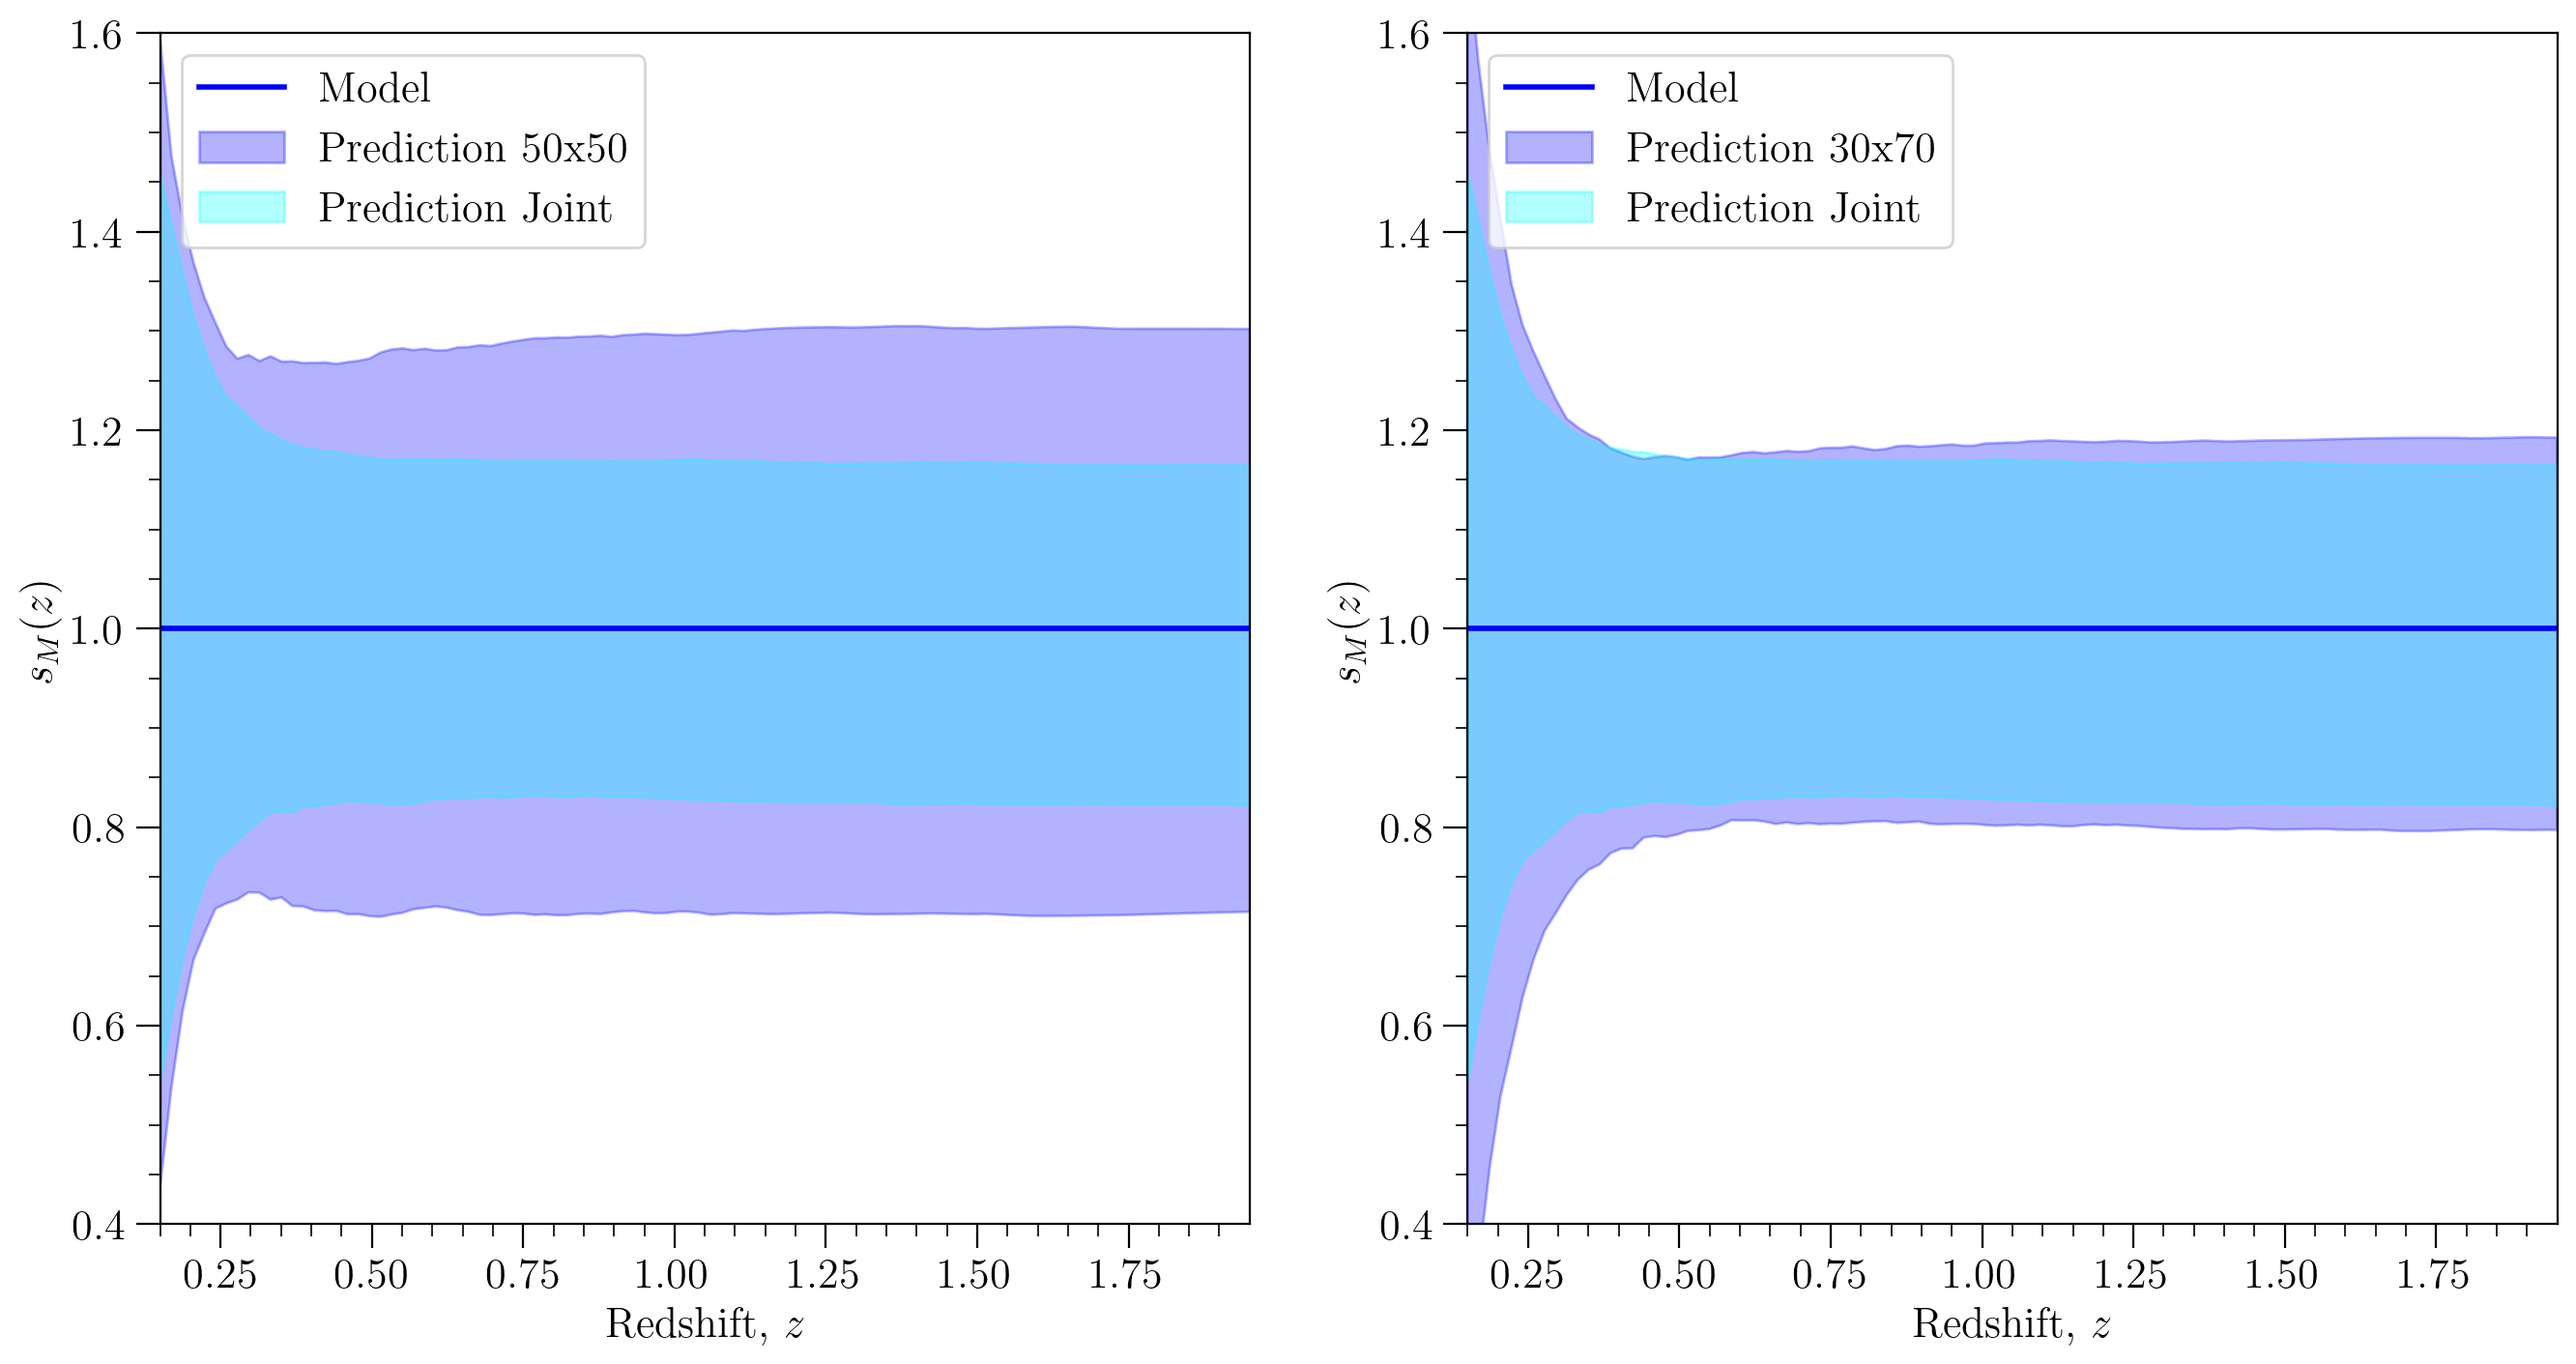

In [164]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

for axi in ax:
    axi.plot(z_lin, sM_fid/sM_fid, '-', lw = 2.0, color='blue', label = 'Model')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, sM_lower_bound_priors/sM_fid, sM_upper_bound_priors/sM_fid, color='black', alpha=0.3, label = r'Prior')
ax[0].fill_between(z_lin, sM_50_lower_bound/sM_fid, sM_50_upper_bound/sM_fid, color='blue', alpha=0.3, label = r'Prediction 50x50')
ax[0].fill_between(z_lin, sM_Joint_lower_bound/sM_fid, sM_Joint_upper_bound/sM_fid, color='cyan', alpha=0.3, label = r'Prediction Joint')

#ax[1].fill_between(z_lin, sM_lower_bound_priors, sM_upper_bound_priors, color='black', alpha=0.3, label = r'Prior')
ax[1].fill_between(z_lin, sM_30_lower_bound/sM_fid, sM_30_upper_bound/sM_fid, color='blue', alpha=0.3, label = r'Prediction 30x70')
ax[1].fill_between(z_lin, sM_Joint_lower_bound/sM_fid, sM_Joint_upper_bound/sM_fid, color='cyan', alpha=0.3, label = r'Prediction Joint')
    
for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_ylim(0.4,1.6)
    axi.set_xlabel(r'Redshift, $z$');
    axi.set_ylabel(r'$s_M(z)$');
    axi.legend(loc='upper left');

### Magnification bias of the Faint, $s_F(z)$

The magnification bias of the faint population is obtained by:

$$ s_F(z) = s_{model}(z)\frac{\bar{N}(z)}{\bar{N}_F(z)} - s_B(z)\frac{\bar{N}_B(z)}{\bar{N}_F(z)} = s_F(z) = s_{model}(z)\frac{m}{m-1} - s_B(z)\frac{1}{m-1} $$ 

We need to sample together the $s_B$ and $s_M$ parameters.

In [165]:
sbias_50_fid = np.concatenate([sB_4fit50, sM_4fit])
sbias_30_fid = np.concatenate([sB_4fit30, sM_4fit])

np.shape(sbias_50_fid), np.shape(sbias_30_fid)

((8,), (8,))

In [166]:
# Select the marginalized covariance matrix for the magnification biases together
cov_50_sbias = Sigma_Matrix_50[:8, :8]
cov_30_sbias = Sigma_Matrix_30[:8, :8]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sbias_50_pars_samples = np.random.multivariate_normal(sbias_50_fid, cov_50_sbias, num_samples)
sbias_30_pars_samples = np.random.multivariate_normal(sbias_30_fid, cov_30_sbias, num_samples)


# Evaluate fitting function for each parameter sample
sB_50_samples = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_50_pars_samples])
sB_30_samples = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_30_pars_samples])
sM_50_samples = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_50_pars_samples])
sM_30_samples = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_30_pars_samples])


# Compute the sF for each sample
sF_50_samples = sM_50_samples*m_50/(m_50-1) - sB_50_samples/(m_50-1)
sF_30_samples = sM_30_samples*m_30/(m_30-1) - sB_30_samples/(m_30-1)


# Calculate the 68% confidence interval
sF_50_lower_bound = np.percentile(sF_50_samples, 16, axis=0)
sF_50_upper_bound = np.percentile(sF_50_samples, 84, axis=0)

sF_30_lower_bound = np.percentile(sF_30_samples, 16, axis=0)
sF_30_upper_bound = np.percentile(sF_30_samples, 84, axis=0)

Compare with priors

In [167]:
# Select the marginalized covariance matrix for the magnification biases together
cov_sbias_50_priors = Cov_priors_50[:8, :8]
cov_sbias_30_priors = Cov_priors_30[:8, :8]


# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
sbias_50_pars_samples_priors = np.random.multivariate_normal(sbias_50_fid, cov_sbias_50_priors, num_samples)
sbias_30_pars_samples_priors = np.random.multivariate_normal(sbias_30_fid, cov_sbias_30_priors, num_samples)


# Evaluate fitting function for each parameter sample
sB_50_samples_priors = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_50_pars_samples_priors])
sB_30_samples_priors = np.array([magbias_fit(pars[:4], z_lin) for pars in sbias_30_pars_samples_priors])
sM_50_samples_priors = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_50_pars_samples_priors])
sM_30_samples_priors = np.array([magbias_fit(pars[4:8], z_lin) for pars in sbias_30_pars_samples_priors])

# Compute the sF for each sample
sF_50_samples_priors = sM_50_samples_priors*m_50/(m_50-1) - sB_50_samples_priors/(m_50-1)
sF_30_samples_priors = sM_30_samples_priors*m_30/(m_30-1) - sB_30_samples_priors/(m_30-1)

# Calculate the 68% confidence interval
sF_50_lower_bound_priors = np.percentile(sF_50_samples_priors, 16, axis=0)
sF_50_upper_bound_priors = np.percentile(sF_50_samples_priors, 84, axis=0)

sF_30_lower_bound_priors = np.percentile(sF_30_samples_priors, 16, axis=0)
sF_30_upper_bound_priors = np.percentile(sF_30_samples_priors, 84, axis=0)

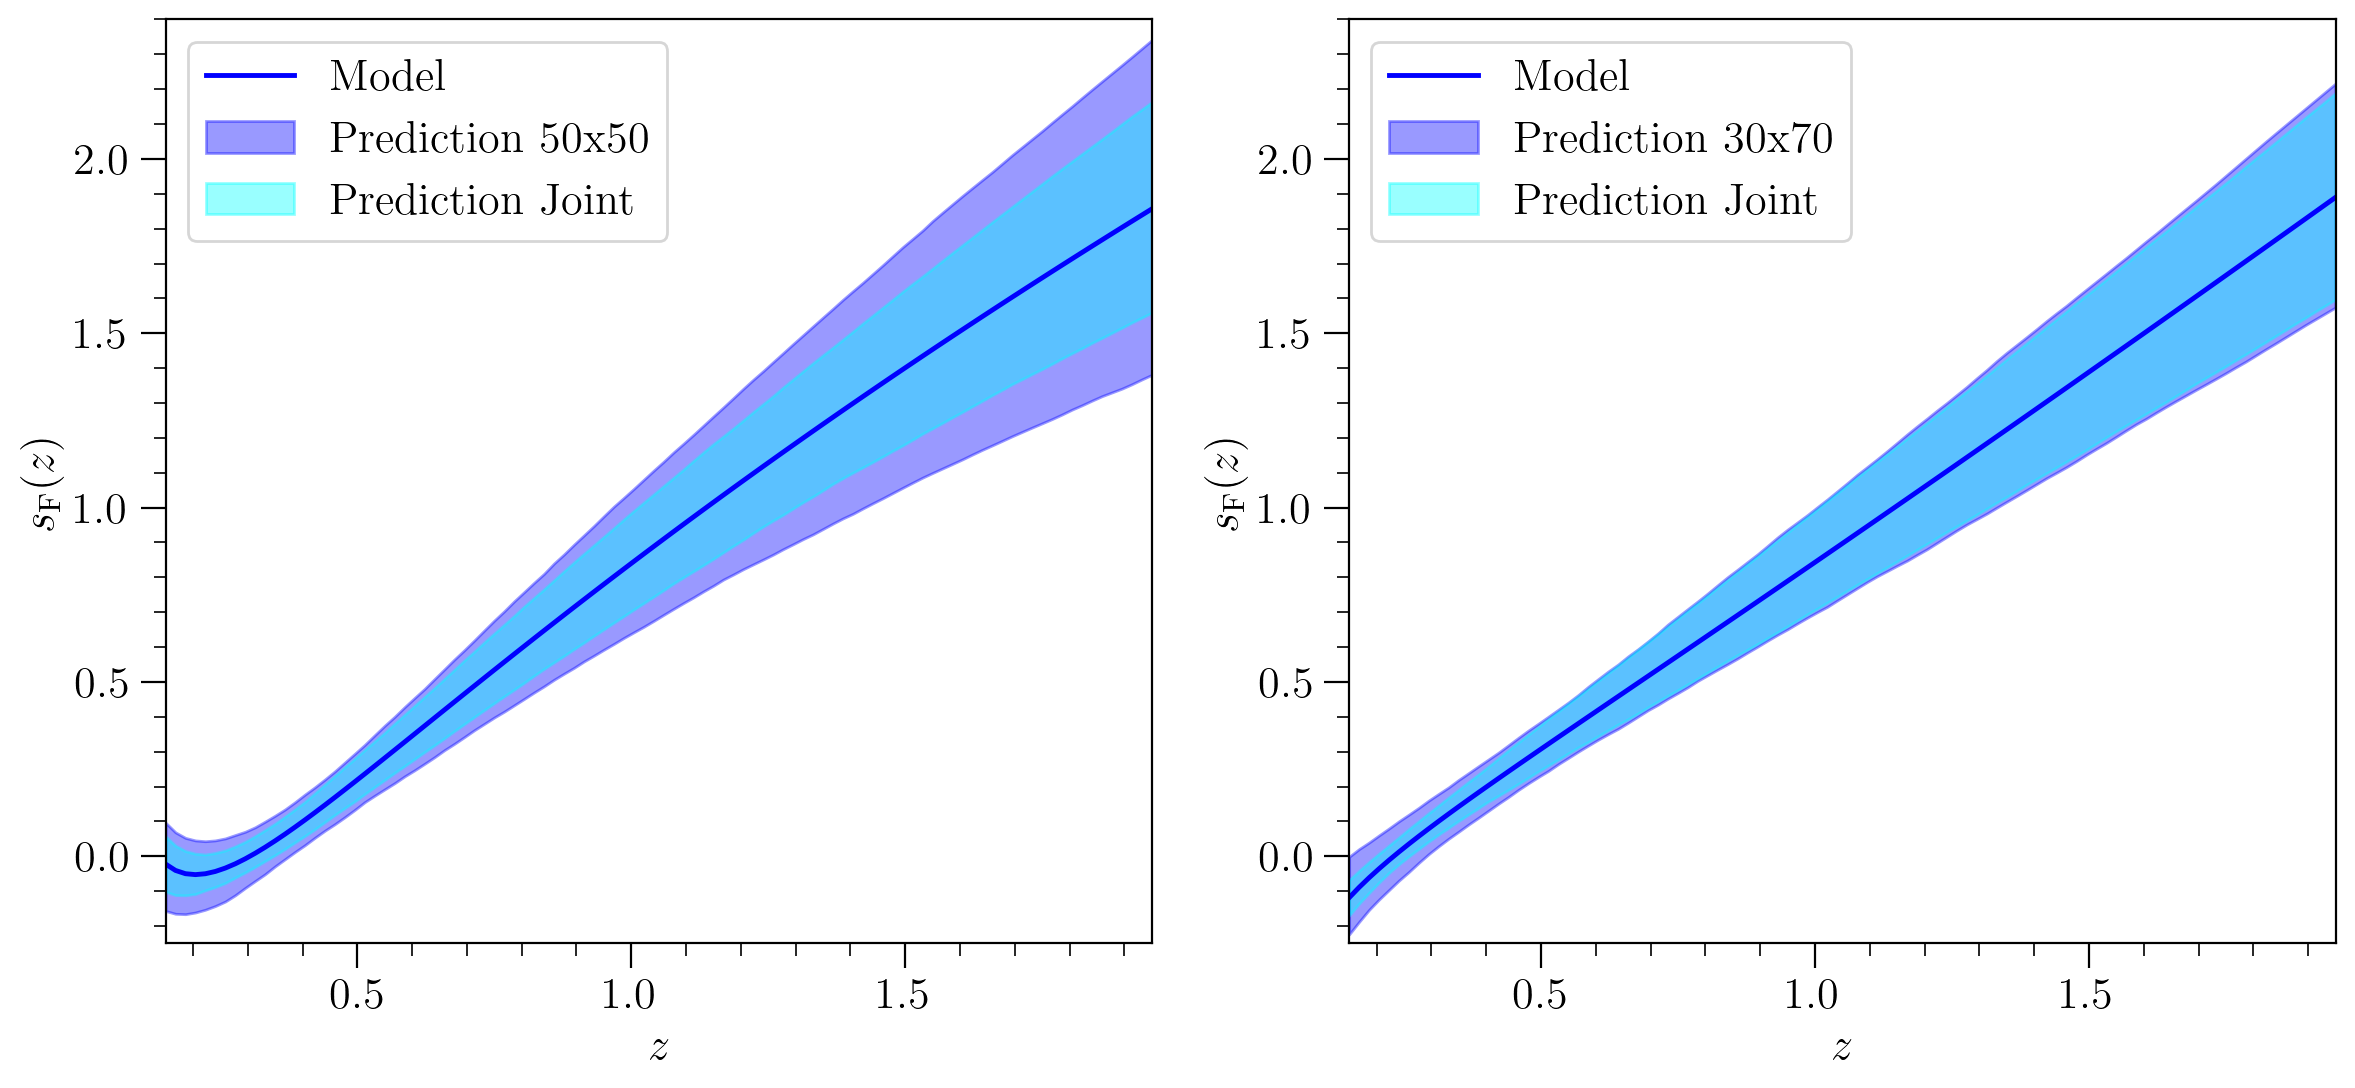

In [168]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, sF_fid_50, '-', color = 'blue', label = 'Model')
#ax[0].fill_between(z_lin, sF_50_lower_bound_priors_, sF_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, sF_50_lower_bound, sF_50_upper_bound, color='blue', alpha=0.4, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, sF_50_Joint_lower_bound_, sF_50_Joint_upper_bound_, color='cyan', alpha=0.4, label = 'Prediction Joint')

ax[1].plot(z_lin, sF_fid_30, '-', color = 'blue', label = 'Model')
#ax[1].fill_between(z_lin, sF_30_lower_bound_priors_, sF_30_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, sF_30_lower_bound, sF_30_upper_bound, color='blue', alpha=0.4, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, sF_30_Joint_lower_bound_, sF_30_Joint_upper_bound_, color='cyan', alpha=0.4, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(-0.25, 2.4)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$s_\mathrm{F}(z)$')
    axi.legend(loc='upper left')
    
plt.savefig("plots/sF_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

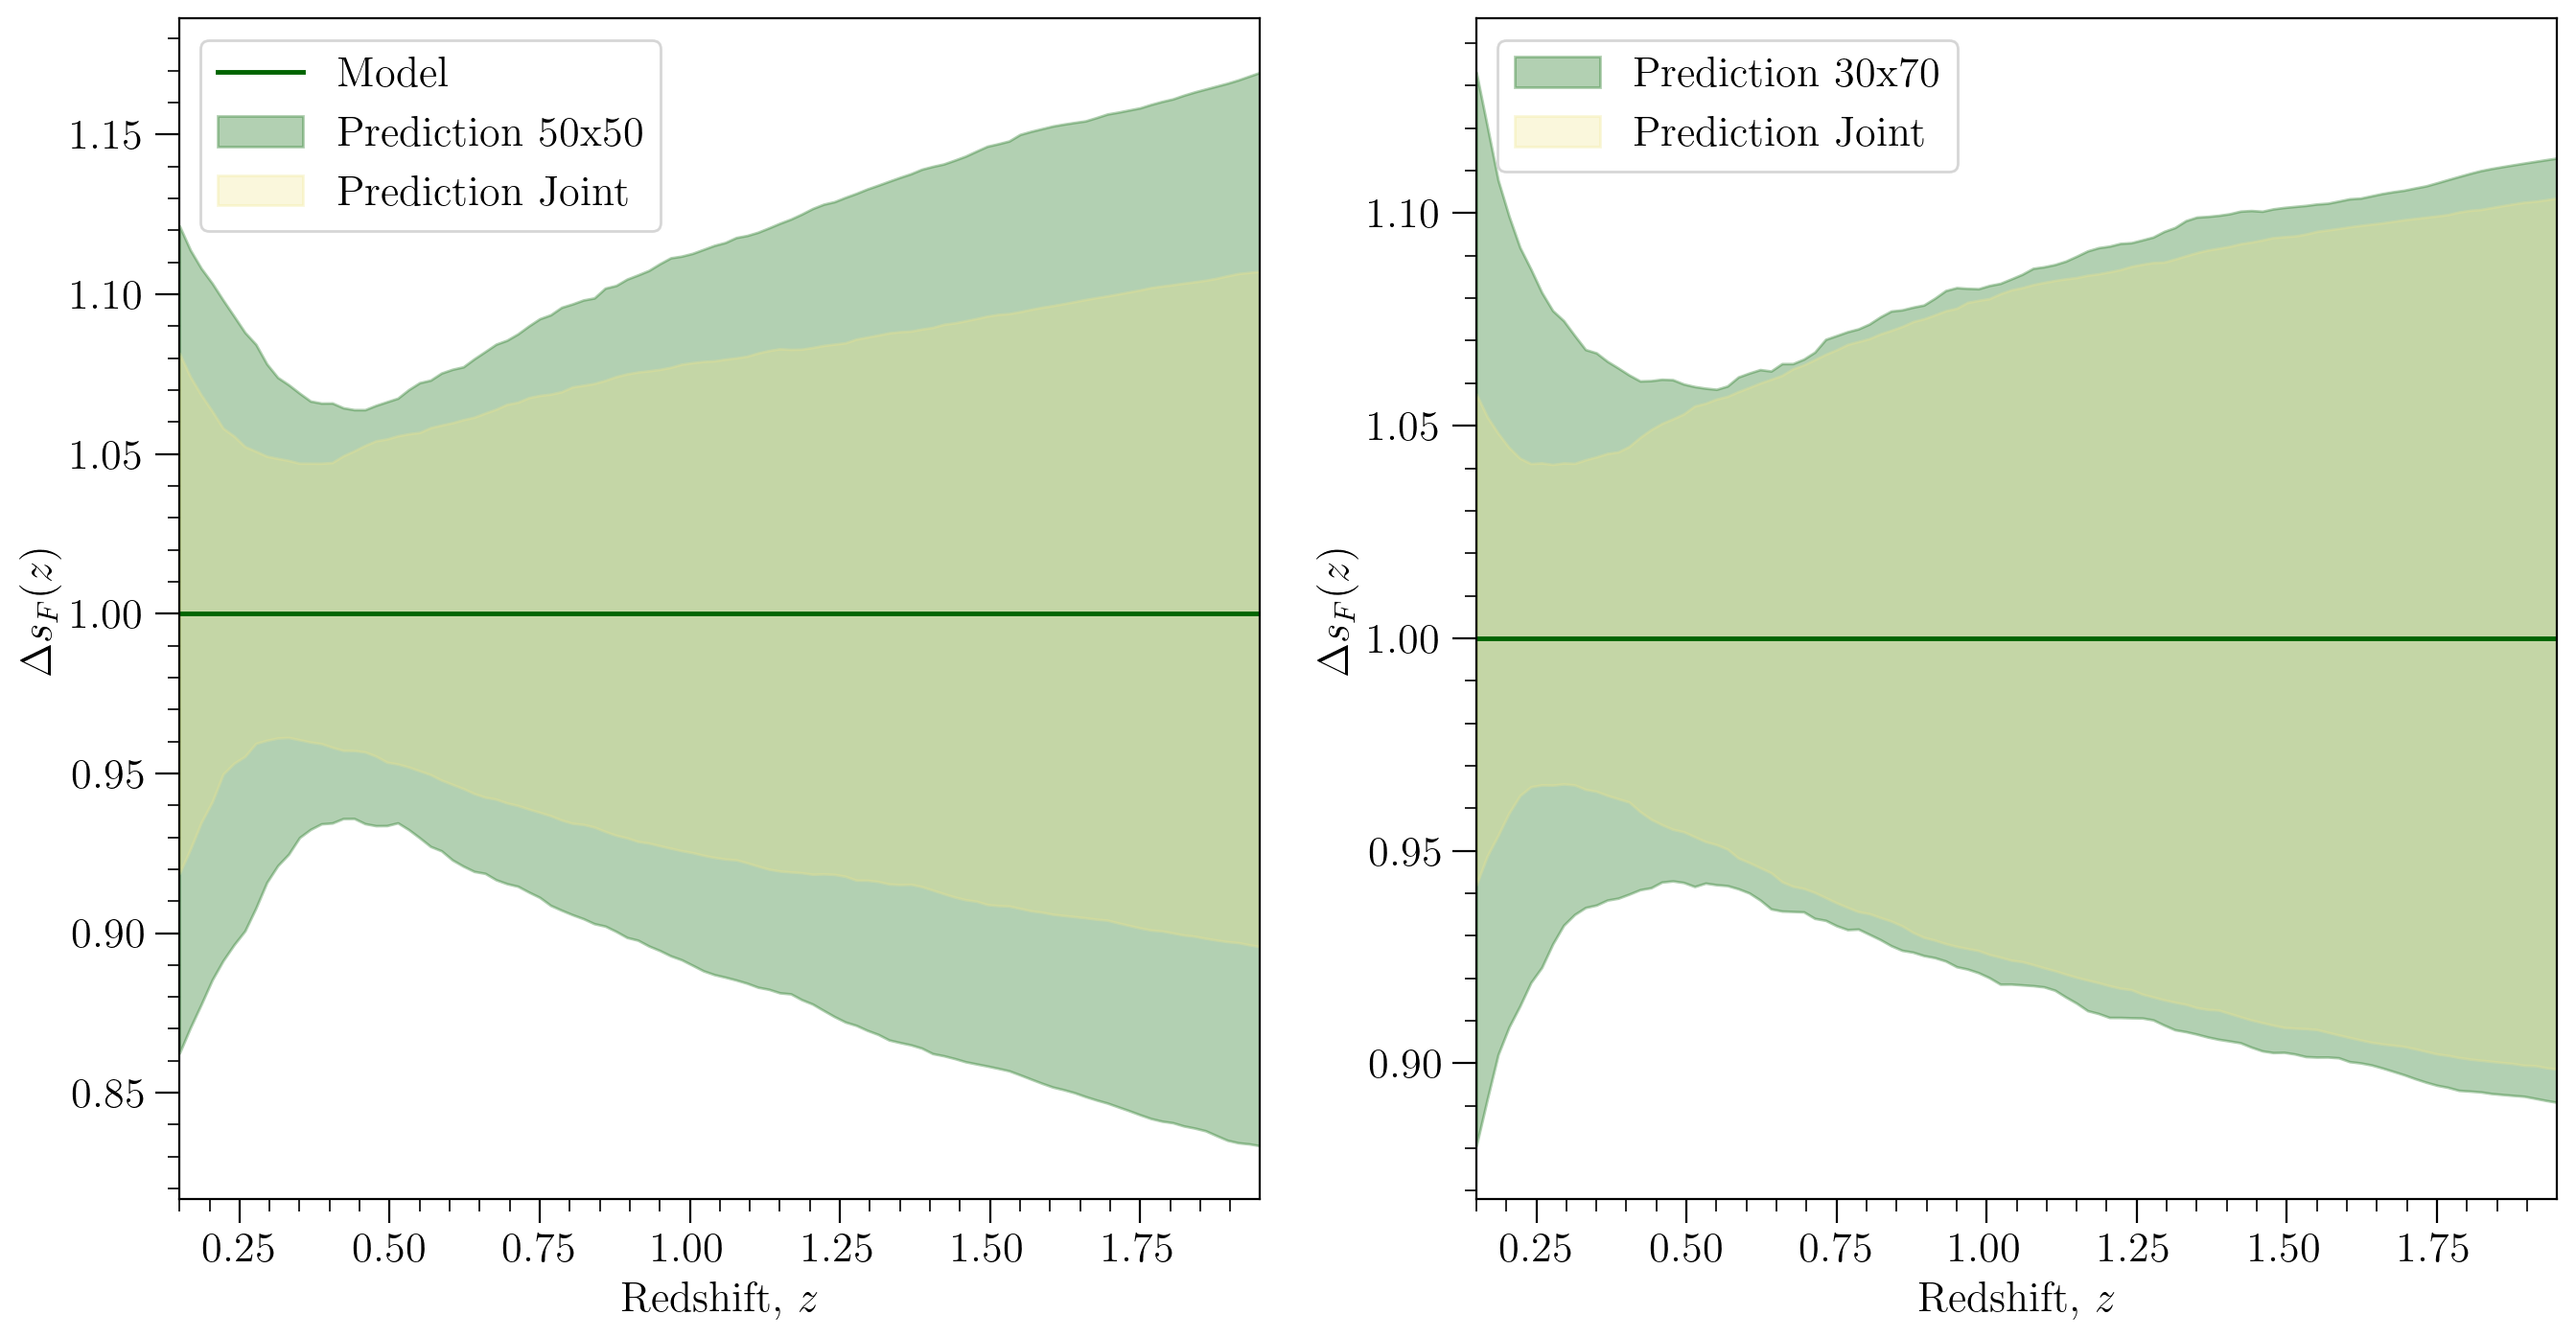

In [169]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, sF_fid_50/sF_fid_50, '-', color = 'darkgreen', label = 'Model')
#ax[0].fill_between(z_lin, sF_50_lower_bound_priors_, sF_50_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (sF_50_lower_bound+1)/(sF_fid_50+1), (sF_50_upper_bound+1)/(sF_fid_50+1), color='darkgreen', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (sF_50_Joint_lower_bound_+1)/(sF_fid_50+1), (sF_50_Joint_upper_bound_+1)/(sF_fid_50+1), color='khaki', alpha=0.3, label = 'Prediction Joint')

ax[1].plot(z_lin, sF_fid_30/sF_fid_30, '-', color = 'darkgreen')
#ax[1].fill_between(z_lin, sF_30_lower_bound_priors_, sF_30_upper_bound_priors_, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (sF_30_lower_bound+1)/(sF_fid_30+1), (sF_30_upper_bound+1)/(sF_fid_30+1), color='darkgreen', alpha=0.3, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, (sF_30_Joint_lower_bound_+1)/(sF_fid_30+1), (sF_30_Joint_upper_bound_+1)/(sF_fid_30+1), color='khaki', alpha=0.3, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    #axi.set_ylim(-1.0, 3.5)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$\Delta s_F(z)$')
    axi.legend(loc='upper left')

## Number evolution

In [209]:
def nevol_fit(params, x):
    a, b, c, d = params
    return a + b * x + c * (1/x) + d * np.exp(-x)

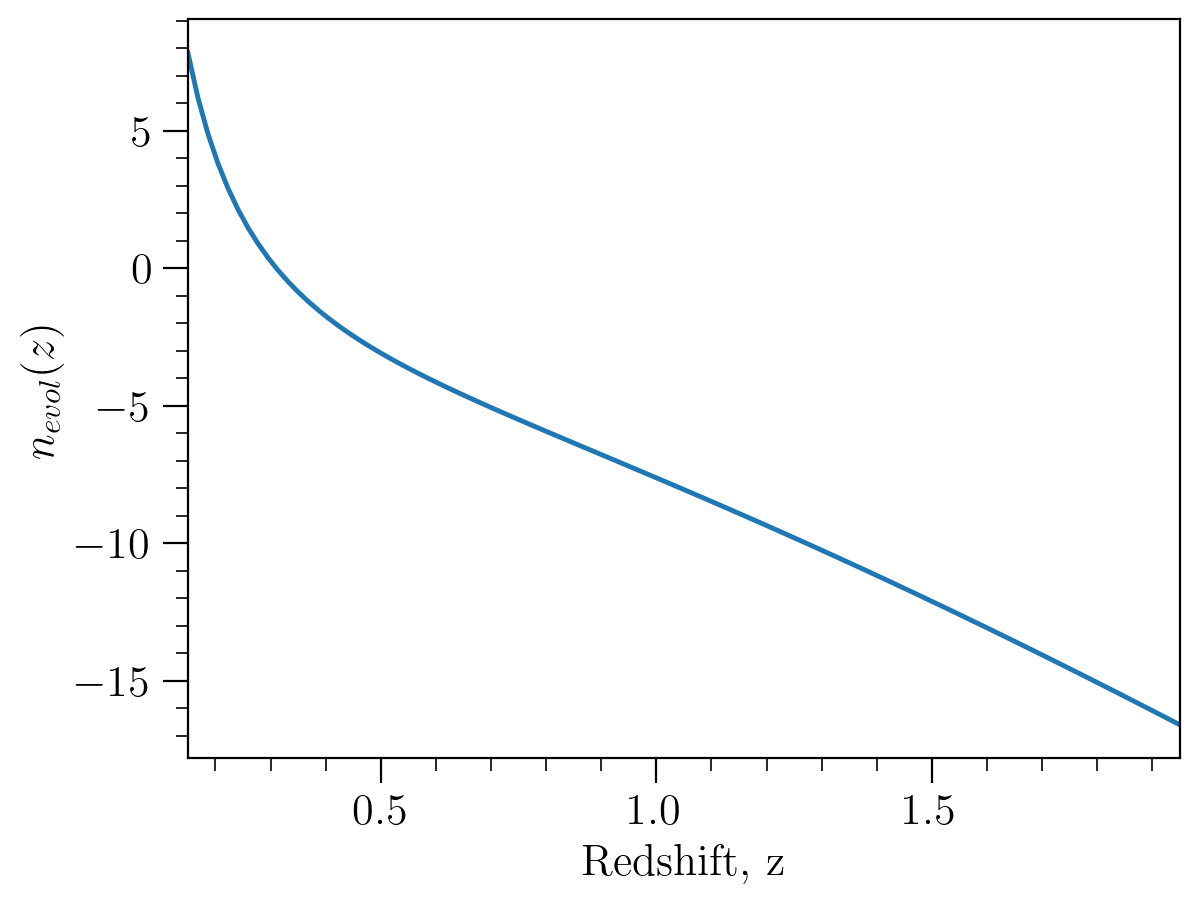

In [210]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)
m_split = 2.

num_evol_fid = nevol_fit(num_fit, z_lin)

plt.plot(z_lin, num_evol_fid, '-')

plt.xlim(z_bins[0],z_bins[-1])

plt.xlabel(r'Redshift, z');
plt.ylabel(r'$n_{evol}(z)$');
#plt.title('Fitting model for the number desnsitiy evolution');

In [211]:
# Select the marginalized covariance matrix for the number evolution

cov_50_numevol = Sigma_Matrix_50[8:12,8:12]
cov_30_numevol = Sigma_Matrix_30[8:12,8:12]



# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000
nevol_50_pars_samples = np.random.multivariate_normal(num_fit, cov_50_numevol, num_samples)
nevol_30_pars_samples = np.random.multivariate_normal(num_fit, cov_30_numevol, num_samples)


# Evaluate fitting function for each parameter sample
nevol_50_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_50_pars_samples])
nevol_30_samples = np.array([nevol_fit(pars, z_lin) for pars in nevol_30_pars_samples])

# Calculate the 68% confidence interval
nevol_50_lower_bound = np.percentile(nevol_50_samples, 16, axis=0)
nevol_50_upper_bound = np.percentile(nevol_50_samples, 84, axis=0)
nevol_30_lower_bound = np.percentile(nevol_30_samples, 16, axis=0)
nevol_30_upper_bound = np.percentile(nevol_30_samples, 84, axis=0)


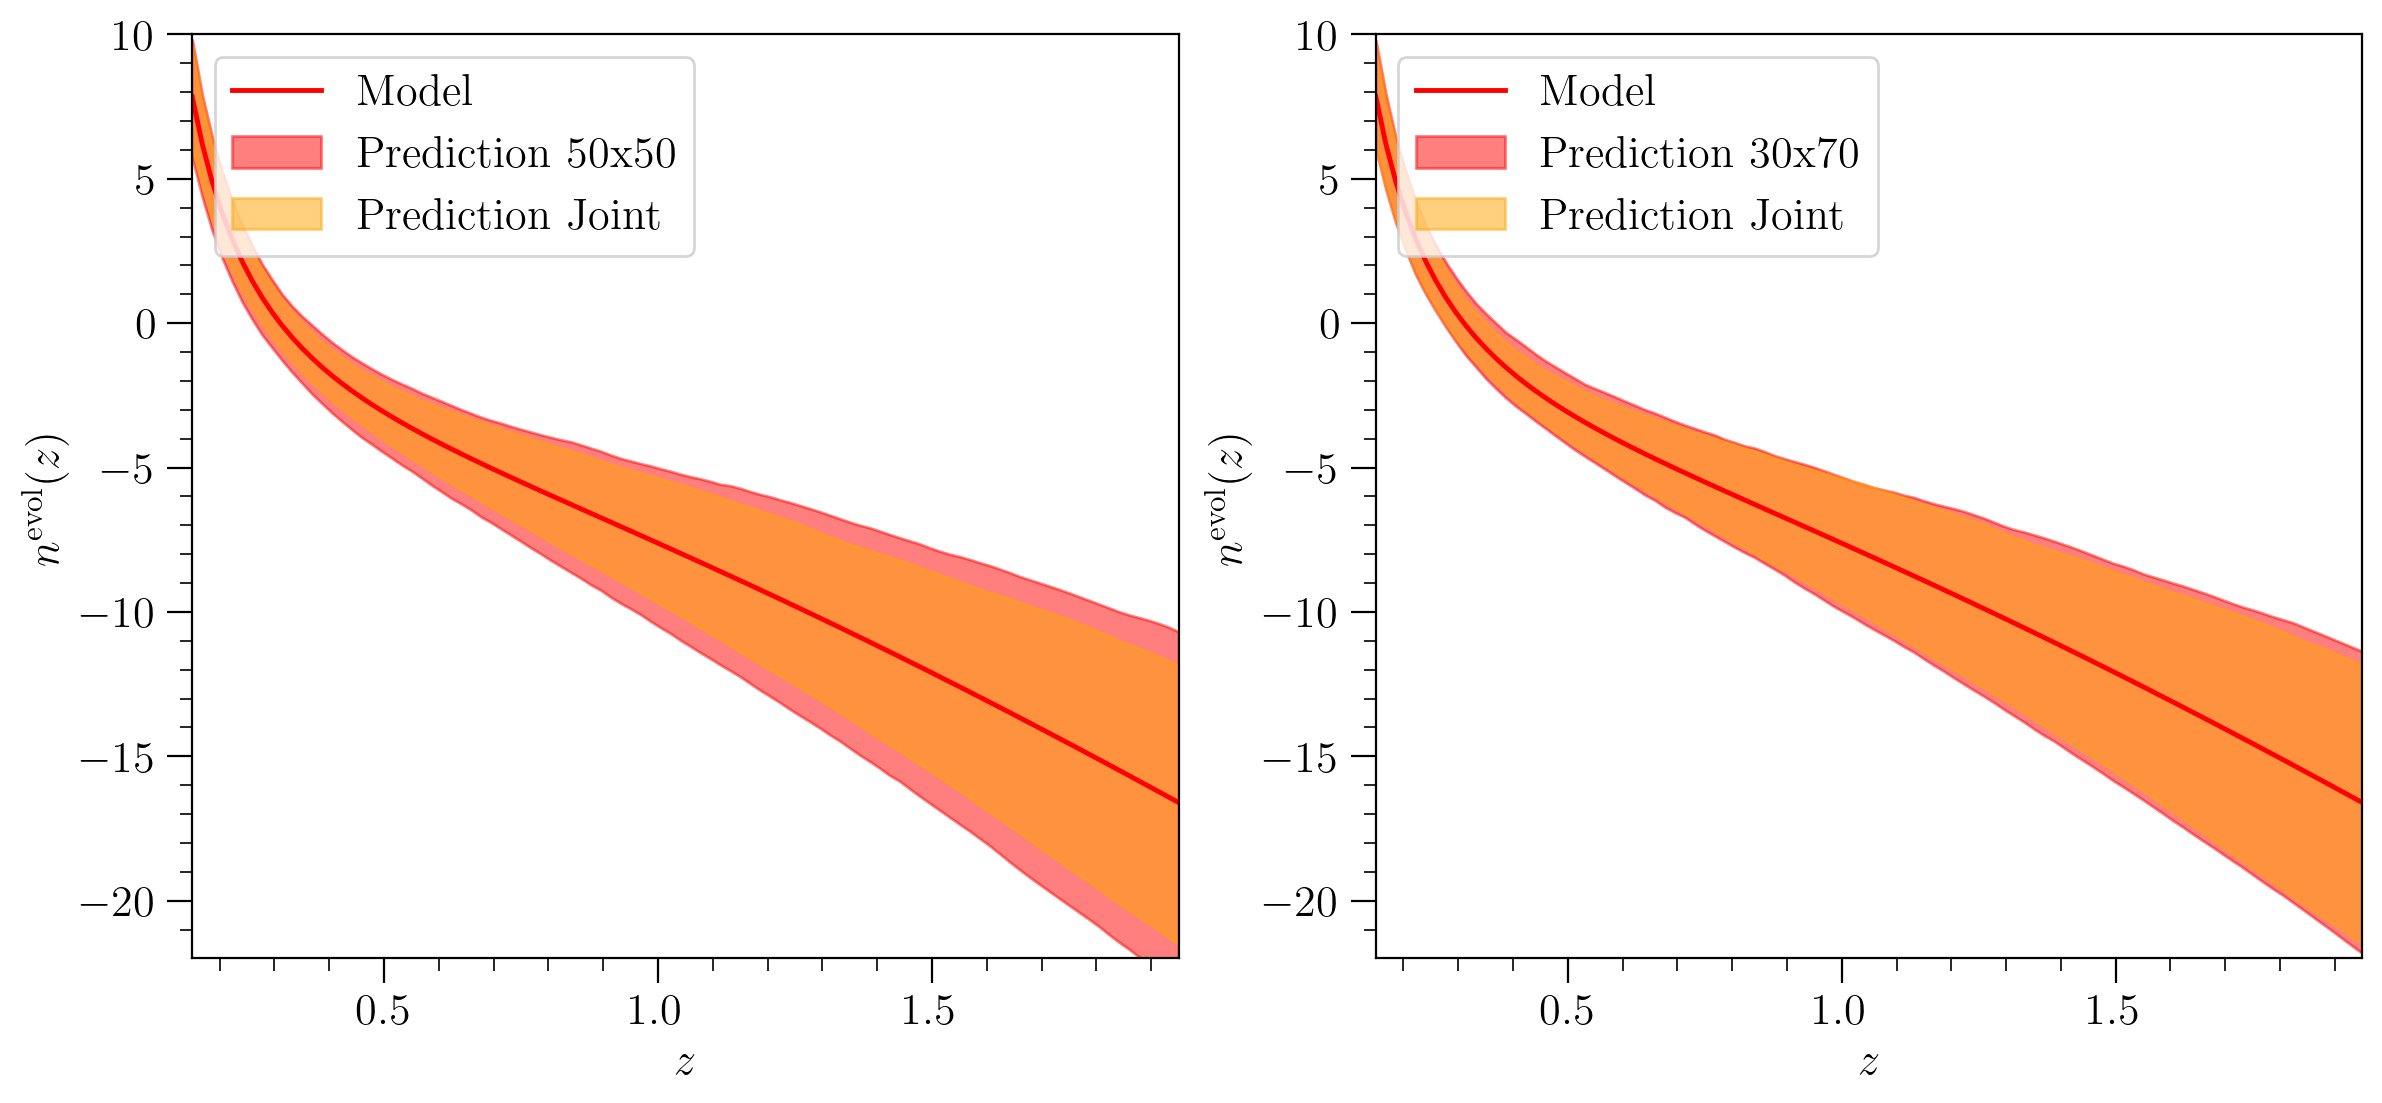

In [212]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (14,6))

ax[0].plot(z_lin, num_evol_fid, '-', color = 'red', label = 'Model')
#ax[0].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, nevol_50_lower_bound, nevol_50_upper_bound, color='red', alpha=0.5, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, nevol_Joint_lower_bound, nevol_Joint_upper_bound, color='orange', alpha=0.5, label = 'Prediction Joint')

ax[1].plot(z_lin, num_evol_fid, '-', color = 'red', label = 'Model')
#ax[1].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, nevol_30_lower_bound, nevol_30_upper_bound, color='red', alpha=0.5, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, nevol_Joint_lower_bound, nevol_Joint_upper_bound, color='orange', alpha=0.5, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_ylim(-22,10)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$n^\mathrm{evol}(z)$')
    axi.legend(loc='upper left')
    
plt.savefig("plots/nevol_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

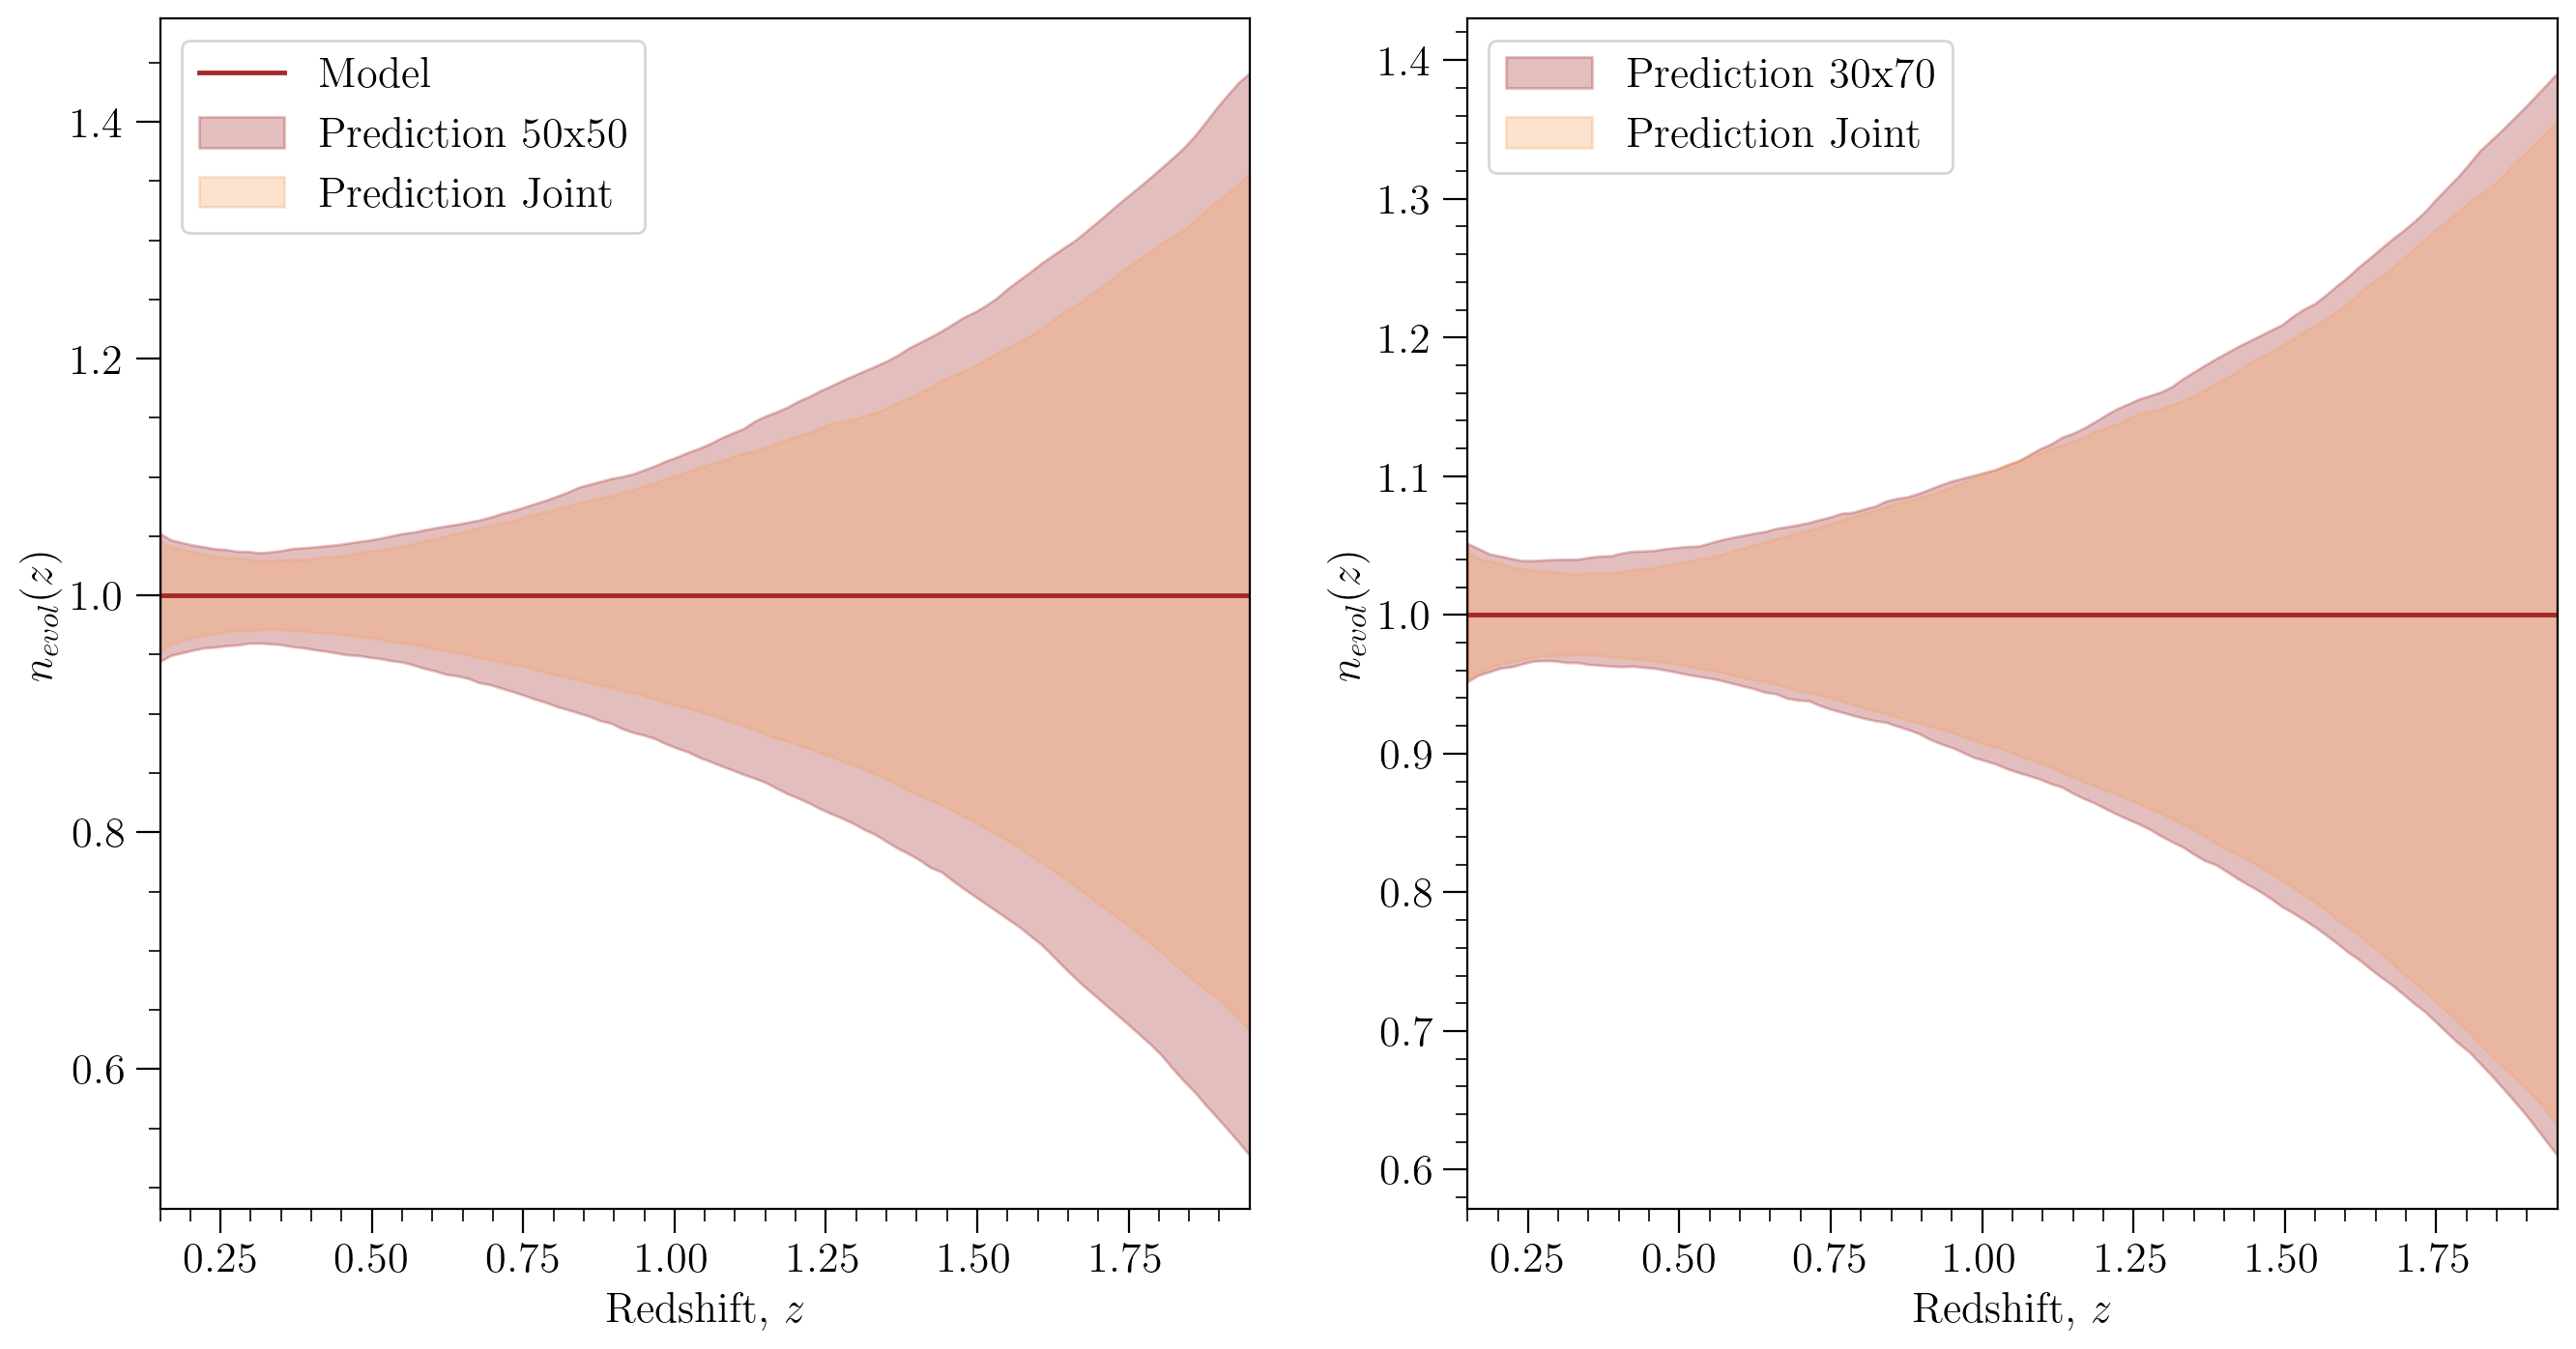

In [213]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize = (16,8))

ax[0].plot(z_lin, num_evol_fid/num_evol_fid, '-', color = 'brown', label = 'Model')
#ax[0].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (nevol_50_lower_bound+30)/(num_evol_fid+30), (nevol_50_upper_bound+30)/(num_evol_fid+30), color='brown', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (nevol_Joint_lower_bound+30)/(num_evol_fid+30), (nevol_Joint_upper_bound+30)/(num_evol_fid+30), color='sandybrown', alpha=0.3, label = 'Prediction Joint')

ax[1].plot(z_lin, num_evol_fid/num_evol_fid, '-', color = 'brown')
#ax[1].fill_between(z_lin, nevol_lower_bound_priors, nevol_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (nevol_30_lower_bound+30)/(num_evol_fid+30), (nevol_30_upper_bound+30)/(num_evol_fid+30), color='brown', alpha=0.3, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, (nevol_Joint_lower_bound+30)/(num_evol_fid+30), (nevol_Joint_upper_bound+30)/(num_evol_fid+30), color='sandybrown', alpha=0.3, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15, 1.95)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$n_{evol}(z)$')
    axi.legend(loc='upper left')

## Evolution bias

The evolution bias is computed from the magnification biases and the evolution of the number densities.

$$ f^{evol}_{B}(z) = -\frac{d\log{N_B(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_B(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) - \frac{5}{2}s_B(z)\,\frac{d\log{F_c}}{d\log{(1+z)}} $$

$$ f^{evol}_{F}(z) = -\frac{d\log{N_F(z)}}{d\log{(1+z)}} - \frac{d\log{H(z)}}{d\log{(1+z)}} + \frac{2(1+z)}{r(z)H(z)} -5\,s_F(z)\left(1+\frac{(1+z)}{r(z)H(z)}\right) 
    - \frac{5}{2}\left[\frac{\bar{N}}{\bar{N}_F}\,s_{model}(z)\frac{d\log{F_*}}{d\log{(1+z)}}-\frac{\bar{N}_B}{\bar{N}_F}\,s_B(z)\frac{d\log{F_c}}{d\log{(1+z)}}\right] $$

We have all the ingredients defined as methods in the EvolutionBias class. We need to extract the relevant terms and then sample togeter the $n_{evol}$ and magnification bias parameters to construct the predictions for each evolution bias. 

In [214]:
from biasmodels import EvolutionBias

In [215]:
myEvolBias_50 = EvolutionBias(n_split=m_50)
myEvolBias_30 = EvolutionBias(n_split=m_30)


dlogH = myEvolBias_50.dlogH
rHterm = myEvolBias_50.rHterm
dFstar = myEvolBias_50.dLogFstar
dFcut = myEvolBias_50.dLogFcut

In [216]:
def fevol_bright(pars_s, pars_n, z):
    pars_sB = pars_s[:4] 
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*magbias_fit(params=pars_sB, x=z))*rHterm(z) - 5*magbias_fit(params=pars_sB, x=z) - 5/2*magbias_fit(params=pars_sB, x=z)*dFcut(z)
    
def fevol_faint(pars_s, pars_n, z):
    
    pars_sB = pars_s[:4]
    pars_sM = pars_s[4:]
    s_B = magbias_fit(params=pars_sB, x=z)
    s_M = magbias_fit(params=pars_sM, x=z)
    s_faint = s_M*m_split/(m_split-1) - s_B/(m_split-1)
    
    return - nevol_fit(params=pars_n, x=z) - dlogH(z) + (2 - 5*s_faint)*rHterm(z) - 5*s_faint + 5/2*((1/(m_split-1)) * s_B *dFcut(z) - (m_split/(m_split-1)) * s_M *dFstar(z))

In [217]:
sbias_fid_50 = np.concatenate([sB_4fit50, sM_4fit])
sbias_fid_30 = np.concatenate([sB_4fit30, sM_4fit])

np.shape(sbias_fid_50), np.shape(sbias_fid_30)

((8,), (8,))

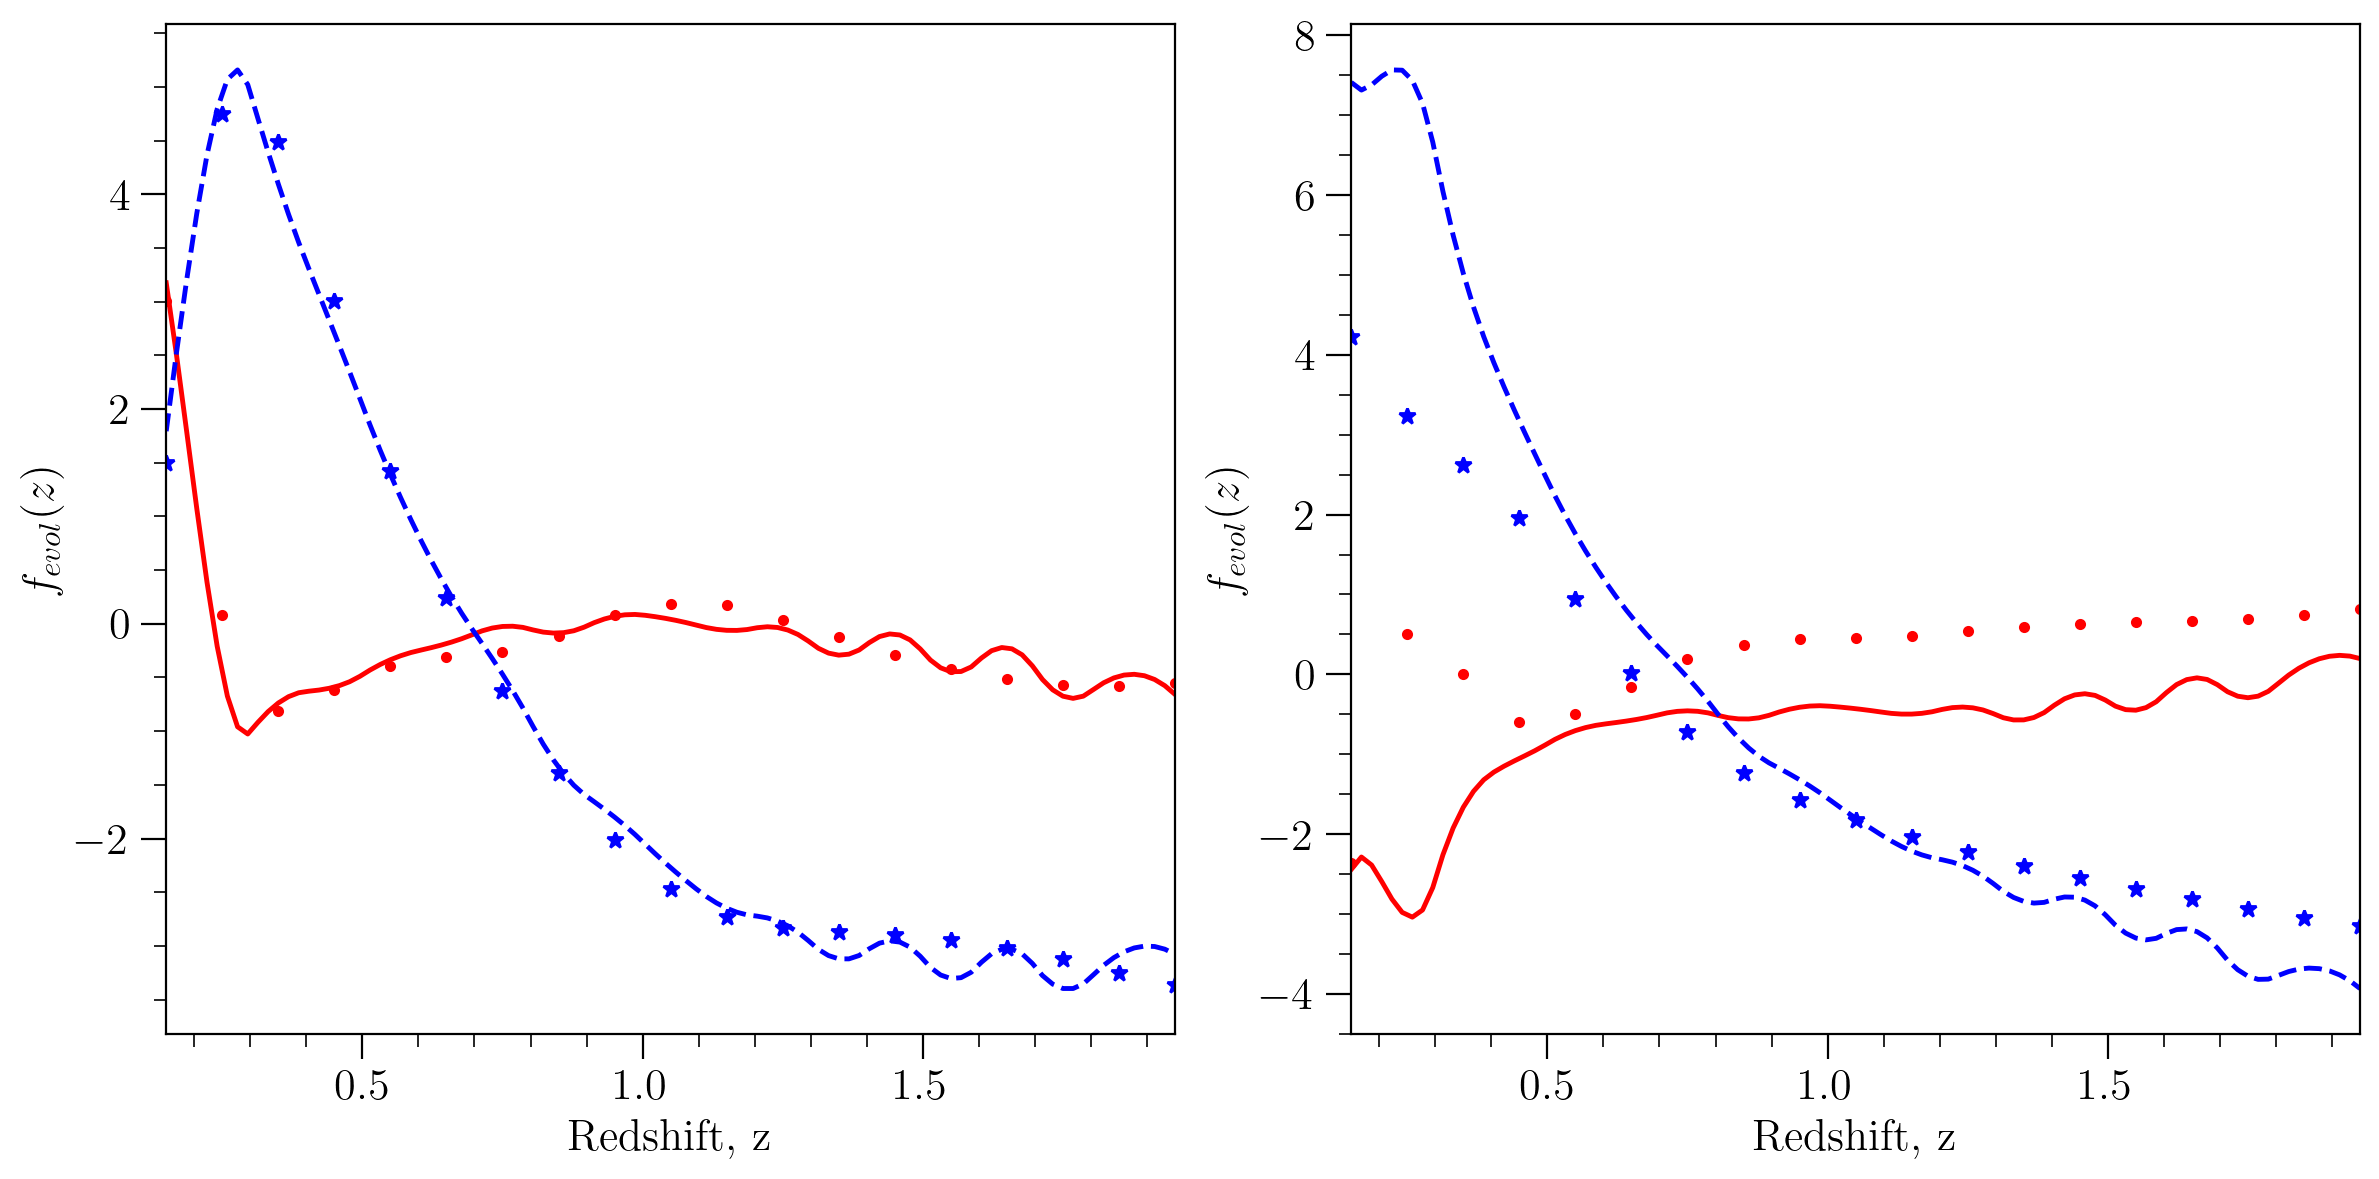

In [218]:
z_lin = np.linspace(z_bins[0], z_bins[-1], 100)

fevol_50_B_fid = fevol_bright(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)
fevol_50_F_fid = fevol_faint(pars_s = sbias_fid_50, pars_n = num_fit, z = z_lin)

fevol_30_B_fid = fevol_bright(pars_s = sbias_fid_30, pars_n = num_fit, z = z_lin)
fevol_30_F_fid = fevol_faint(pars_s = sbias_fid_30, pars_n = num_fit, z = z_lin)

feB_50 = myEvolBias_50.fevol_bright(z_bins)
feF_50 = myEvolBias_50.fevol_faint(z_bins)

feB_30 = myEvolBias_30.fevol_bright(z_bins)
feF_30 = myEvolBias_30.fevol_faint(z_bins)

fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, 'r-')
ax[0].plot(z_lin, fevol_50_F_fid, 'b--')
ax[0].plot(z_bins, feB_50, 'r.', label='Bright')
ax[0].plot(z_bins, feF_50, 'b*', label='Faint')

ax[1].plot(z_lin, fevol_30_B_fid, 'r-')
ax[1].plot(z_lin, fevol_30_F_fid, 'b--')
ax[1].plot(z_bins, feB_30, 'r.', label='Bright')
ax[1].plot(z_bins, feF_30, 'b*', label='Faint')

for axi in ax:
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlim(z_bins[0],z_bins[-1])
    axi.set_xlabel(r'Redshift, z');
    axi.set_ylabel(r'$f_{evol}(z)$');

In [219]:
all_50_fid = np.concatenate([sB_4fit50, sM_4fit, num_fit])
all_30_fid = np.concatenate([sB_4fit30, sM_4fit, num_fit])

np.shape(all_50_fid), np.shape(all_30_fid)

((12,), (12,))

In [226]:
# Select the marginalized covariance matrix for the parameters

cov_50_all = Sigma_Matrix_50[:12, :12]
cov_30_all = Sigma_Matrix_30[:12, :12]
cov_50_priors = Cov_priors_50[:12, :12]
cov_30_priors = Cov_priors_30[:12, :12]

# Generate parameter samples from multivariate normal distribution

##np.random.seed(36)

num_samples = 1000

all_50_pars_samples = np.random.multivariate_normal(all_50_fid, cov_50_all, num_samples)
all_50_pars_samples_priors_ = np.random.multivariate_normal(all_50_fid, cov_50_priors, num_samples)
all_30_pars_samples = np.random.multivariate_normal(all_30_fid, cov_30_all, num_samples)
all_30_pars_samples_priors_ = np.random.multivariate_normal(all_30_fid, cov_30_priors, num_samples)

In [227]:
# Evaluate fitting function for each parameter sample

fevol_50_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples])
fevol_50_B_samples_priors_ = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors_])
fevol_50_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples])
fevol_50_F_samples_priors_ = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_50_pars_samples_priors_])

fevol_30_B_samples = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_30_pars_samples])
fevol_30_B_samples_priors_ = np.array([fevol_bright(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_30_pars_samples_priors_])
fevol_30_F_samples = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_30_pars_samples])
fevol_30_F_samples_priors_ = np.array([fevol_faint(pars_s = pars[:8], pars_n = pars[8:12], z = z_lin) for pars in all_30_pars_samples_priors_])

# Calculate the 68% confidence intervals

fevol_B_50_lower_bound_ = np.percentile(fevol_50_B_samples, 16, axis=0)
fevol_B_50_upper_bound_ = np.percentile(fevol_50_B_samples, 84, axis=0)
fevol_B_50_lower_bound_priors_ = np.percentile(fevol_50_B_samples_priors_, 16, axis=0)
fevol_B_50_upper_bound_priors_ = np.percentile(fevol_50_B_samples_priors_, 84, axis=0)

fevol_F_50_lower_bound_ = np.percentile(fevol_50_F_samples, 16, axis=0)
fevol_F_50_upper_bound_ = np.percentile(fevol_50_F_samples, 84, axis=0)
fevol_F_50_lower_bound_priors_ = np.percentile(fevol_50_F_samples_priors_, 16, axis=0)
fevol_F_50_upper_bound_priors_ = np.percentile(fevol_50_F_samples_priors_, 84, axis=0)

fevol_B_30_lower_bound_ = np.percentile(fevol_30_B_samples, 16, axis=0)
fevol_B_30_upper_bound_ = np.percentile(fevol_30_B_samples, 84, axis=0)
fevol_B_30_lower_bound_priors_ = np.percentile(fevol_30_B_samples_priors_, 16, axis=0)
fevol_B_30_upper_bound_priors_ = np.percentile(fevol_30_B_samples_priors_, 84, axis=0)

fevol_F_30_lower_bound_ = np.percentile(fevol_30_F_samples, 16, axis=0)
fevol_F_30_upper_bound_ = np.percentile(fevol_30_F_samples, 84, axis=0)
fevol_F_30_lower_bound_priors_ = np.percentile(fevol_30_F_samples_priors_, 16, axis=0)
fevol_F_30_upper_bound_priors_ = np.percentile(fevol_30_F_samples_priors_, 84, axis=0)

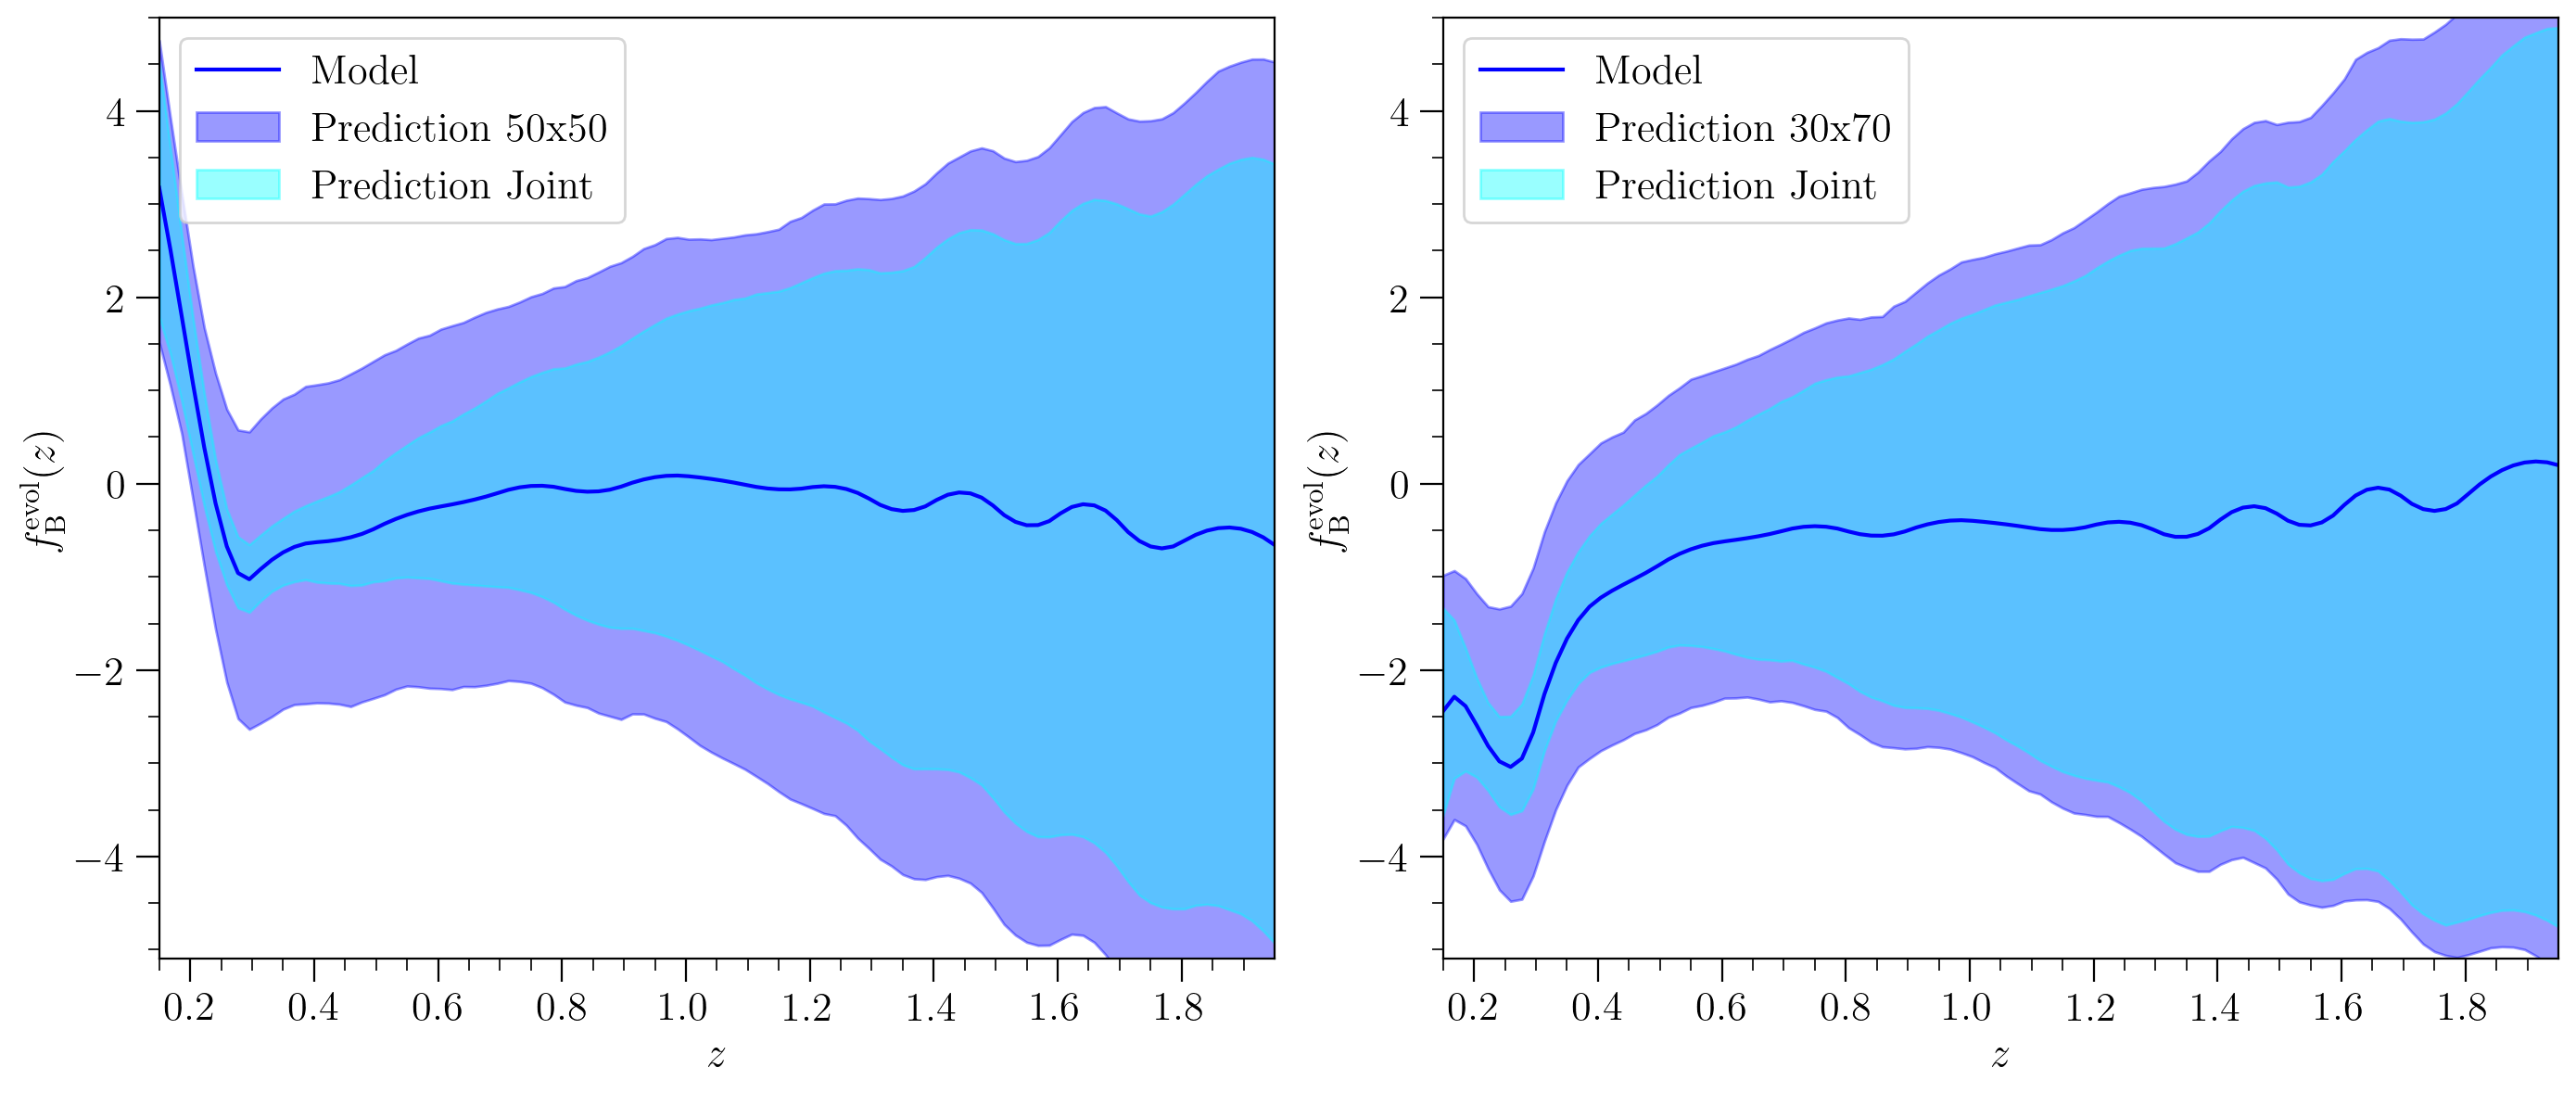

In [235]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid, '-', color='blue', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feB_50, '*', color='black')
ax[1].plot(z_lin, fevol_30_B_fid, '-', color='blue', lw = 1.5, label = 'Model')
#ax[1].plot(z_bins, feB_30, '*', color='black')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, fevol_B_50_lower_bound_priors, fevol_B_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, fevol_B_50_lower_bound_, fevol_B_50_upper_bound_, color='blue', alpha=0.4, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, fevol_B_50_lower_bound, fevol_B_50_upper_bound, color='cyan', alpha=0.4, label = 'Prediction Joint')

#ax[1].fill_between(z_lin, fevol_B_30_lower_bound_priors, fevol_B_30_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, fevol_B_30_lower_bound_, fevol_B_30_upper_bound_, color='blue', alpha=0.4, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, fevol_B_30_lower_bound, fevol_B_30_upper_bound, color='cyan', alpha=0.4, label = 'Prediction Joint')

for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_ylim(-5.1, 5.0)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$f^\mathrm{evol}_\mathrm{B}(z)$')
    axi.legend(loc='upper left')
    
plt.savefig("plots/fevolB_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

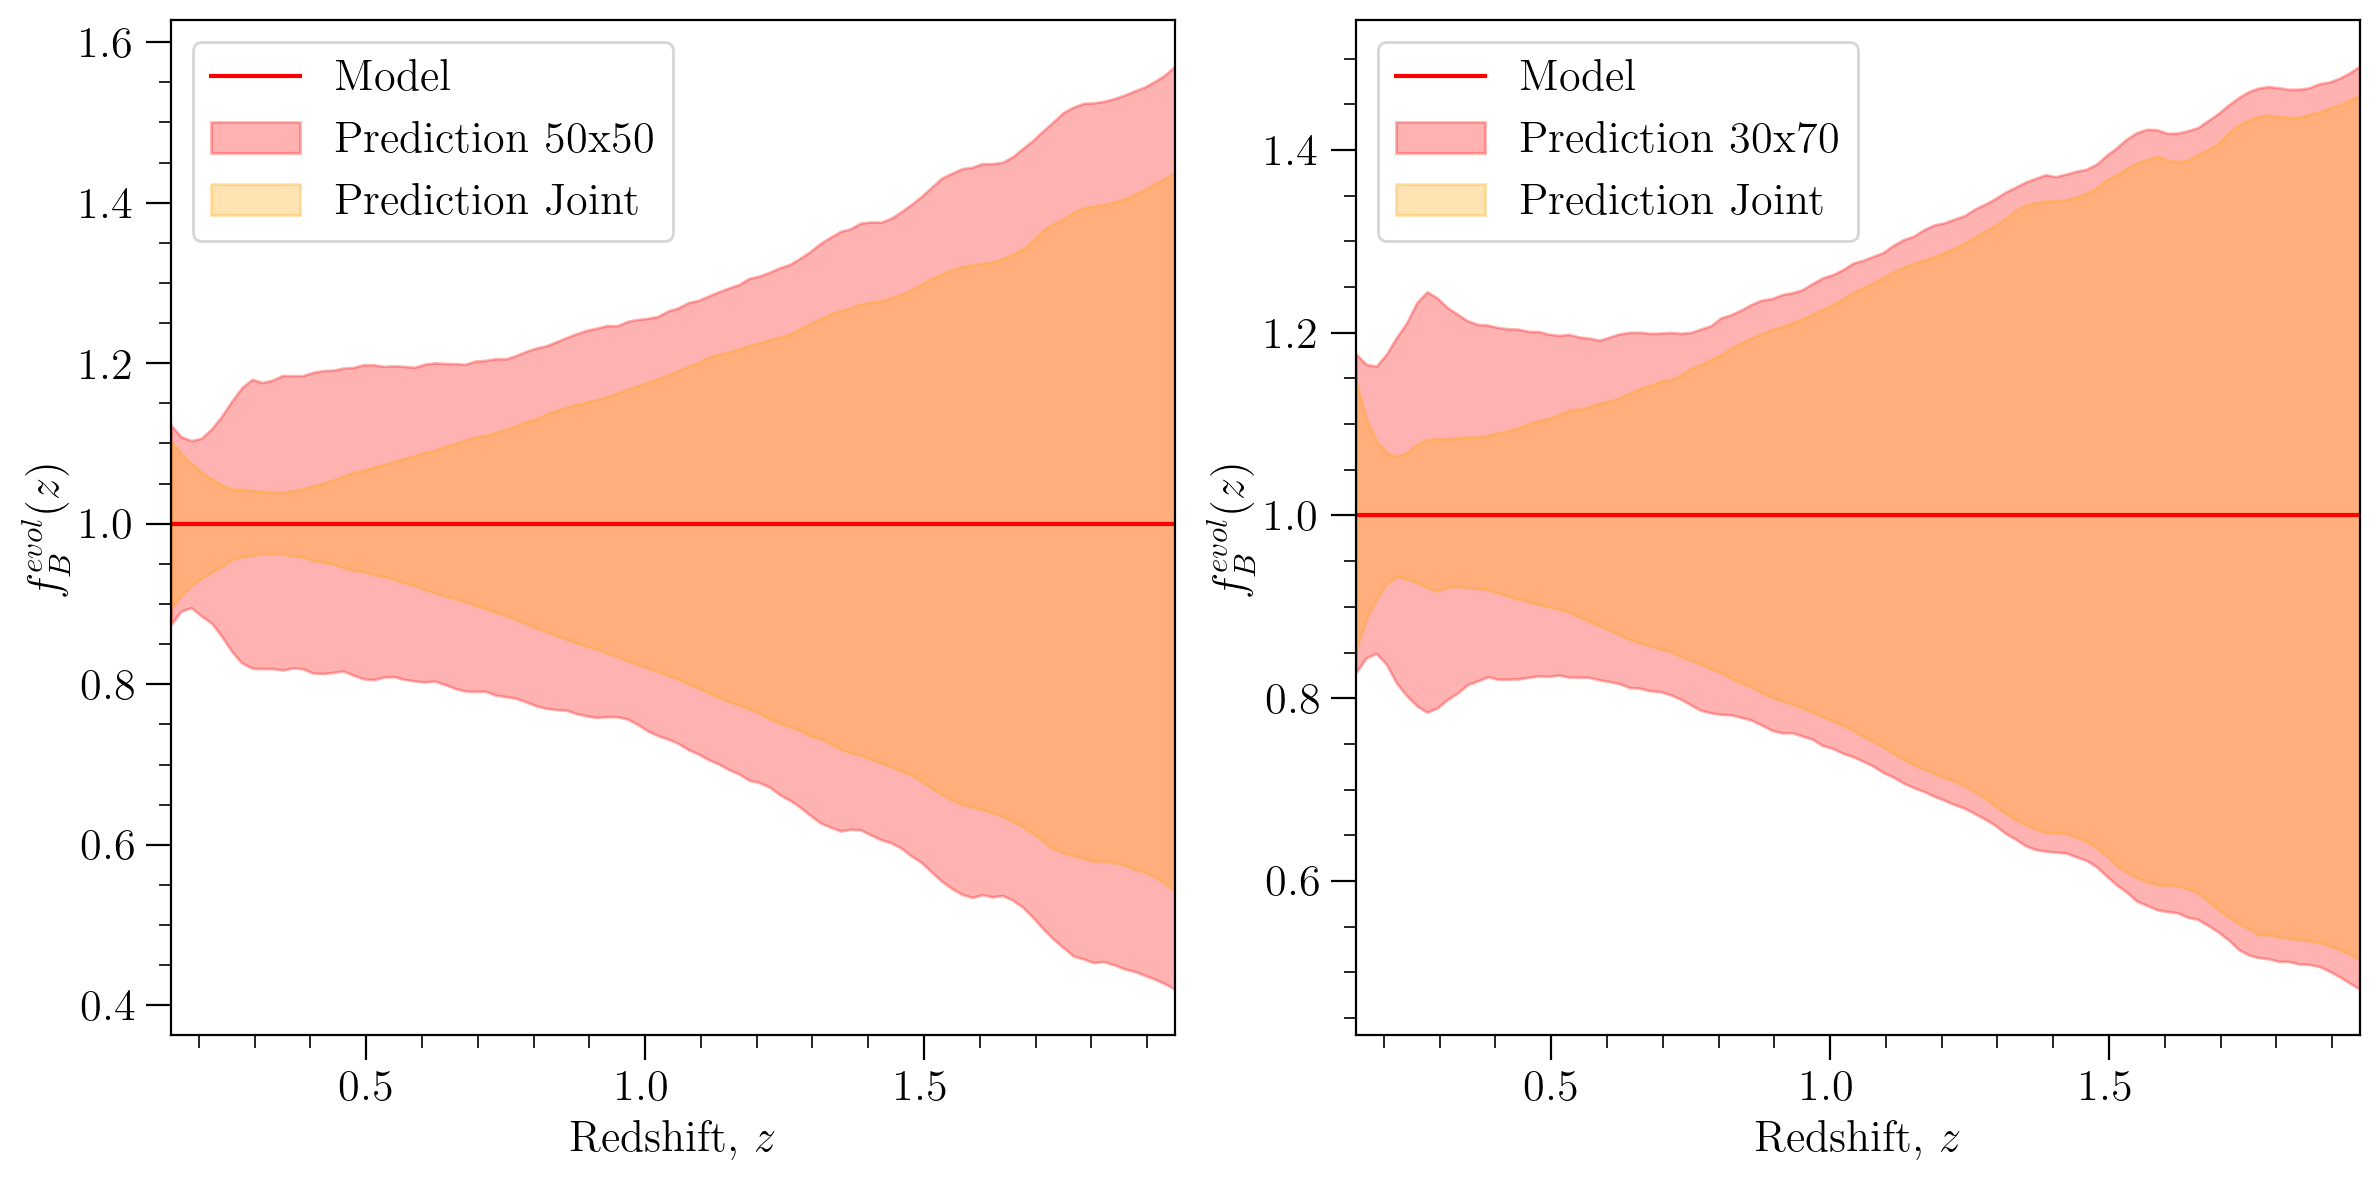

In [223]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(12,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_B_fid/fevol_50_B_fid, '-', color='red', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feB_50, '*', color='black')
ax[1].plot(z_lin, fevol_30_B_fid/fevol_30_B_fid, '-', color='red', lw = 1.5, label = 'Model')
#ax[1].plot(z_bins, feB_30, '*', color='black')

# Shade the 68% confidence interval

#ax[0].fill_between(z_lin, fevol_B_50_lower_bound_priors, fevol_B_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (fevol_B_50_lower_bound_+10)/(fevol_50_B_fid+10), (fevol_B_50_upper_bound_+10)/(fevol_50_B_fid+10), color='red', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (fevol_B_50_lower_bound+10)/(fevol_50_B_fid+10), (fevol_B_50_upper_bound+10)/(fevol_50_B_fid+10), color='orange', alpha=0.3, label = 'Prediction Joint')

#ax[1].fill_between(z_lin, fevol_B_30_lower_bound_priors, fevol_B_30_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (fevol_B_30_lower_bound_+10)/(fevol_30_B_fid+10), (fevol_B_30_upper_bound_+10)/(fevol_30_B_fid+10), color='red', alpha=0.3, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, (fevol_B_30_lower_bound+10)/(fevol_30_B_fid+10), (fevol_B_30_upper_bound+10)/(fevol_30_B_fid+10), color='orange', alpha=0.3, label = 'Prediction Joint')

for axi in ax:
    axi.set_xlim(0.15,1.95)
    #axi.set_ylim(-20, 20)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_B(z)$')
    axi.legend(loc='upper left')

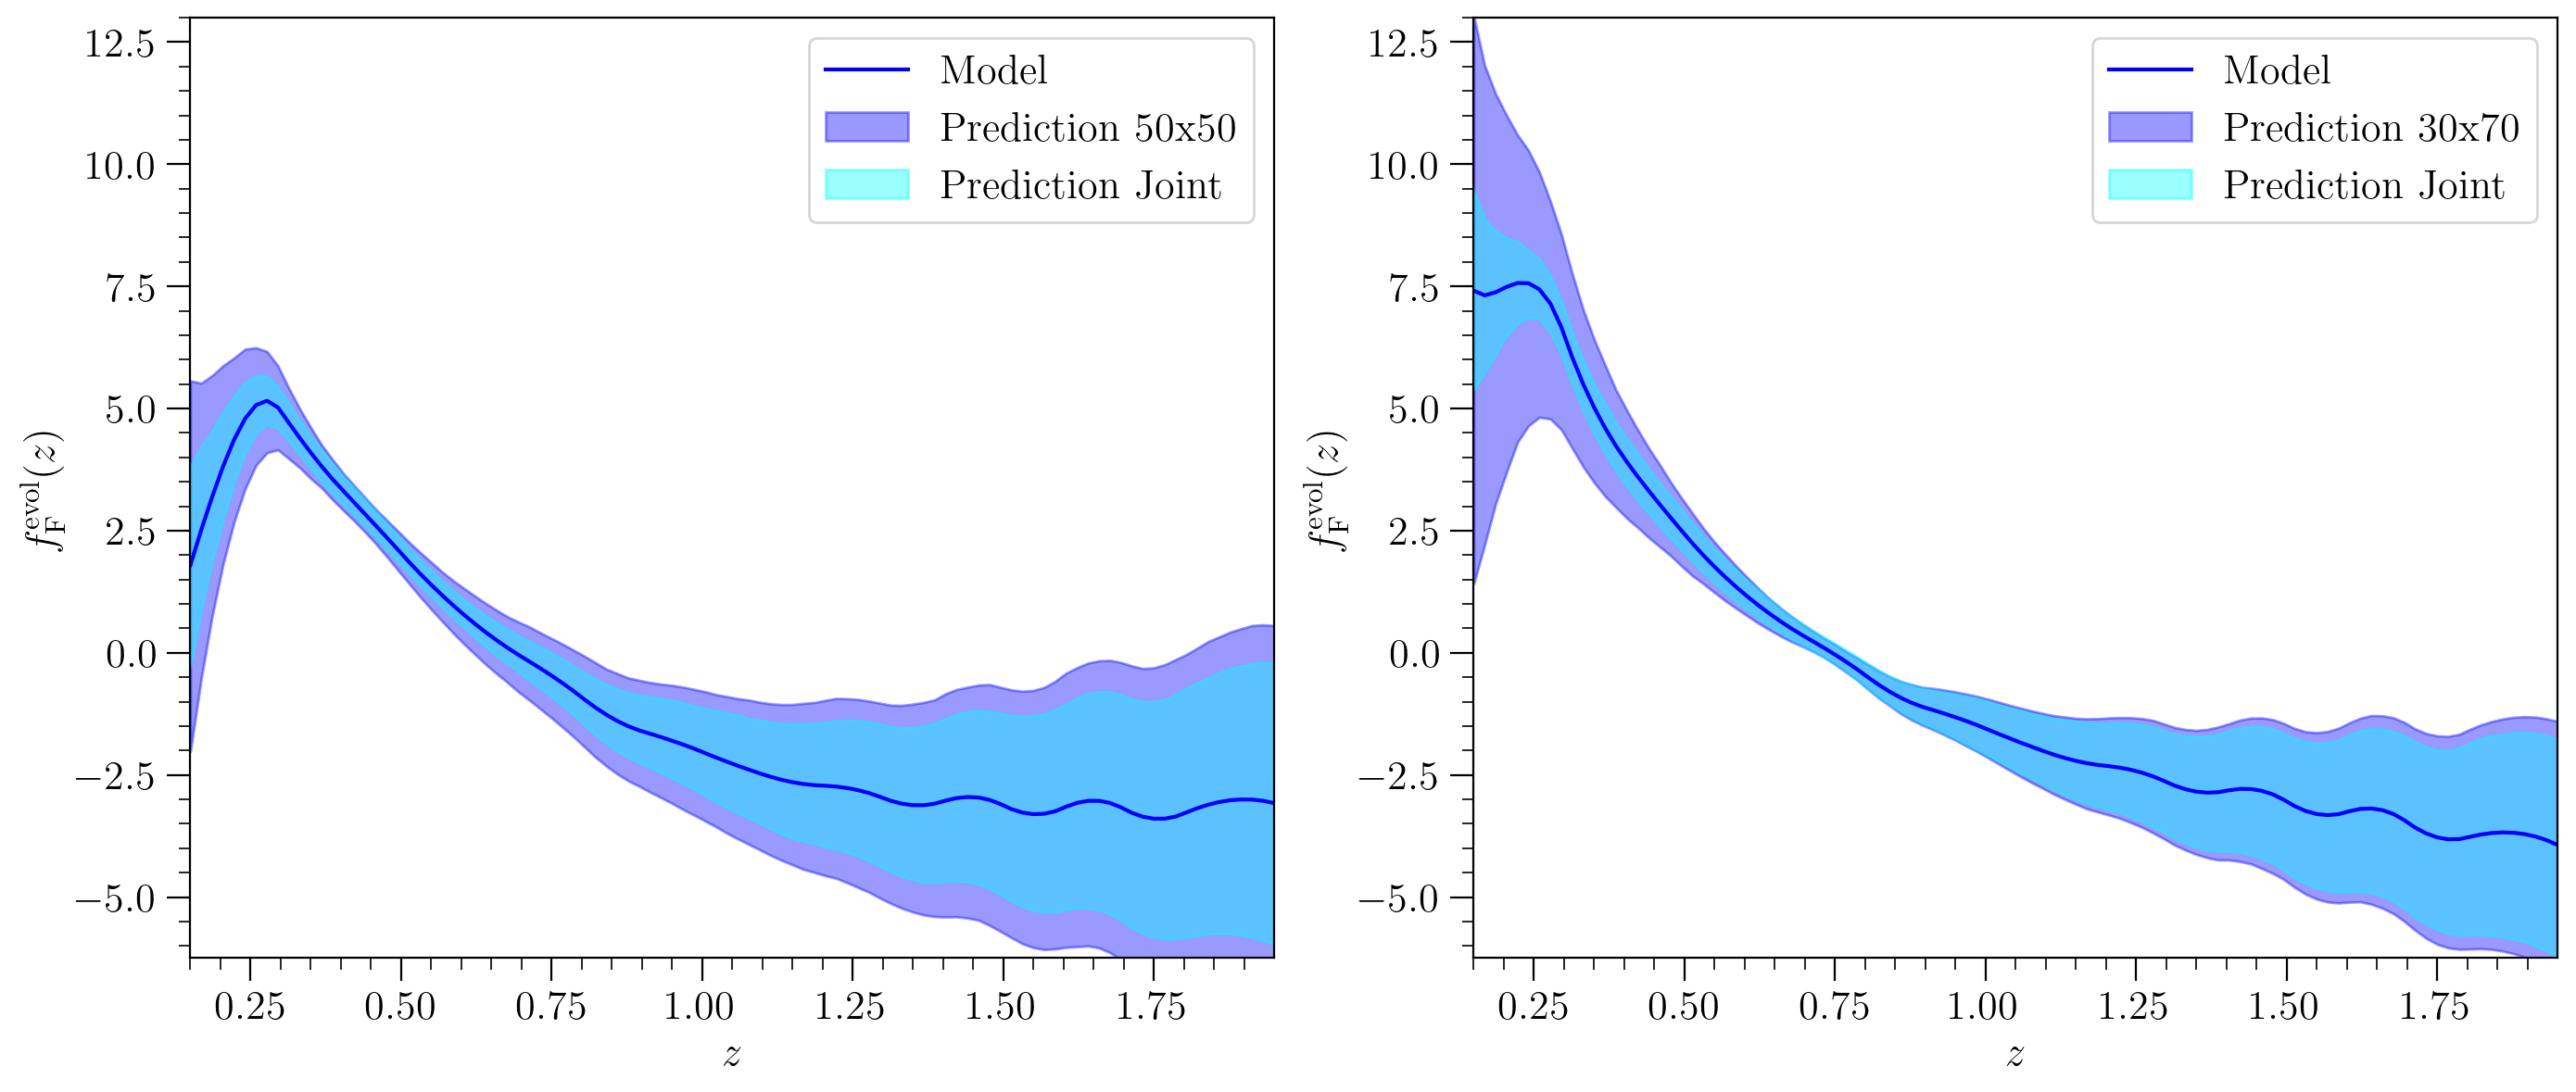

In [236]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_F_fid, '-', color='blue', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feF_50, '*', color='black')
ax[1].plot(z_lin, fevol_30_F_fid, '-', color='blue', lw = 1.5, label ='Model')
#ax[1].plot(z_bins, feF_30, '*', color='black')

# Shade the 68% confidence interval
#ax[0].fill_between(z_lin, fevol_F_50_lower_bound_priors, fevol_F_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, fevol_F_50_lower_bound_, fevol_F_50_upper_bound_, color='blue', alpha=0.4, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, fevol_F_50_lower_bound, fevol_F_50_upper_bound, color='cyan', alpha=0.4, label = 'Prediction Joint')


#ax[1].fill_between(z_lin, fevol_F_30_lower_bound_priors, fevol_F_30_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, fevol_F_30_lower_bound_, fevol_F_30_upper_bound_, color='blue', alpha=0.4, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, fevol_F_30_lower_bound, fevol_F_30_upper_bound, color='cyan', alpha=0.4, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15,1.95)
    axi.set_ylim(-6.25, 13)
    axi.set_xlabel(r'$z$')
    axi.set_ylabel(r'$f^\mathrm{evol}_\mathrm{F}(z)$')
    axi.legend(loc='upper right')
    
plt.savefig("plots/fevolF_prediction_joint_shotnoise_vs_prior50.pdf", bbox_inches='tight', format='pdf')

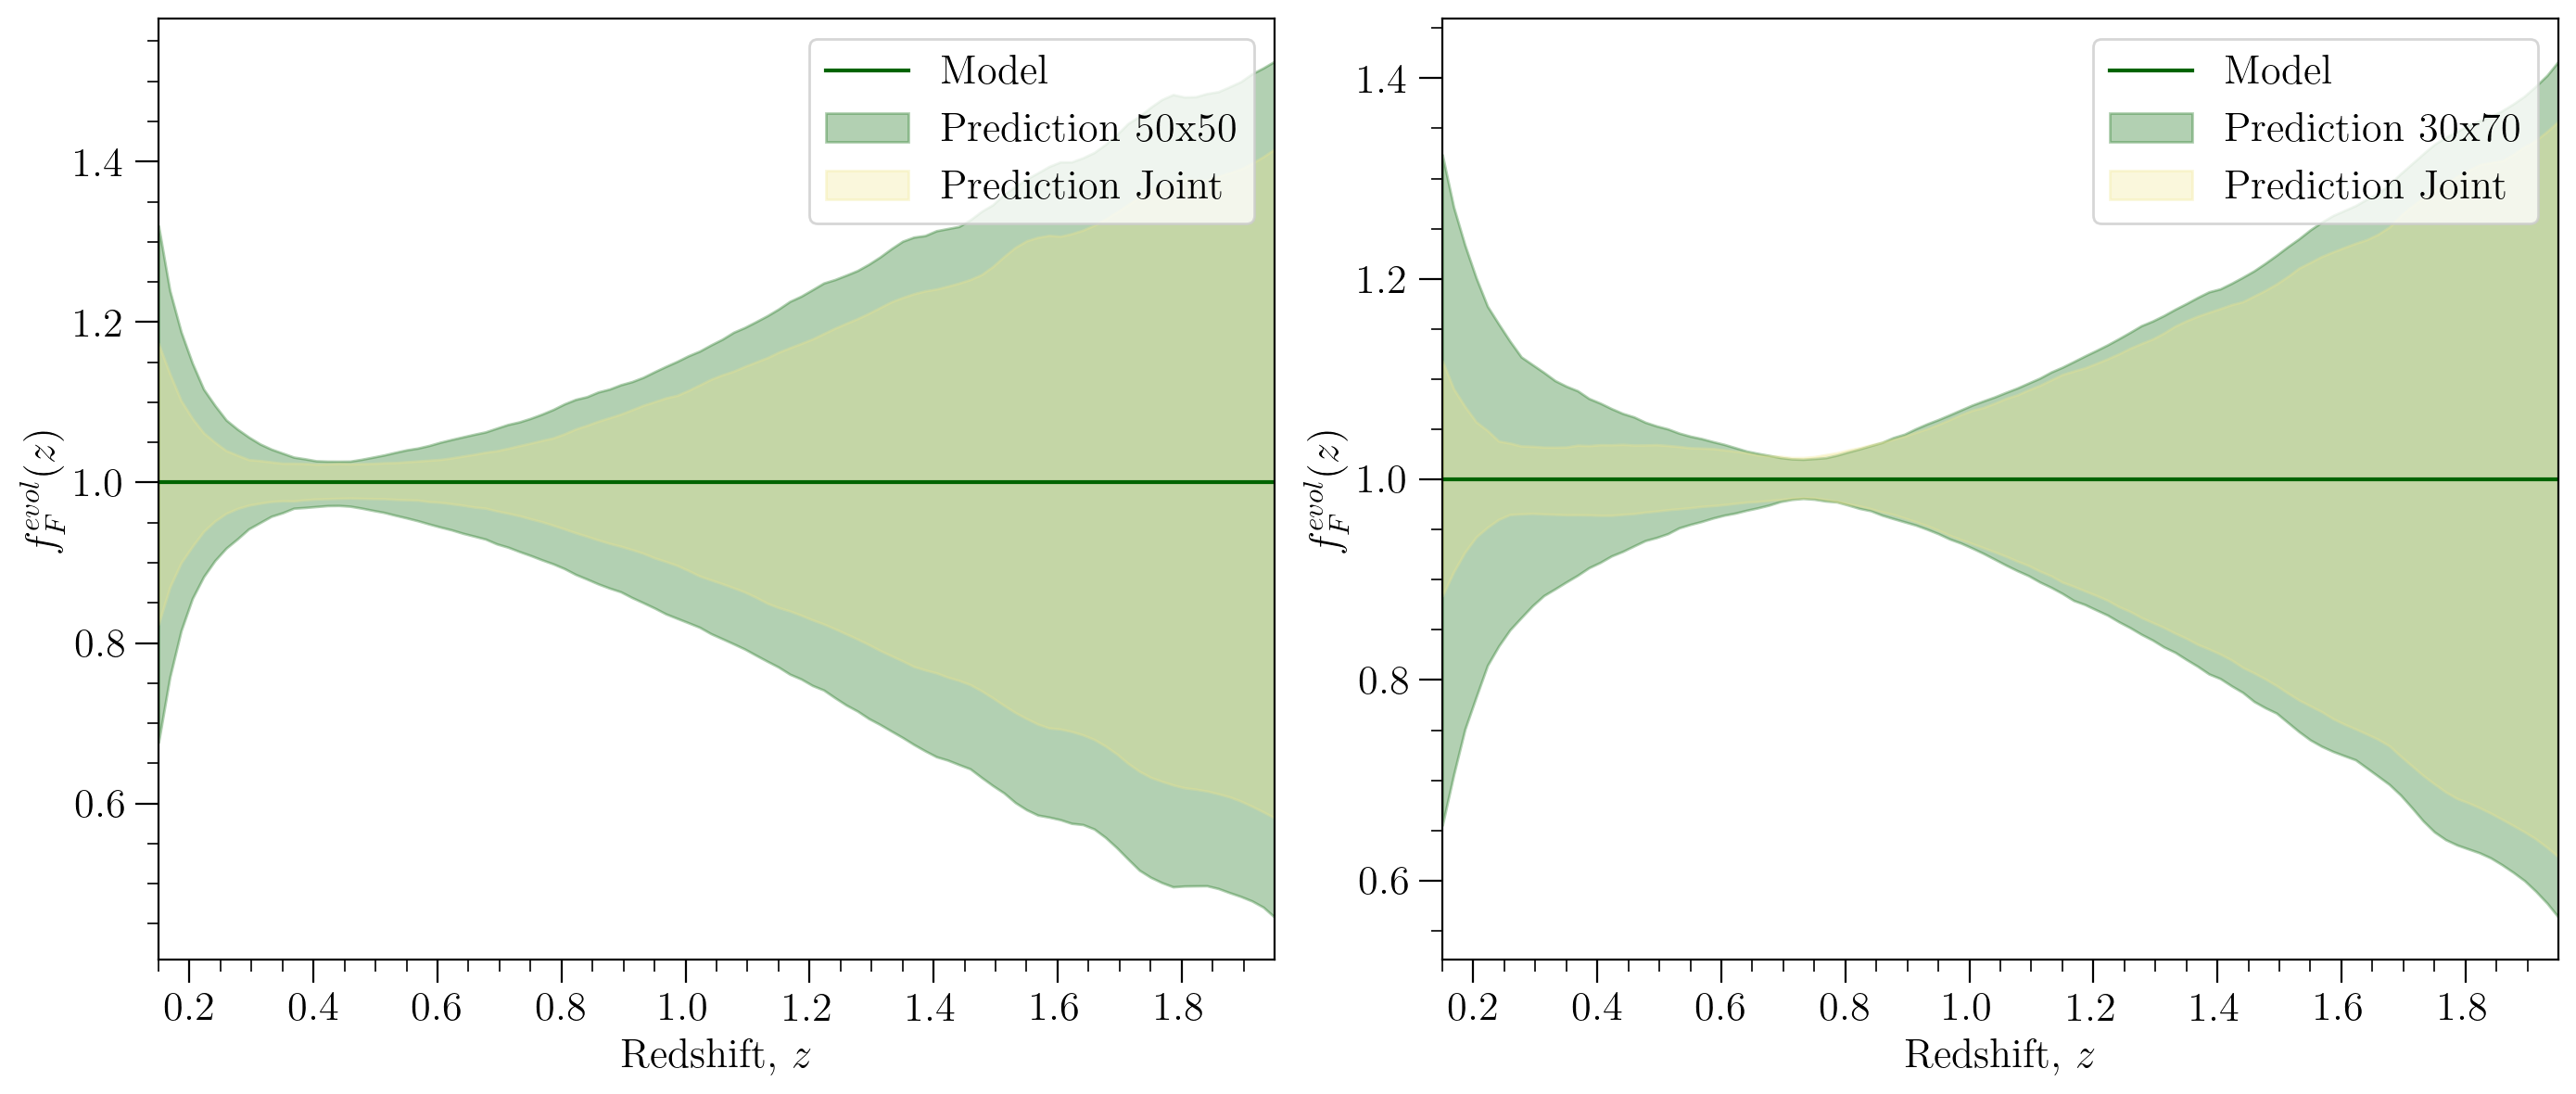

In [229]:
fig, ax = plt.subplots(nrows=1, ncols=2, figsize=(14,6), tight_layout=True)

ax[0].plot(z_lin, fevol_50_F_fid/fevol_50_F_fid, '-', color='darkgreen', lw = 1.5, label = 'Model')
#ax[0].plot(z_bins, feF_50, '*', color='black')
ax[1].plot(z_lin, fevol_30_F_fid/fevol_30_F_fid, '-', color='darkgreen', lw = 1.5, label ='Model')
#ax[1].plot(z_bins, feF_30, '*', color='black')

shift = 10

# Shade the 68% confidence interval
#ax[0].fill_between(z_lin, fevol_F_50_lower_bound_priors, fevol_F_50_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[0].fill_between(z_lin, (fevol_F_50_lower_bound_ + shift)/(fevol_50_F_fid + shift), (fevol_F_50_upper_bound_ + shift)/(fevol_50_F_fid + shift), color='darkgreen', alpha=0.3, label = 'Prediction 50x50')
ax[0].fill_between(z_lin, (fevol_F_50_lower_bound + shift)/(fevol_50_F_fid + shift), (fevol_F_50_upper_bound + shift)/(fevol_50_F_fid+shift), color='khaki', alpha=0.3, label = 'Prediction Joint')


#ax[1].fill_between(z_lin, fevol_F_30_lower_bound_priors, fevol_F_30_upper_bound_priors, color='black', alpha=0.3, label = 'Prior')
ax[1].fill_between(z_lin, (fevol_F_30_lower_bound_ + shift)/(fevol_30_F_fid + shift), (fevol_F_30_upper_bound_ + shift)/(fevol_30_F_fid + shift), color='darkgreen', alpha=0.3, label = 'Prediction 30x70')
ax[1].fill_between(z_lin, (fevol_F_30_lower_bound + shift)/(fevol_30_F_fid + shift), (fevol_F_30_upper_bound + shift)/(fevol_30_F_fid + shift), color='khaki', alpha=0.3, label = 'Prediction Joint')


for axi in ax:
    axi.set_xlim(0.15,1.95)
    #axi.set_ylim(-20, 20)
    axi.set_xlabel(r'Redshift, $z$')
    axi.set_ylabel(r'$f^{evol}_F(z)$')
    axi.legend(loc='upper right')

## WIDTHS 

In [153]:
# Compute the PRIORS regions WIDTHS

sB_50_prior_width = sB_50_upper_bound_priors - sB_50_upper_bound_priors
sB_30_prior_width = sB_30_upper_bound_priors - sB_30_upper_bound_priors

sM_50_prior_width = sM_upper_bound_priors - sM_lower_bound_priors
nevol_prior_width = nevol_upper_bound_priors - nevol_lower_bound_priors

fevol_B_50_prior_width = fevol_B_50_upper_bound_priors - fevol_B_50_lower_bound_priors
fevol_B_30_prior_width = fevol_B_30_upper_bound_priors - fevol_B_30_lower_bound_priors

fevol_F_50_prior_width = fevol_F_50_upper_bound_priors - fevol_F_50_lower_bound_priors
fevol_F_30_prior_width = fevol_F_30_upper_bound_priors - fevol_F_30_lower_bound_priors

In [154]:
fevol_F_30_prior_width

array([34.47786471, 32.44730067, 30.7047927 , 30.14752442, 29.36069361,
       28.48924768, 27.9948353 , 27.47284831, 27.0986455 , 26.59321625,
       26.19137   , 25.71803705, 25.55194218, 25.12902958, 24.87709237,
       24.88012447, 24.89198463, 24.85413497, 25.00495978, 25.18729733,
       25.13035222, 25.3052674 , 25.17309156, 25.05893163, 25.10276859,
       25.20437203, 25.30760771, 25.59846163, 25.76906945, 25.81100292,
       25.94779387, 26.14017959, 26.28562981, 26.65512577, 26.86067001,
       27.00898728, 27.16782314, 27.42791185, 27.75667017, 27.91288477,
       28.16991784, 28.40398053, 28.69461794, 28.96563623, 29.235965  ,
       29.60153392, 29.96816005, 30.1503603 , 30.5178501 , 30.95188325,
       31.41335438, 31.67462251, 32.06678276, 32.3436356 , 32.75946875,
       33.20144824, 33.6301402 , 33.80734856, 34.03782699, 34.27464142,
       34.57987937, 34.98979204, 35.42221791, 35.77571708, 36.20019494,
       36.50946681, 36.89702769, 37.22970676, 37.58638867, 37.72